#  <FONT COLOR="Red">Partie 1: Introduction  </font>

In [ ]:
# Installer les packages nécessaires
install.packages(c("ggplot2", "tidyverse", "gridExtra", "GGally", "plotly", "corrplot",
                   "reshape2", "FactoMineR", "factoextra", "glmnet", "ggfortify",
                   "pROC", "ROCR", "caret"))

In [ ]:
# Chargement des librairies nécessaires
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)

## Prise en charge des données

In [5]:
# Lecture des données
path <- "http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
ozone <- read.table(paste(path, "depSeuil.dat", sep = ""),
                    sep = ",", header = TRUE)
# Premières lignes du jeu de données
head(ozone)
# Vérification du contenu
summary(ozone)

,JOUR,O3obs,MOCAGE,TEMPE,RMH2O,NO2,NO,STATION,VentMOD,VentANG
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,1,91,93.2,21.5,0.00847,1.602,0.424,Aix,9.5000,-0.64350
2,1,100,104.6,20.2,0.00881,2.121,0.531,Aix,8.0100,-0.04996
3,0,82,103.6,17.4,0.00951,1.657,0.467,Aix,9.3771,-0.12832
4,0,94,94.8,18.8,0.00855,2.350,0.701,Aix,9.4578,-0.34516
5,0,107,99.0,23.7,0.00731,1.653,0.452,Aix,7.8791,-0.41822
6,0,150,114.3,23.6,0.01182,5.316,1.343,Aix,6.3127,0.06341


      JOUR            O3obs           MOCAGE          TEMPE      
 Min.   :0.0000   Min.   : 19.0   Min.   : 46.4   Min.   :10.40  
 1st Qu.:0.0000   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20  
 Median :0.0000   Median :109.0   Median :125.6   Median :23.80  
 Mean   :0.3045   Mean   :115.4   Mean   :127.2   Mean   :23.88  
 3rd Qu.:1.0000   3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60  
 Max.   :1.0000   Max.   :319.0   Max.   :284.7   Max.   :38.00  
     RMH2O              NO2               NO           STATION         
 Min.   :0.00285   Min.   : 0.258   Min.   :0.0010   Length:1041       
 1st Qu.:0.00763   1st Qu.: 1.248   1st Qu.:0.2360   Class :character  
 Median :0.00985   Median : 2.109   Median :0.3880   Mode  :character  
 Mean   :0.01025   Mean   : 3.505   Mean   :0.6574                     
 3rd Qu.:0.01244   3rd Qu.: 4.062   3rd Qu.:0.7440                     
 Max.   :0.02753   Max.   :44.396   Max.   :9.4290                     
    VentMOD           VentANG     

In [6]:
# Changement du type des variables qualitatives en facteur
ozone[, "JOUR"] <- as.factor(ozone[, "JOUR"])
ozone[, "STATION"] <- as.factor(ozone[, "STATION"])

In [7]:
# Vérification dans le summary
summary(ozone)

 JOUR        O3obs           MOCAGE          TEMPE           RMH2O        
 0:724   Min.   : 19.0   Min.   : 46.4   Min.   :10.40   Min.   :0.00285  
 1:317   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20   1st Qu.:0.00763  
         Median :109.0   Median :125.6   Median :23.80   Median :0.00985  
         Mean   :115.4   Mean   :127.2   Mean   :23.88   Mean   :0.01025  
         3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60   3rd Qu.:0.01244  
         Max.   :319.0   Max.   :284.7   Max.   :38.00   Max.   :0.02753  
      NO2               NO         STATION      VentMOD       
 Min.   : 0.258   Min.   :0.0010   Aix:199   Min.   : 0.1414  
 1st Qu.: 1.248   1st Qu.:0.2360   Als:222   1st Qu.: 3.9623  
 Median : 2.109   Median :0.3880   Cad:202   Median : 5.5973  
 Mean   : 3.505   Mean   :0.6574   Pla:208   Mean   : 5.9072  
 3rd Qu.: 4.062   3rd Qu.:0.7440   Ram:210   3rd Qu.: 7.1063  
 Max.   :44.396   Max.   :9.4290             Max.   :19.8910  
    VentANG       
 Min.   :-1.570

## Exploration élémentaire

### Statistiques unidimensionnelles

**Question** Précisez la nature des différentes variables. 
Il est nécessaire d'en étudier la distribution.Notez la symétrie ou non de celles-ci.

**Réponse**
La distribution des variables est une étape cruciale pour comprendre la nature des données, Une distribution symétrique serait représentée par une moyenne et une médiane très proches. Des distributions asymétriques peuvent avoir une moyenne déplacée par rapport à la médiane.

O3obs :
Nature : Variable numérique continue.La distribution semble être étalée, avec une moyenne de 115.4. La médiane (50e percentile) est plus basse que la moyenne, ce qui peut indiquer une légère asymétrie.

MOCAGE :
Nature : Variable numérique continue.La distribution semble être étalée, avec une moyenne de 127.2. La médiane est plus basse que la moyenne, indiquant une possible asymétrie positive.


TEMPE :
Nature : Variable numérique continue,La distribution semble normale, avec une moyenne proche de la médiane.


RMH2O :
Nature : Variable numérique continue,La distribution semble être relativement étalée symétrique, avec une moyenne de 0.01025.


NO :
Nature : Variable numérique continue,La variable semblent avoir une distribution asymétrique positive unimodale.

NO2: 
Nature: Varaible numérique continue,dont la distribution est asymétrique légérement positive unimodale

VentMOD et VentANG :
Nature : Variable numérique continue,Les deux variables semblent avoir des distributions asymétriques, VentANG a une distribution unimodale. La distribution est légèrement asymétrique négative, ce qui signifie que les valeurs faibles sont légèrement plus fréquentes que les valeurs élevées.VentMOD légèrement asymétrique positive, ce qui signifie que les valeurs élevées sont légèrement plus fréquentes que les valeurs faible






`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


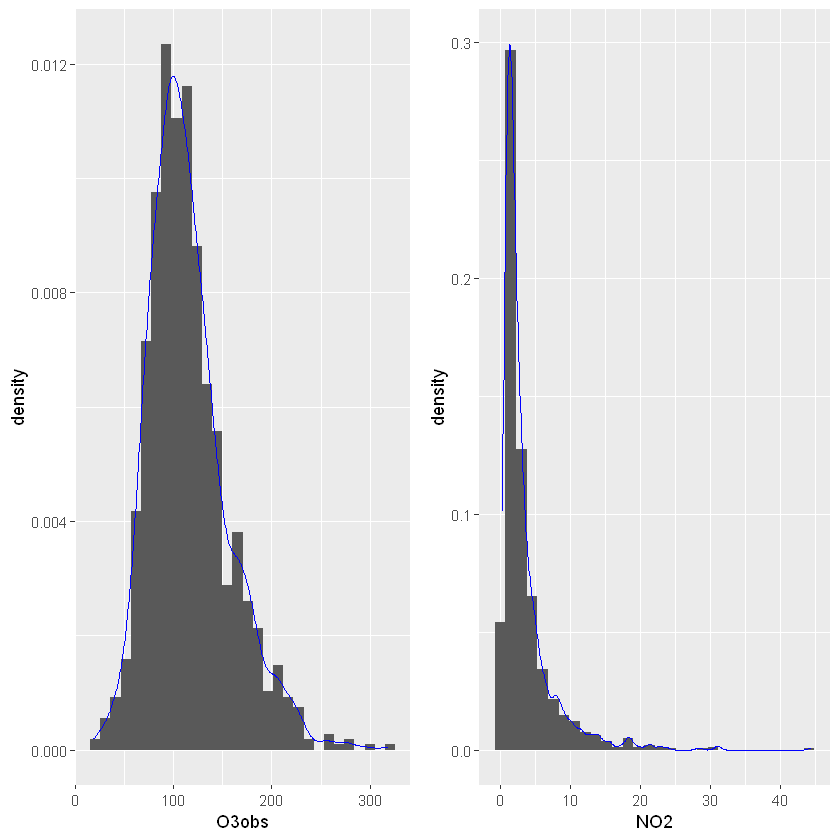

In [8]:
library(ggplot2)
library(gridExtra)
g1<-ggplot(ozone,aes(x=O3obs))+
  geom_histogram(aes(y=after_stat(density)))+
  geom_density(alpha=.2, col="blue") 
g2<-ggplot(ozone,aes(x=NO2))+
  geom_histogram(aes(y=..density..))+
  geom_density(alpha=.2, col="blue") 

grid.arrange(g1,g2,ncol=2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


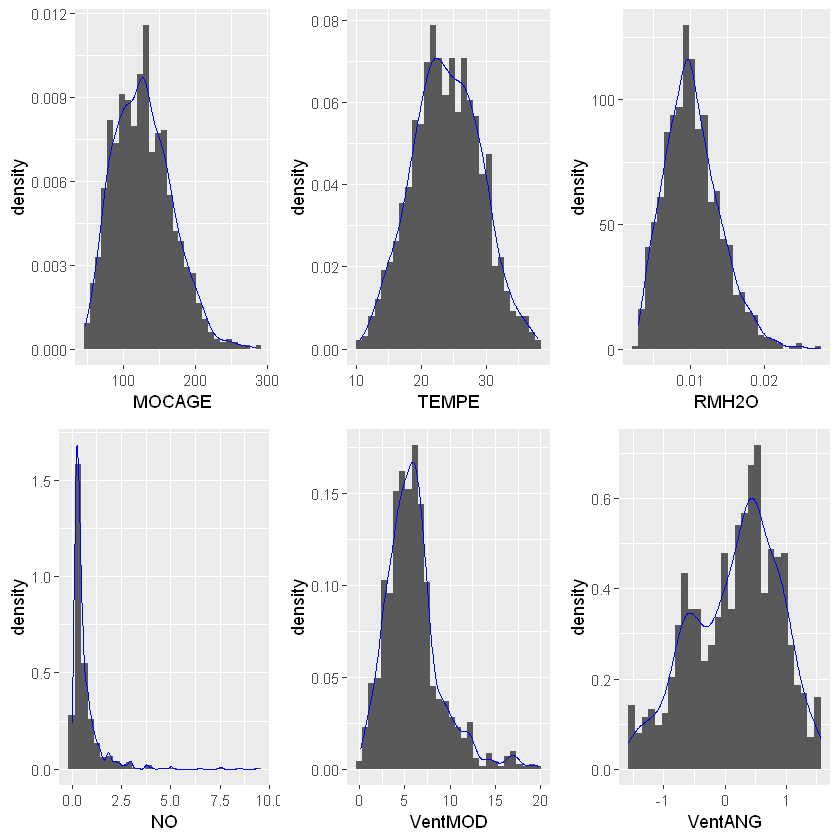

In [9]:
# Même chose pour les autres variables
g3<-ggplot(ozone,aes(x=MOCAGE))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(ozone,aes(x=TEMPE))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(ozone,aes(x=RMH2O))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(ozone,aes(x=NO))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(ozone,aes(x=VentMOD))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(ozone,aes(x=VentANG))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 

grid.arrange(g3,g4,g5,g6,g7,g8,ncol=3)
rm(g1,g2,g3,g4,g5,g6,g7,g8)

In [10]:
### Transformations de variables

Des transformations sont proposées pour rendre certaines distributions plus symétriques et ainsi plus "gaussiennes". C'est nécessaire pour certaines méthodes à venir de modélisation (linéaires), pas pour toutes (arbres).

In [11]:
ozone[, "SRMH2O"] <- sqrt(ozone[, "RMH2O"])
ozone[, "LNO2"] <- log(ozone[, "NO2"])
ozone[, "LNO"] <- log(ozone[, "NO"])

**Question** Vérifiez l'opportunité de ces transformations puis retirez les variables initiales

**Réponse**

On trace des histogrammes pour visualiser la distribution des données pour les variables RMH2, NO, NO2 (avant et après transformation)
effectivement on observe que désormais la distribution est plus ou moins "gaussienne".

On retire les variables initiales   ( ozone <- ozone[, c(1:4, 8:13)])


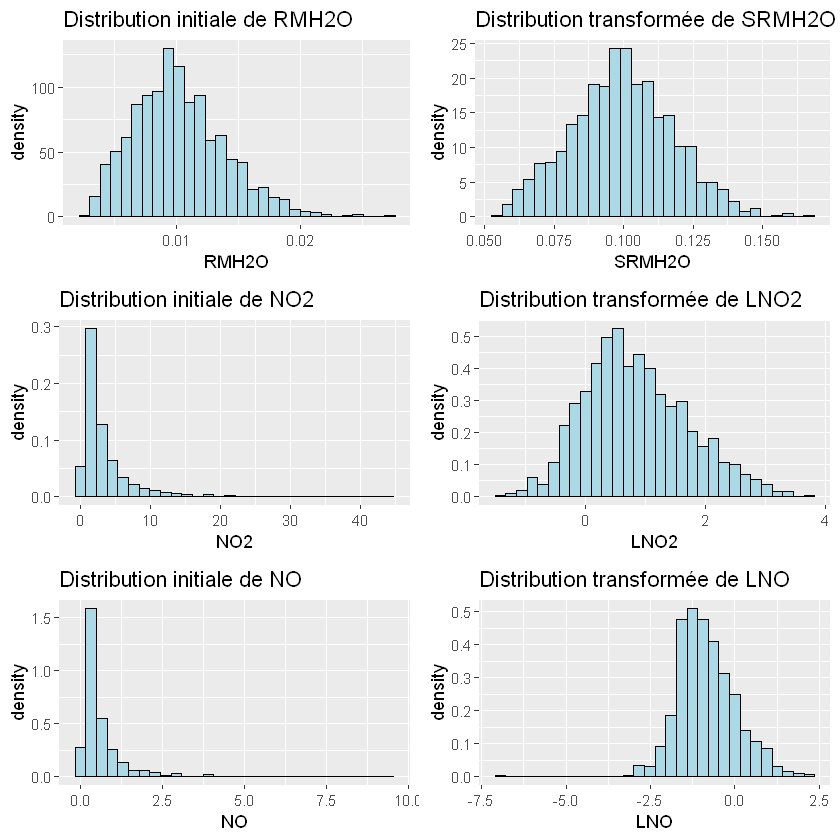

In [12]:
library(gridExtra)

# Histogrammes avant et après transformation pour RMH2O
hist1 <- ggplot(ozone, aes(x = RMH2O)) +
  geom_histogram(aes(y = after_stat(density)), fill = "lightblue", color = "black", bins = 30) +
  ggtitle("Distribution initiale de RMH2O")

hist2 <- ggplot(ozone, aes(x = SRMH2O)) +
  geom_histogram(aes(y = after_stat(density)), fill = "lightblue", color = "black", bins = 30) +
  ggtitle("Distribution transformée de SRMH2O")

# Histogrammes avant et après transformation pour NO2
hist3 <- ggplot(ozone, aes(x = NO2)) +
  geom_histogram(aes(y = after_stat(density)), fill = "lightblue", color = "black", bins = 30) +
  ggtitle("Distribution initiale de NO2")

hist4 <- ggplot(ozone, aes(x = LNO2)) +
  geom_histogram(aes(y = after_stat(density)), fill = "lightblue", color = "black", bins = 30) +
  ggtitle("Distribution transformée de LNO2")

# Histogrammes avant et après transformation pour NO
hist5 <- ggplot(ozone, aes(x = NO)) +
  geom_histogram(aes(y = after_stat(density)), fill = "lightblue", color = "black", bins = 30) +
  ggtitle("Distribution initiale de NO")

hist6 <- ggplot(ozone, aes(x = LNO)) +
  geom_histogram(aes(y = after_stat(density)), fill = "lightblue", color = "black", bins = 30) +
  ggtitle("Distribution transformée de LNO")

# Affichage des histogrammes en deux colonnes et trois lignes
grid.arrange(hist1, hist2, hist3, hist4, hist5, hist6, ncol = 2, nrow = 3)



In [13]:

ozone <- ozone[, c(1:4, 8:13)]

On construit maintenant la variable de dépassement de seuil `DepSeuil` pour obtenir le fichier qui sera effectivement utilisé.

In [14]:
ozone[, "DepSeuil"] <- as.factor(ozone[, "O3obs"] > 150)
summary(ozone)

 JOUR        O3obs           MOCAGE          TEMPE       STATION  
 0:724   Min.   : 19.0   Min.   : 46.4   Min.   :10.40   Aix:199  
 1:317   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20   Als:222  
         Median :109.0   Median :125.6   Median :23.80   Cad:202  
         Mean   :115.4   Mean   :127.2   Mean   :23.88   Pla:208  
         3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60   Ram:210  
         Max.   :319.0   Max.   :284.7   Max.   :38.00            
    VentMOD           VentANG            SRMH2O             LNO2        
 Min.   : 0.1414   Min.   :-1.5708   Min.   :0.05339   Min.   :-1.3548  
 1st Qu.: 3.9623   1st Qu.:-0.3948   1st Qu.:0.08735   1st Qu.: 0.2215  
 Median : 5.5973   Median : 0.2783   Median :0.09925   Median : 0.7462  
 Mean   : 5.9072   Mean   : 0.1631   Mean   :0.09957   Mean   : 0.8440  
 3rd Qu.: 7.1063   3rd Qu.: 0.6926   3rd Qu.:0.11153   3rd Qu.: 1.4017  
 Max.   :19.8910   Max.   : 1.5708   Max.   :0.16592   Max.   : 3.7931  
      LNO           

### Corrélations des variables

**Question** Que dire sur les relations des variables 2 à 2 ? 

**Réponse**

O3obs - MOCAGE : correlation positive importante (Corr=0.59)

O3obs - TEMPE :correlation positive importante (Corr=0.6)

O3obs - VentMOD : pas de relation (Corr:-0.072)

O3obs - VentANG : correlation positive et faible (Corr= 0.14)

O3obs - SRMH2O: correlation positive et faible (Corr = 0.26)

O3obs - LNO2 : correlation positive et faible (Corr= 0.17)

O3obs - LNO : pas de relation (Corr= -0.026)

MOCAGE - TEMPE : correlation positive plus ou moins forte (Corr = 0.4)

MOCAGE - VentMOD :pas de relation  (Corr = 0.04)

MOCAGE - VentANG : pas de relation  (Corr = 0.07)

MOCAGE - SRMH2O :correlation  positive et faible (Corr = 0.2)

MOCAGE - LNO2 : correlation positive et faible (Corr = 0.3)

MOCAGE - LNO : pas de relation (Corr = -0.02)



TEMPE - VentMOD: pas de relation (Corr= 0.01)

TEMPE - VentANG: pas de relation (Corr = 0.05)

TEMPE - SRMH2O :correlation positive et faible (Corr = 0.2)

TEMPE - LNO2: correlation positive très faible (Corr =0.1)

TEMPE - LNO: pas de relation (Corr=-0.05)

VentMOD - ventANG: correlation négative plus ou moins faible (Corr = -0.3)

VentMOD - SMRH2:correlation négative faible (Corr = -0.26)

VentMOD - LNO2: pas de relation (Corr = -0.15)

VentMOD - LNO: pas relation (Corr = -0.09)

VentANG - SRMH2O: correlation positive faible (Corr = 0.2)

VentANG - LNO2 :correlation positive très faible (Corr = 0.1)

VentANG - LNO: pas de relation (Corr= 0.09)

SRMH2O - LNO2: pas de relation (Corr = 0.02)

SRMH2O - LNO: pas de relation (Corr = 0.07)

LNO2 - LNO: correlation positive forte (Corr = 0.9)

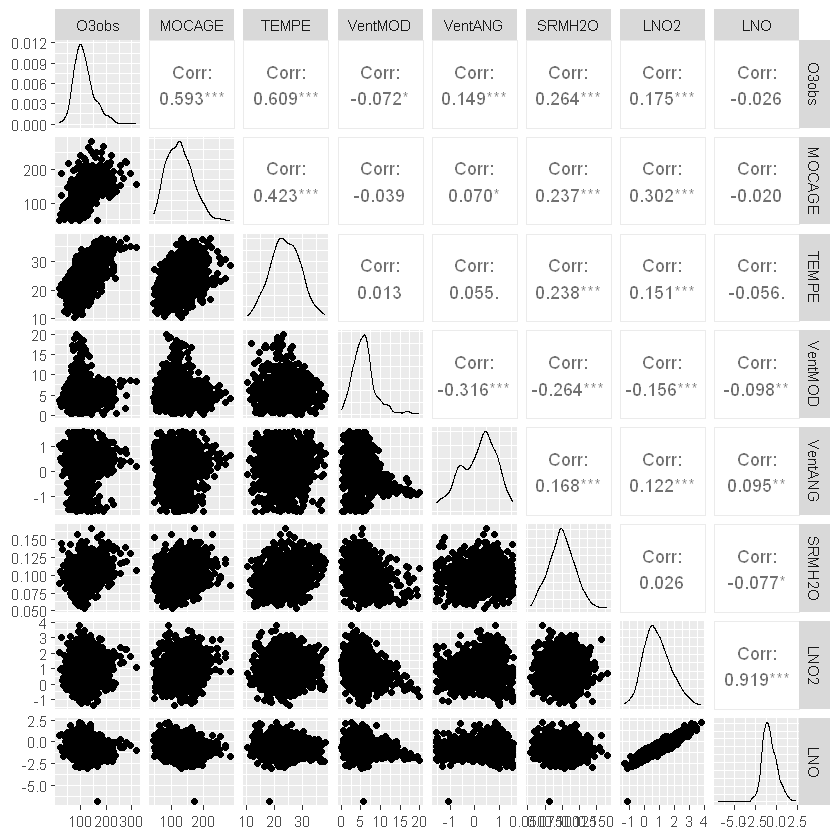

In [15]:
ggpairs(ozone[, c(2:4, 6:10)])

**Question** Complétez en visualisant les corrélations avec la fonction `corrplot()` (package `corrplot`). Quelle est la limite de ce type de diagnostic numérique : quel type de corrélation est mesuré ? 

**Réponse**

La représentation graphique produite par corrplot() avec la méthode "ellipse" affiche des ellipses pour chaque paire de variables, et la couleur et la taille de l'ellipse indiquent la force et la direction de la corrélation. Cependant, cela reste une visualisation basée sur la corrélation linéaire.

Si les relations entre nos variables sont non linéaires, cette méthode pourrait ne pas capturer pleinement la complexité des relations. Dans de tels cas, d'autres méthodes ou visualisations spécifiques aux relations non linéaires pourraient être nécessaires.
La limite de ce type de diagnostic numérique, la corrélation mesurée est la corrélation linéaire de Pearson. Cela mesure la force et la direction de la relation linéaire entre deux variables. La corrélation de Pearson est sensible uniquement aux relations linéaires et ne capture pas les relations non linéaires.



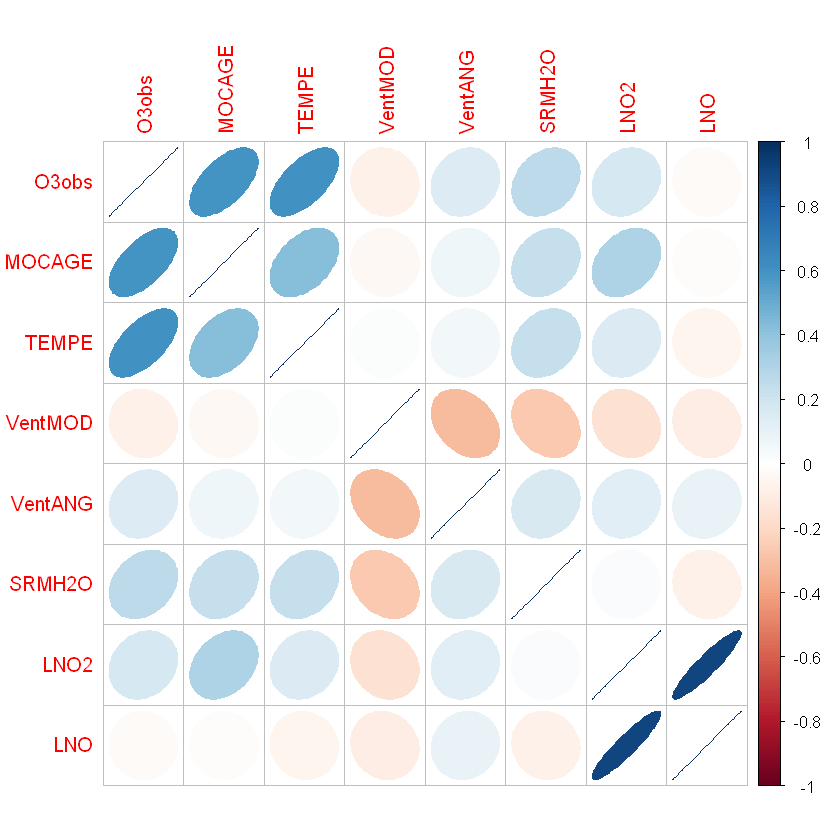

In [16]:

library(corrplot)
corrplot(cor(ozone[, c(2:4, 6:10)]),method="ellipse")

### Analyse en composantes principales

Les commandes suivantes permettent de réaliser une [analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf) (ACP) sur les seules variables quantitatives. Par ailleurs la variable à modéliser (O3obs, concentration observée) n'est pas utilisée.

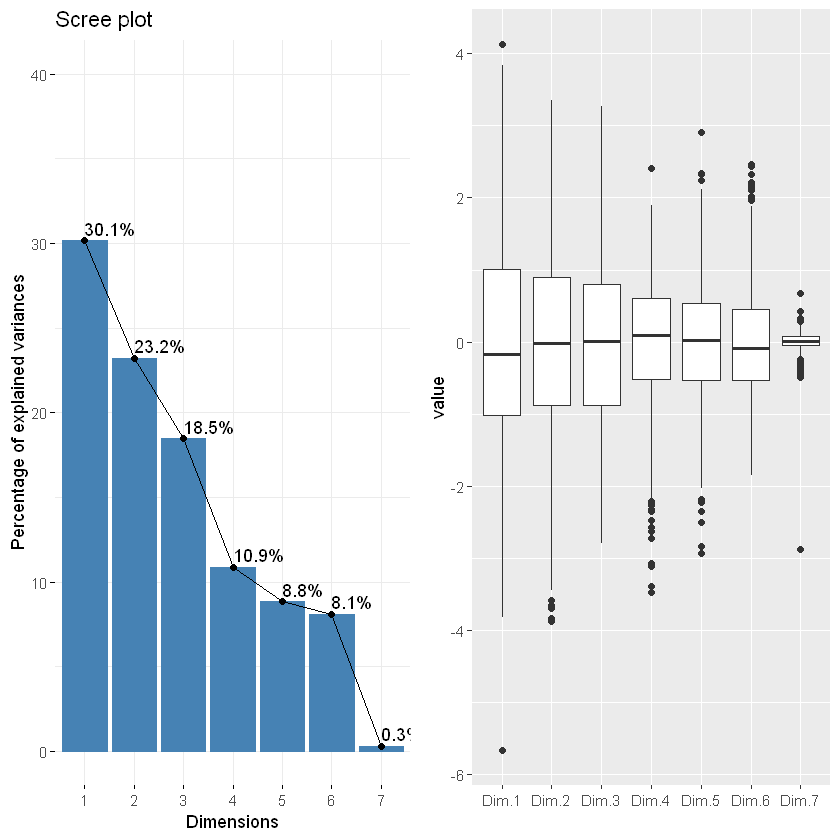

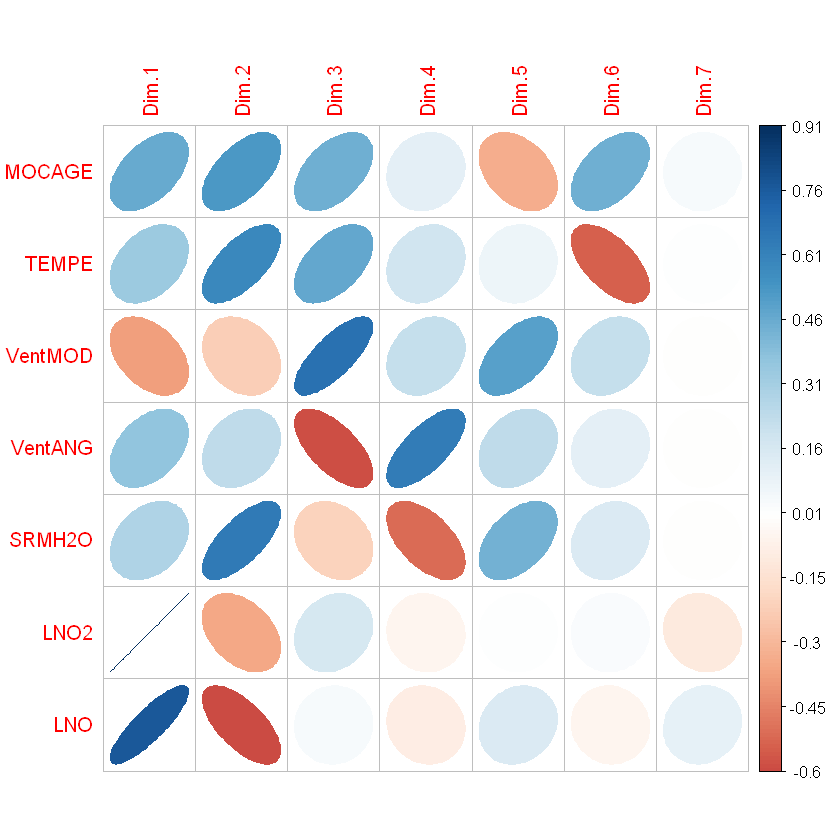

In [17]:
# ACP réduite
library(FactoMineR)
acp <- PCA(ozone[, c(11,2:4, 6:10)], scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, quanti.sup = 2, ncp = 7)
# Décroissance des valeurs propres
library(factoextra)
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)
# 
library(corrplot)
corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

In [18]:
help(PCA)

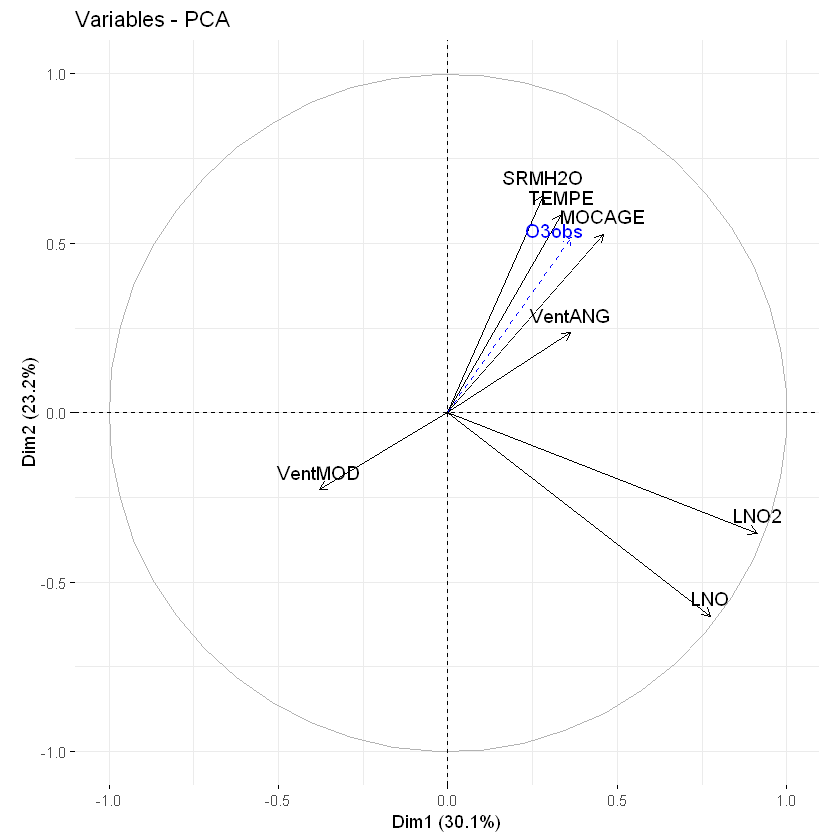

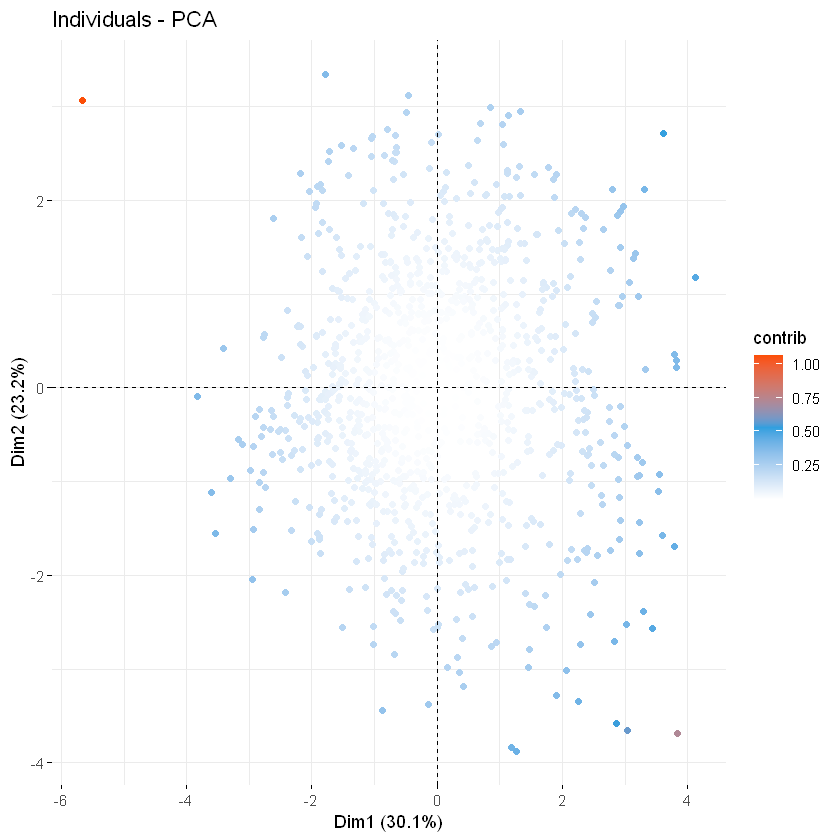

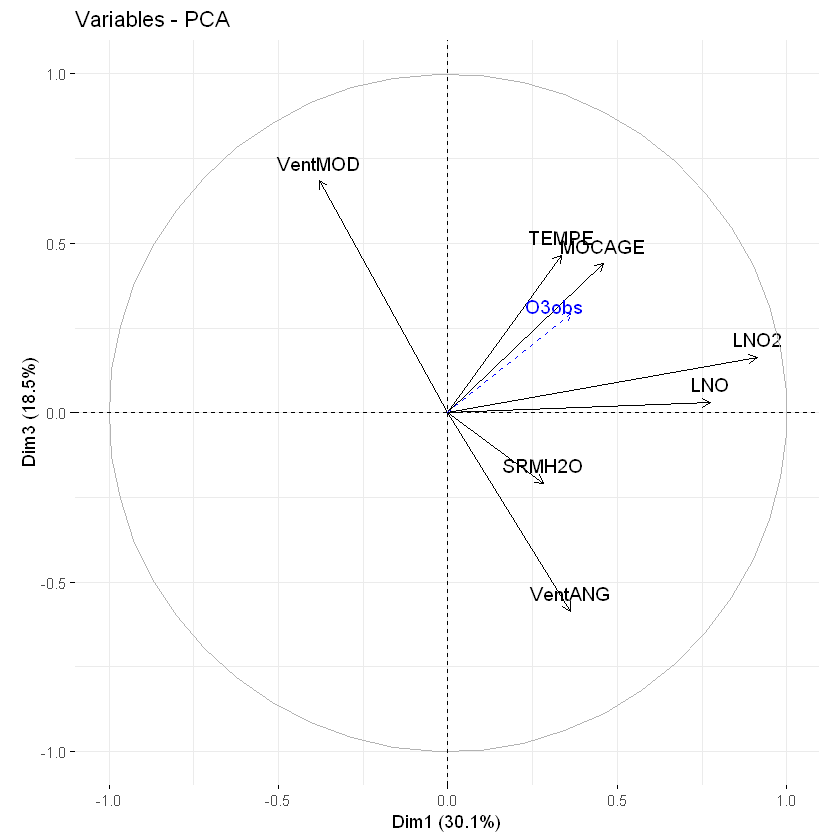

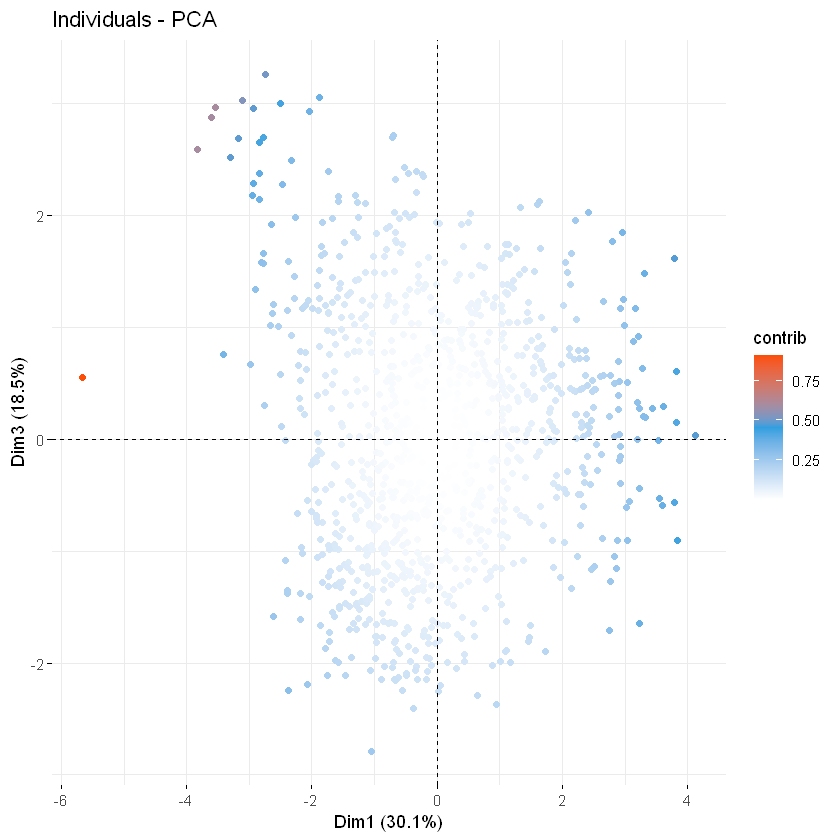

In [19]:
fviz_pca_var(acp)
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp,axes=c(1,3))
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

**Question** Que représentent ces différents graphiques?

**Réponse**

-Décroissance des Valeurs Propres:est un graphique qui montre comment la variance totale des données est répartie entre les différentes composantes principales. Plus la valeur propre est élevée, plus la composante explique une grande partie de la variance.Le point d'inflexion dans la décroissance des valeurs propres peut suggérer le nombre de dimensions à retenir.

-Boîte à Moustaches des Coordonnées des Individus:
Ce graphique montre la distribution des coordonnées des individus sur les 7 dimensions.
Chaque boîte représente une composante principale, montrant la dispersion de ces individus le long des composantes principales.
Les boîtes peuvent mettre en évidence des tendances, des regroupements, ou des valeurs aberrantes dans les données.

-Matrice de Corrélation des Variables:
Il s'agit d'un graphique de corrélation qui montre la force et la direction des relations linéaires entre les variables originales (avant l'ACP).
La couleur et la taille des ellipses représentent la corrélation entre les paires de variables.
Ce graphique permet de visualiser comment les variables interagissent les unes avec les autres avant la réduction de dimensionnalité

-Représentation des Variables ACP:
Il s'agit d'un graphique qui représente les variables dans l'espace des composantes principales.Il permet de voir quelles variables contribuent le plus à chaque dimension.

-Représentation des Individus ACP:
Il s'agit d'un graphique qui représente les individus dans l'espace des composantes principales.
Il permet de voir la position des individus par rapport aux composantes principales, mettant en évidence les groupements ou les tendances dans les données.


**Question** Que dire du choix du nombre de dimensions, des valeurs atypiques?

**Réponse**
- Le nombre de dimensions retenues est 2, on a représenté Variables ACP et individuals ACP avec Dim1, Dim3 ensuite  avec Dim2, Dim1.
-D'après la boxplot des valeurs atypiques sont observés(dim 4, 6 et 8 ), dailleurs ces dimensions n'ont pas été retenues comme composante principale.

**Question** Que dire de la structure de corrélation des variables ? Est-elle intuitive ?

**Réponse**
La structure de corrélation des variables est intuitive si les ellipses indiquent des relations connues ou attendues entre les variables.

Même graphe en coloriant selon le dépassement de seuil.

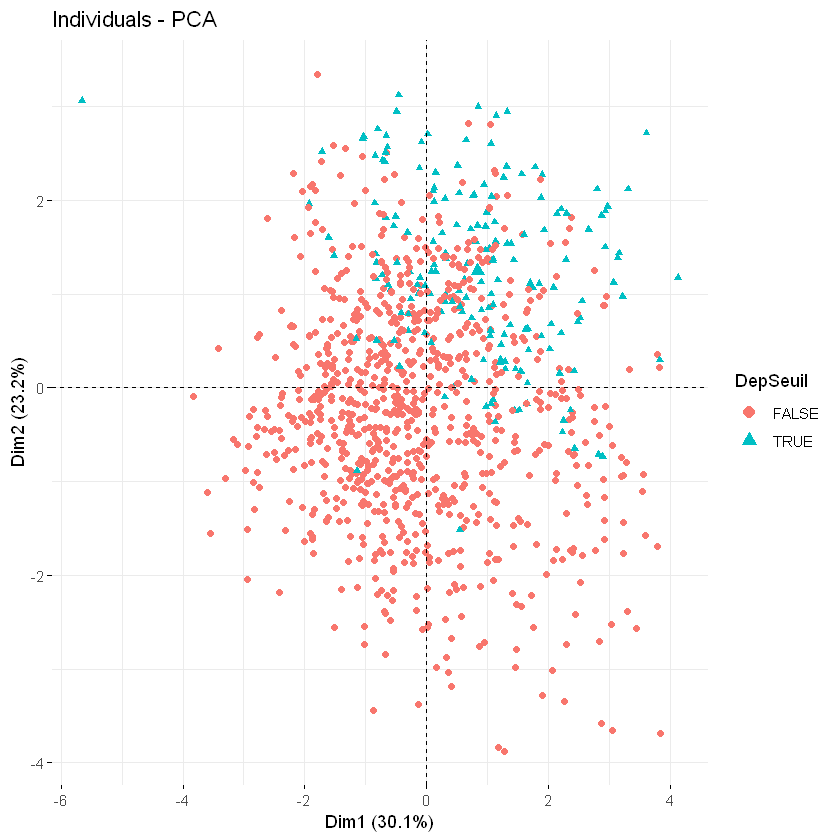

In [20]:
fviz_pca_ind(acp, label="none", habillage=1)

L'objectif est donc de définir une surface séparant les deux classes. 

**Question** Une discrimination linéaire (hyperplan) semble-t-elle possible ?

**Réponse**
L'examen visuel de ce graphique peut nous donner une première impression de la séparabilité des deux groupes d'individus. Les individus avec dépassement de seuil et sans dépassement de seuil sont regroupés de manière distincte

### Clustering

Ce n'est pas utile ici mais une classification non supervisée est facile à obtenir. Par exemple en 2 classes, par l'algorithme des K-means. Donne-t-elle la même information ?

**Réponse**

L'observation visuelle du graphique ci-dessous montre que les couleurs correspondent aux groupes observés dans l'ACP, cela suggère une certaine cohérence entre les deux approches (K-means et ACP). Cependant, cela ne garantit pas une correspondance parfaite, et des analyses plus détaillées pourraient être nécessaires.

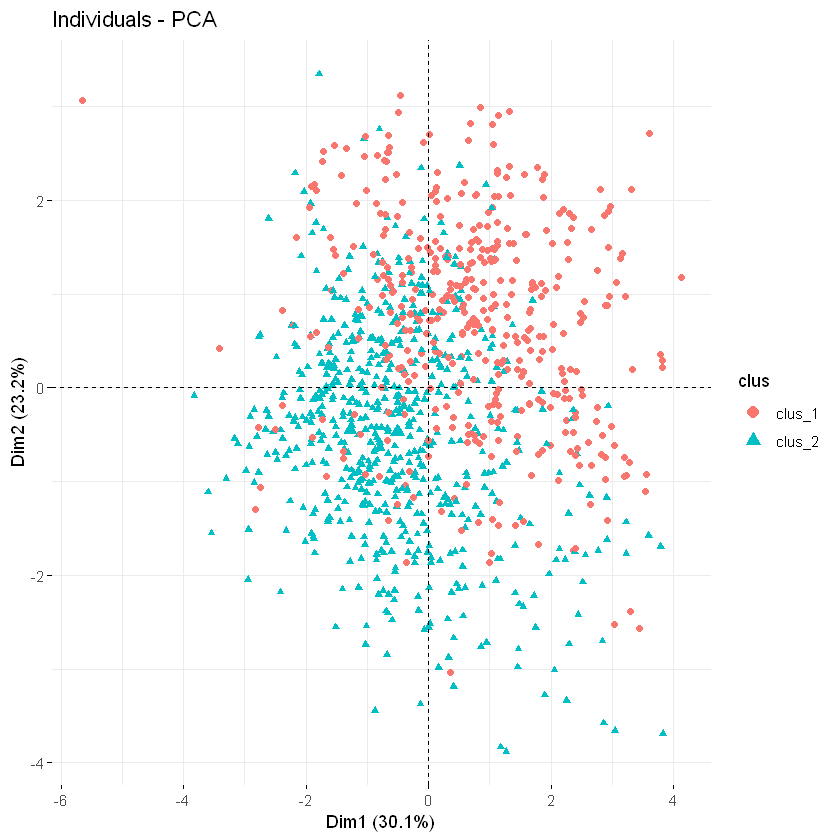

In [21]:
km.ozone <- kmeans(ozone[, c(3:4, 6:10)], centers = 2)
# Représentation dans les coordonnées de l'acp
acp2 <- PCA(cbind(clus = as.factor(km.ozone$cluster),
          ozone[, c(11, 3:4, 6:10)]), scale.unit = TRUE,
          graph = FALSE, quali.sup = 1:2, ncp = 7)
fviz_pca_ind(acp2, label="none", habillage="clus")

## Protocole de comparaison

### Stratégie

La recherche  d'une meilleure méthode de prévision suit le protocole suivant.

1. Étapes descriptives préliminaires uni- et multidimensionnelle visant à repérer les incohérences, les variables non significatives ou de distribution exotique, les individus non concernés ou atypiques... et à étudier les structures des données. Ce peut être aussi la longue étape de construction de variables, attributs ou *features* spécifiques des données. 
2. Procéder à un tirage aléatoire d'un échantillon *test* qui ne sera utilisé que lors de la *dernière étape* de comparaison des méthodes.
3. La partie restante est l'échantillon d'*apprentissage* pour l'estimation des paramètres des modèles.
4. Pour chacune des méthodes, optimiser la complexité des modèles en minimisant une estimation "sans biais" de l'erreur de prévision, par exemple par [*validation croisée*](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf):
    - Variables et interactions à prendre en compte dans la régression linéaire ou logistique;
    - variables et méthode pour l'analyse discriminante;
    - nombre de feuilles dans l'arbre de régression ou de classification;
    - architecture (nombre de neurones, pénalisation) du perceptron;
    - algorithme d'agrégation, 
    - noyau et pénalisation des SVMs.
5.  Comparaison des qualités de prévision sur la base du taux de mal classés pour le seul échantillon test qui est resté à l'écart de tout effort ou "acharnement" pour l'optimisation des modèles.



### Remarques

* En cas d'échantillon relativement "petit" il est recommandé d'itérer la procédure de découpage apprentissage / test, afin de réduire la variance (moyenne) des estimations des erreurs de prévision.

**Question** Comment appelle-t-on cette procédure spécifique de validation croisée ?

**Réponse**
La procédure spécifique de validation croisée décrite dans le protocole est appelée la validation croisée en k-fold.
Cette approche permet d'estimer la performance du modèle de manière plus robuste, car elle réduit la dépendance de la performance à une seule répartition des données en ensembles d'entraînement et de test. Elle offre également une meilleure utilisation des données, en particulier lorsque l'ensemble de données est limité.

Le terme "k" dans "k-fold" représente le nombre de plis utilisés dans la procédure, et il est généralement choisi en fonction de la taille de l'ensemble de données et des ressources disponibles. Les valeurs courantes pour k incluent 5 et 10.

* *Attention* : ne pas "tricher" en modifiant le modèle obtenu lors de l'étape précédente afin d'améliorer le résultat sur l'échantillon test!
* Le critère utilisé dépend du problème : erreur quadratique, taux de mauvais classement, entropie, AUC (aire sous la courbe ROC), indice de Pierce, *log loss function*...

### Extraction des échantillons

Les commandes ci-dessous réalisent l'extraction du sous-ensemble des données d'apprentissage et de test. 

Utilisez trois chiffres au hasard, et **remplacez** "111" ci-dessous, comme initialisation du générateur de nombres aléatoires. Attention, chaque participant tire un échantillon différent ; il est donc "normal" de ne pas obtenir les mêmes modèles, les mêmes résultats!

In [41]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(ozone) # nombre de lignes dans les données
nvar <- ncol(ozone) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 


Construction des échantillons pour la régression: prévision de la concentration en ozone.

In [23]:
# construction de l'échantillon d'apprentissage
datappr <- ozone[appri, -11] 
# construction de l'échantillon test
datestr <- ozone[testi, -11] 
# vérification
str(datappr)
str(datestr)
#summary(datappr) 

'data.frame':	832 obs. of  10 variables:
 $ JOUR   : Factor w/ 2 levels "0","1": 2 2 1 1 1 1 1 2 2 1 ...
 $ O3obs  : int  91 100 82 94 107 150 164 135 121 129 ...
 $ MOCAGE : num  93.2 104.6 103.6 94.8 99 ...
 $ TEMPE  : num  21.5 20.2 17.4 18.8 23.7 23.6 26.6 23.5 23.3 23.7 ...
 $ STATION: Factor w/ 5 levels "Aix","Als","Cad",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ VentMOD: num  9.5 8.01 9.38 9.46 7.88 ...
 $ VentANG: num  -0.643 -0.05 -0.128 -0.345 -0.418 ...
 $ SRMH2O : num  0.092 0.0939 0.0975 0.0925 0.0855 ...
 $ LNO2   : num  0.471 0.752 0.505 0.854 0.503 ...
 $ LNO    : num  -0.858 -0.633 -0.761 -0.355 -0.794 ...
'data.frame':	209 obs. of  10 variables:
 $ JOUR   : Factor w/ 2 levels "0","1": 1 1 1 2 1 1 1 2 2 2 ...
 $ O3obs  : int  135 143 71 77 79 155 101 75 114 156 ...
 $ MOCAGE : num  127.8 189.7 103.9 73 87.8 ...
 $ TEMPE  : num  18.8 21 25.9 23.5 12.3 32.2 19.4 27.6 24.9 27 ...
 $ STATION: Factor w/ 5 levels "Aix","Als","Cad",..: 3 4 1 5 5 1 2 3 4 2 ...
 $ VentMOD: num  2.1 3.14 10

Construction des échantillons pour la discrimination: prévision de dépassement.

In [24]:
# construction de l'échantillon d'apprentissage
datappq <- ozone[appri,-2]
# construction de l'échantillon test 
datestq <- ozone[testi,-2] 

# vérification
str(datappq)
str(datestq)
#summary(datappq)

'data.frame':	832 obs. of  10 variables:
 $ JOUR    : Factor w/ 2 levels "0","1": 2 2 1 1 1 1 1 2 2 1 ...
 $ MOCAGE  : num  93.2 104.6 103.6 94.8 99 ...
 $ TEMPE   : num  21.5 20.2 17.4 18.8 23.7 23.6 26.6 23.5 23.3 23.7 ...
 $ STATION : Factor w/ 5 levels "Aix","Als","Cad",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ VentMOD : num  9.5 8.01 9.38 9.46 7.88 ...
 $ VentANG : num  -0.643 -0.05 -0.128 -0.345 -0.418 ...
 $ SRMH2O  : num  0.092 0.0939 0.0975 0.0925 0.0855 ...
 $ LNO2    : num  0.471 0.752 0.505 0.854 0.503 ...
 $ LNO     : num  -0.858 -0.633 -0.761 -0.355 -0.794 ...
 $ DepSeuil: Factor w/ 2 levels "FALSE","TRUE": 1 1 1 1 1 1 2 1 1 1 ...
'data.frame':	209 obs. of  10 variables:
 $ JOUR    : Factor w/ 2 levels "0","1": 1 1 1 2 1 1 1 2 2 2 ...
 $ MOCAGE  : num  127.8 189.7 103.9 73 87.8 ...
 $ TEMPE   : num  18.8 21 25.9 23.5 12.3 32.2 19.4 27.6 24.9 27 ...
 $ STATION : Factor w/ 5 levels "Aix","Als","Cad",..: 3 4 1 5 5 1 2 3 4 2 ...
 $ VentMOD : num  2.1 3.14 10.68 4.3 4.6 ...
 $ VentANG : 

**Remarque** : Nous avons ici "manuellement" fait la construction des échantillons à des fins pédagogiques. En pratique, on peut utiliser des fonctions de R qui font ce travail, en particulier la fonction `createDataPartition` de la librairie `caret`. 

Enfin, avant de passer aux différents algorithmes, définissons une fonction traçant le graphe des résidus avec des couleurs et des échelles fixes sur les axes. 

In [42]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(0, 250)+ylim(-150, 150)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

# <FONT COLOR="Red">Partie 2: Prévision par modèle gaussien  </font>

Le premier modèle à tester est un simple modèle linéaire Gaussien mais, comme certaines variables sont qualitatives, il s'agit d'une analyse de covariance. D'autre part, on s'intéresse à savoir si des interactions sont à prendre en compte. Le modèle devient alors polynomial d'ordre 2 ou quadratique.

### Modèle linéaire

#### Sans sélection de variables

Le modèle linéaire intégre ici des variables qualitatives; c'est dans ce cas une *analyse de covariance*  estimée par la fonction `aov` mieux adaptée à ce modèle.

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


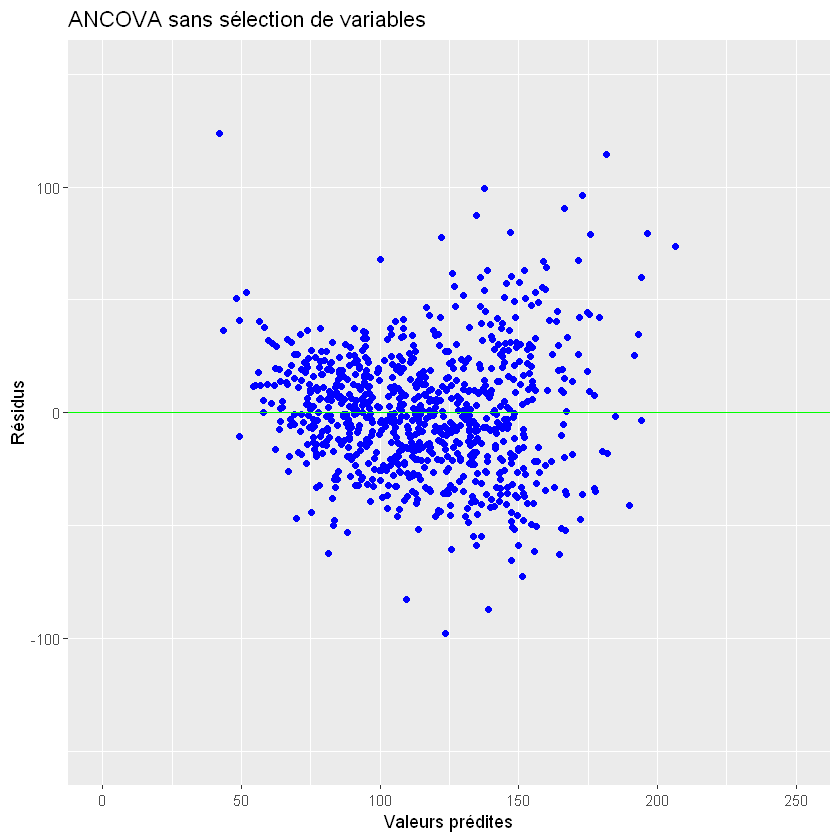

In [26]:
# estimation du modèle sans interaction
reg.lm <-aov(O3obs ~ . , data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# Graphe des résidus. 
gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")

**Question** Que dire de la distribution de ces résidus ? 

**Réponse**
Les résidus se concentrent autour d'une valeur de 0, ce qui est une caractéristique souhaitée. Cependant, il serait important de vérifier la dispersion des résidus sur l'ensemble des valeurs prédites (valeurs ajustées) pour confirmer l'homoscédasticité
Une concentration des résidus autour de zéro suggère que le modèle est capable de capturer les tendances dans les données.

**Question** La forme du nuage renseigne sur les hypothèses de linéarité du modèle et d'homoscédasticité. Que dire de la validité de ce modèle ?

**Réponse**
La forme des résidus est un indicateur important pour évaluer les hypothèses du modèle.Les résidus montrent une dispersion constante le long de l'axe des valeurs prédites, cela soutient l'homoscédasticité, une des hypothèses de la régression linéaire

Appréciez néanmoins sa significativité par la commande suivante.


In [27]:
summary(reg.lm)

             Df Sum Sq Mean Sq F value   Pr(>F)    
JOUR          1    106     106   0.134 0.714791    
MOCAGE        1 470173  470173 590.680  < 2e-16 ***
TEMPE         1 225427  225427 283.204  < 2e-16 ***
STATION       4  10163    2541   3.192 0.012926 *  
VentMOD       1  13846   13846  17.395 3.36e-05 ***
VentANG       1  10088   10088  12.673 0.000392 ***
SRMH2O        1    273     273   0.343 0.558101    
LNO2          1   3337    3337   4.193 0.040918 *  
LNO           1   9006    9006  11.314 0.000805 ***
Residuals   819 651913     796                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [28]:
coef(reg.lm)


(Intercept)       JOUR1      MOCAGE       TEMPE  STATIONAls  STATIONCad 
-16.0273451   1.2144463   0.3849814   4.3270454   2.1425958   8.8115799 
 STATIONPla  STATIONRam     VentMOD     VentANG      SRMH2O        LNO2 
 21.0287164   3.4628151  -1.3756918   4.5070677  52.5682991 -14.2991137 
        LNO 
 16.9322029

**Question** Ce premier modèle est comparé avec celui de la seule prévision déterministe MOCAGE. Qu'en conclure?

 Le modèle linéaire semble  ajuster mieux les données par rapport au modèle déterministe MOCAGE seul.

Warning message:
"Removed 6 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


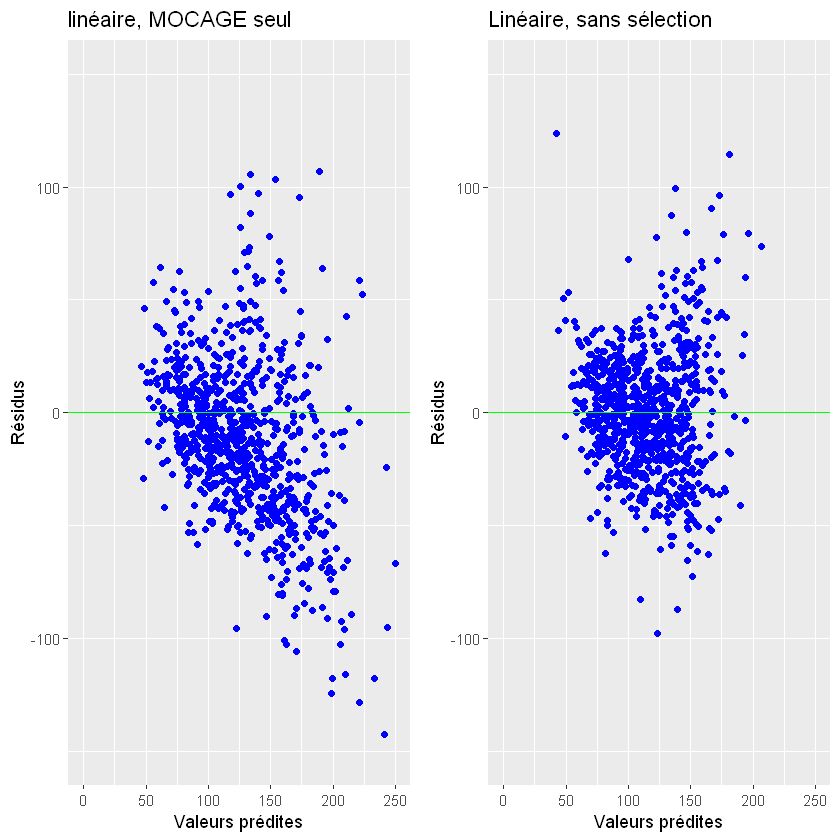

In [29]:
# Graphe des résidus du modèle déterministe MOCAGE
g1<-gplot.res(datappr[, "MOCAGE"],datappr[, "O3obs"]-datappr[, "MOCAGE"], "linéaire, MOCAGE seul")

g2<-gplot.res(fit.lm, res.lm, "Linéaire, sans sélection")
grid.arrange(g1,g2,ncol=2)

#### Sélection de variable par régularisation L1 (LASSO)

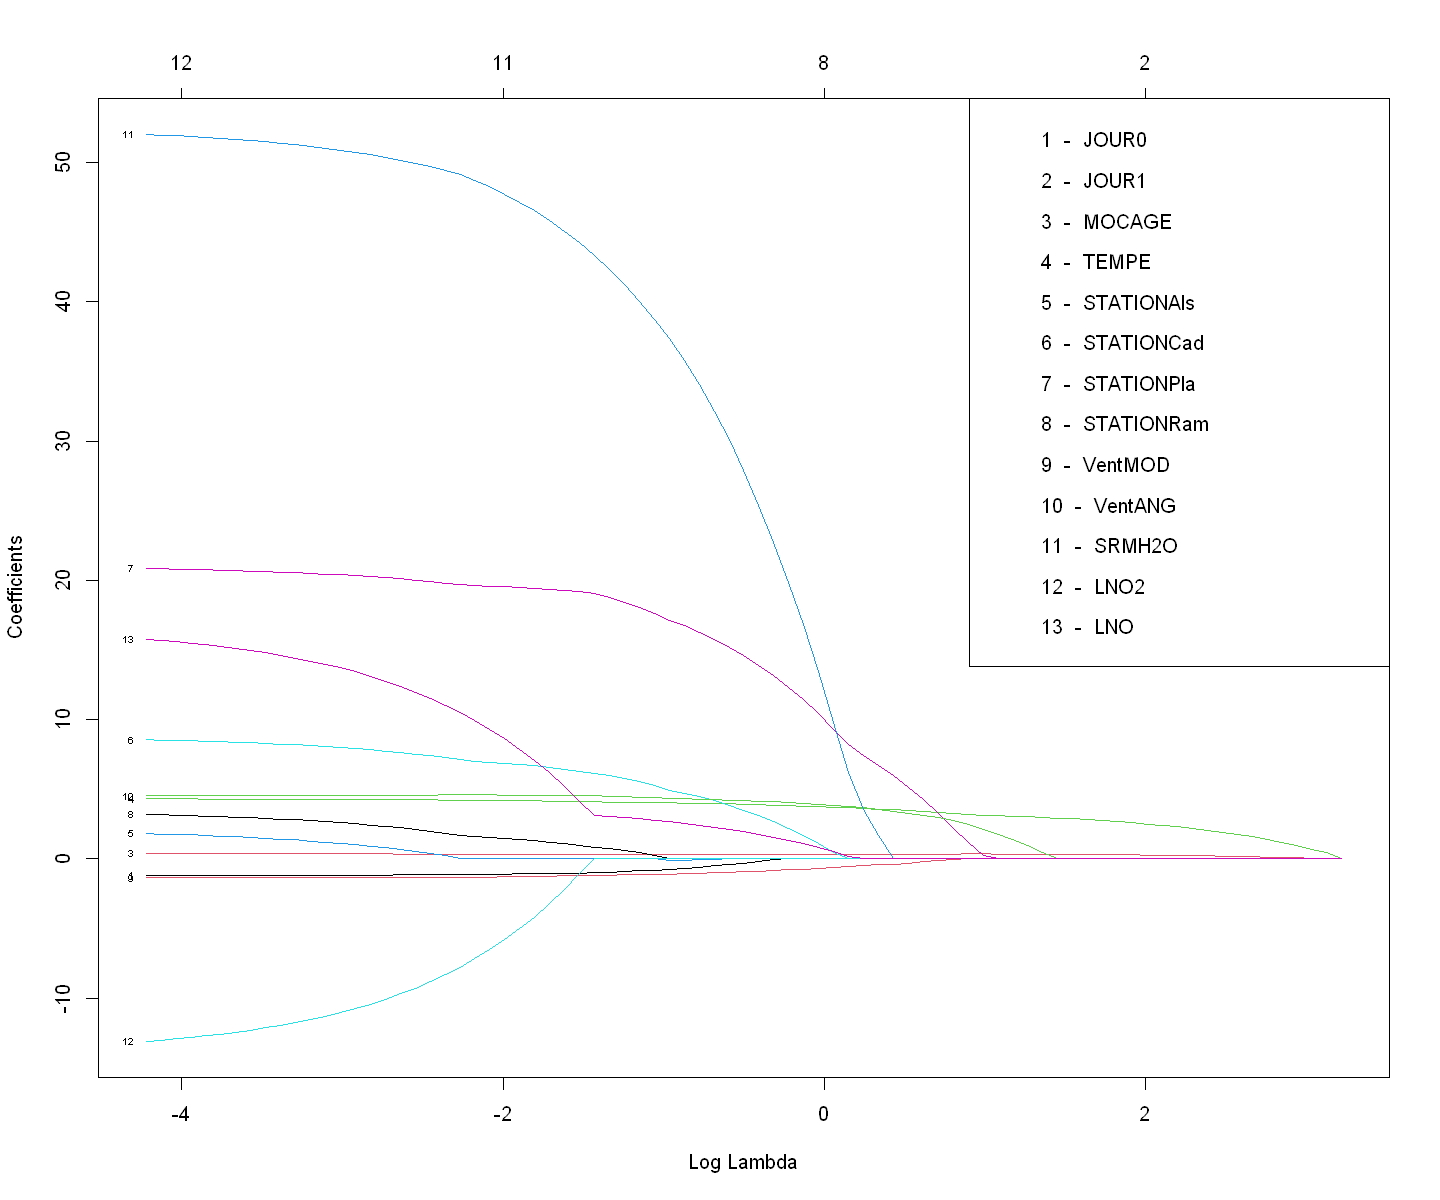

In [30]:
library(glmnet)
# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 2],
                           x = as.matrix(datappr[, -c(1, 2, 5)]))
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(O3obs ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$O3obs, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

**Question** Que fait la commande model.matrix ? Comment sont gérées les variables catégorielles ?

**Réponse**

-La fonction model.matrix dans R est utilisée pour créer une matrice de conception à partir d'une formule ou d'une spécification de modèle.

-Les variables catégorielles (facteurs) sont automatiquement transformées en variables indicatrices (dummy variables). Chaque niveau de la variable catégorielle devient une colonne binaire (0 ou 1) dans la matrice de conception.
Par défaut, la première catégorie de chaque variable catégorielle est utilisée comme référence, et les autres catégories sont représentées par les colonnes indicatrices.

In [31]:
#help(model.matrix)
head(x.mat)

,JOUR0,JOUR1,MOCAGE,TEMPE,STATIONAls,STATIONCad,STATIONPla,STATIONRam,VentMOD,VentANG,SRMH2O,LNO2,LNO
1,0,1,93.2,21.5,0,0,0,0,9.5000,-0.64350,0.09203260,0.4712528,-0.8580218
2,0,1,104.6,20.2,0,0,0,0,8.0100,-0.04996,0.09386160,0.7518877,-0.6329933
3,1,0,103.6,17.4,0,0,0,0,9.3771,-0.12832,0.09751923,0.5050087,-0.7614260
4,1,0,94.8,18.8,0,0,0,0,9.4578,-0.34516,0.09246621,0.8544153,-0.3552474
5,1,0,99.0,23.7,0,0,0,0,7.8791,-0.41822,0.08549854,0.5025918,-0.7940731
6,1,0,114.3,23.6,0,0,0,0,6.3127,0.06341,0.10871982,1.6707211,0.2949059


**Question** Que représentent les courbes ci-dessus, appelées "chemins de régularisation"?

**Réponsee**

Chaque courbe représente comment les coefficients des variables évoluent en fonction du paramètre de régularisation (λ).
Les chemins de régularisation illustrent comment les coefficients des variables changent à mesure que la pénalité varie, montrant ainsi quelles variables sont les plus importantes pour la prédiction à différents niveaux de régularisation.

On s'intéresse ensuite au choix du paramètre de régularisation par validation croisée: 

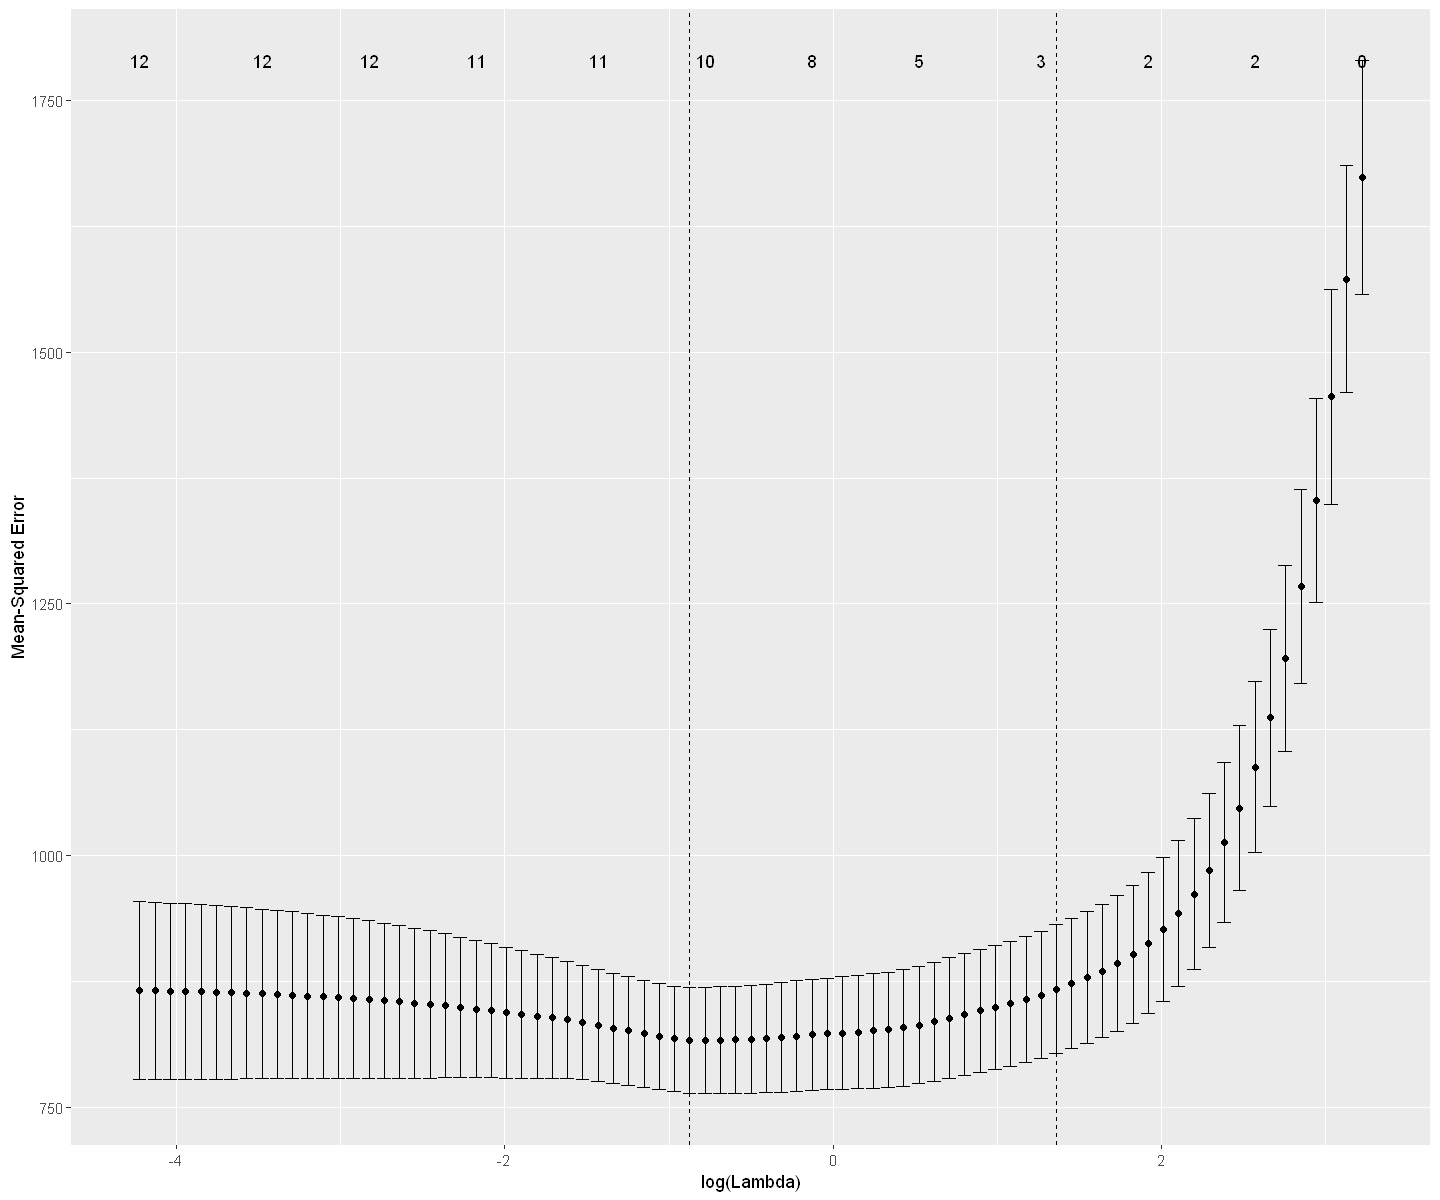

In [32]:
reg.lasso.cv <- cv.glmnet(y = datappr[, 2], x = x.mat)
#plot(reg.lasso.cv)
autoplot(reg.lasso.cv)

In [33]:
library(glmnet)
help(cv.glmnet)

**Question** Que représente les points gras ? Et la bande qui est autour ?

**Réponse**
Les points gras représentent les différentes valeurs de λ pour lesquelles la validation croisée a été réalisée. Chaque point correspond à une valeur spécifique de λ pour laquelle le modèle a été ajusté et évalué.

La bande autour de la ligne pointillée représente l'intervalle de confiance associé à la valeur optimale de λ. Elle donne une idée de la variabilité de l'erreur de validation croisée pour différentes valeurs de λ.


**Question** Comment sont obtenues les valeurs de log(lambda) correspondant aux lignes verticales en pointillé ?

**Réponse**

Concernant les valeurs de log(λ) correspondant aux lignes verticales en pointillé, ces valeurs sont calculées en prenant le logarithme des valeurs de λ réelles. Le logarithme est utilisé pour compresser l'échelle, car les valeurs de 
λ peuvent souvent varier sur plusieurs ordres de grandeur. La transformation logarithmique permet d'obtenir une représentation plus lisible et équilibrée des valeurs de λ.


In [34]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 3.896"

14 x 1 sparse Matrix of class "dgCMatrix"
                   s1
(Intercept) 1.1658431
JOUR0       .        
JOUR1       .        
MOCAGE      0.3370194
TEMPE       2.9855716
STATIONAls  .        
STATIONCad  .        
STATIONPla  .        
STATIONRam  .        
VentMOD     .        
VentANG     0.4939697
SRMH2O      .        
LNO2        .        
LNO         .        

**Question** Combien restent-ils de coefficients non nuls. Vérifiez sur les chemins de régularisation.

**Réponse**

MOCAGE,TEMPE, ventANG sont non nuls!

**Question** Même question en choisissant l'autre valeur de lambda retenue par glmnet, i.e. `reg.lasso.cv$lambda.min`

**Réponse**

11

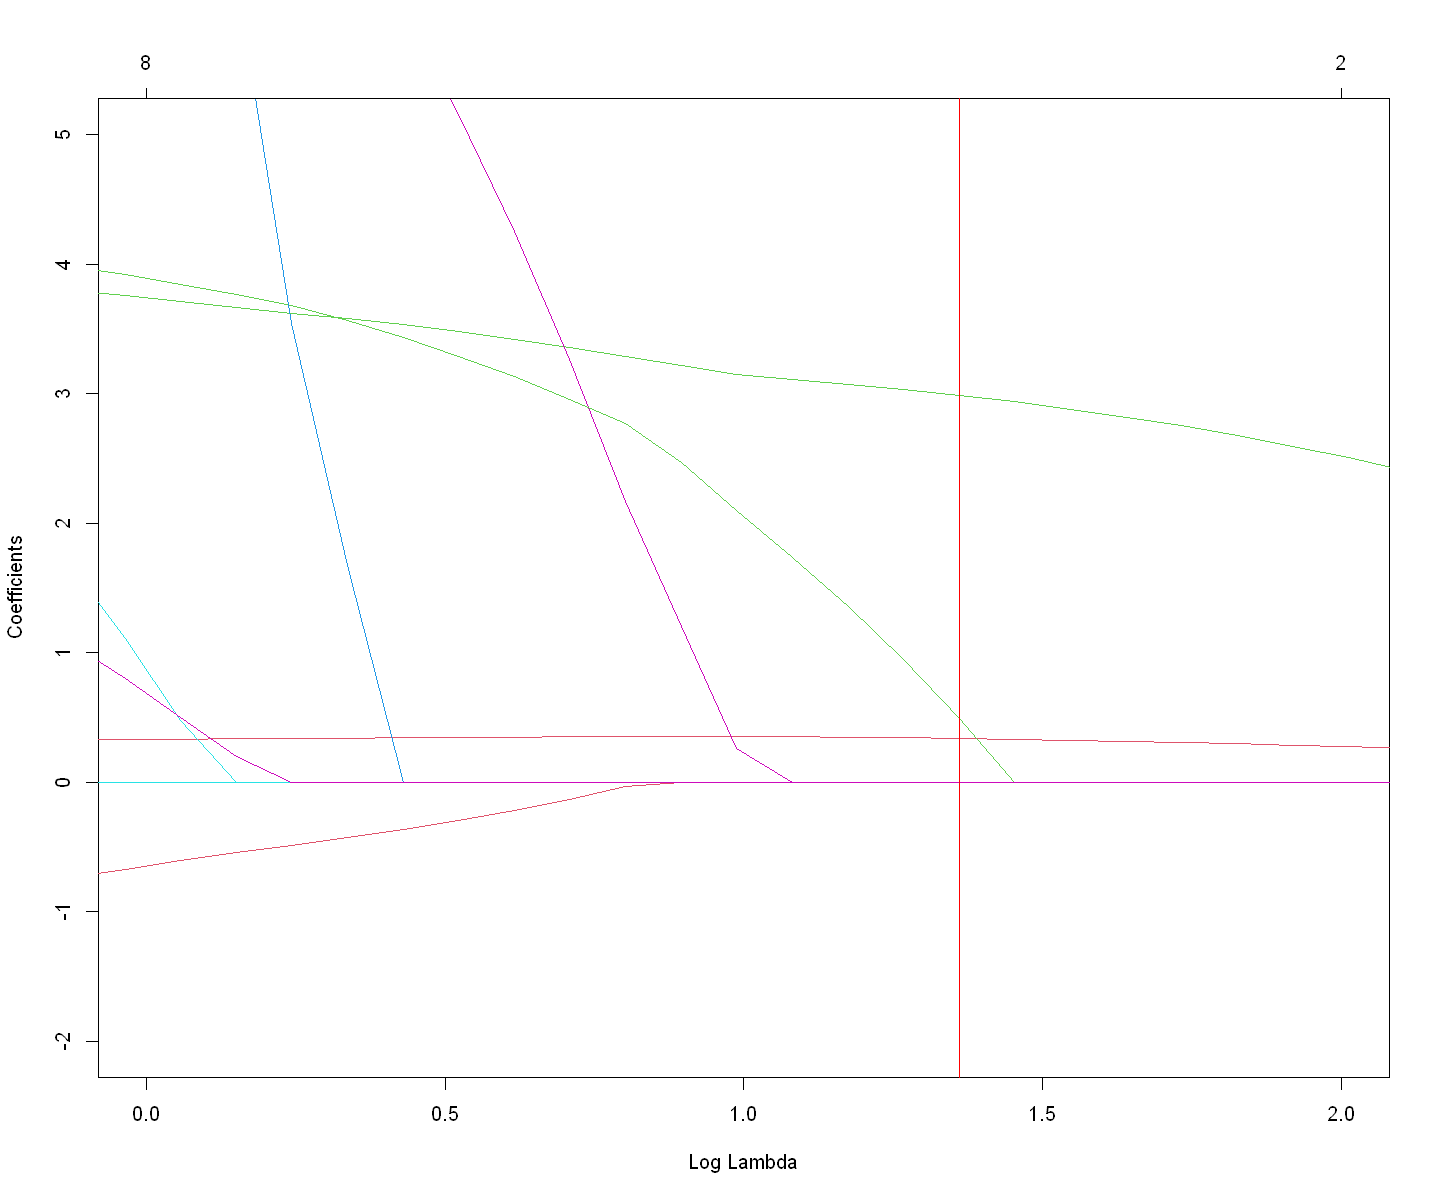

In [35]:
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(0,2),ylim=c(-2,5))
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

[1] "CV estimate of lambda : 0.418"

14 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) -18.02986736
JOUR0        -0.67101204
JOUR1         .         
MOCAGE        0.29912279
TEMPE         4.00531665
STATIONAls   -0.09333231
STATIONCad    4.71348395
STATIONPla   16.73098026
STATIONRam    .         
VentMOD      -1.06568750
VentANG       4.32796699
SRMH2O       35.78513984
LNO2          .         
LNO           2.55034443

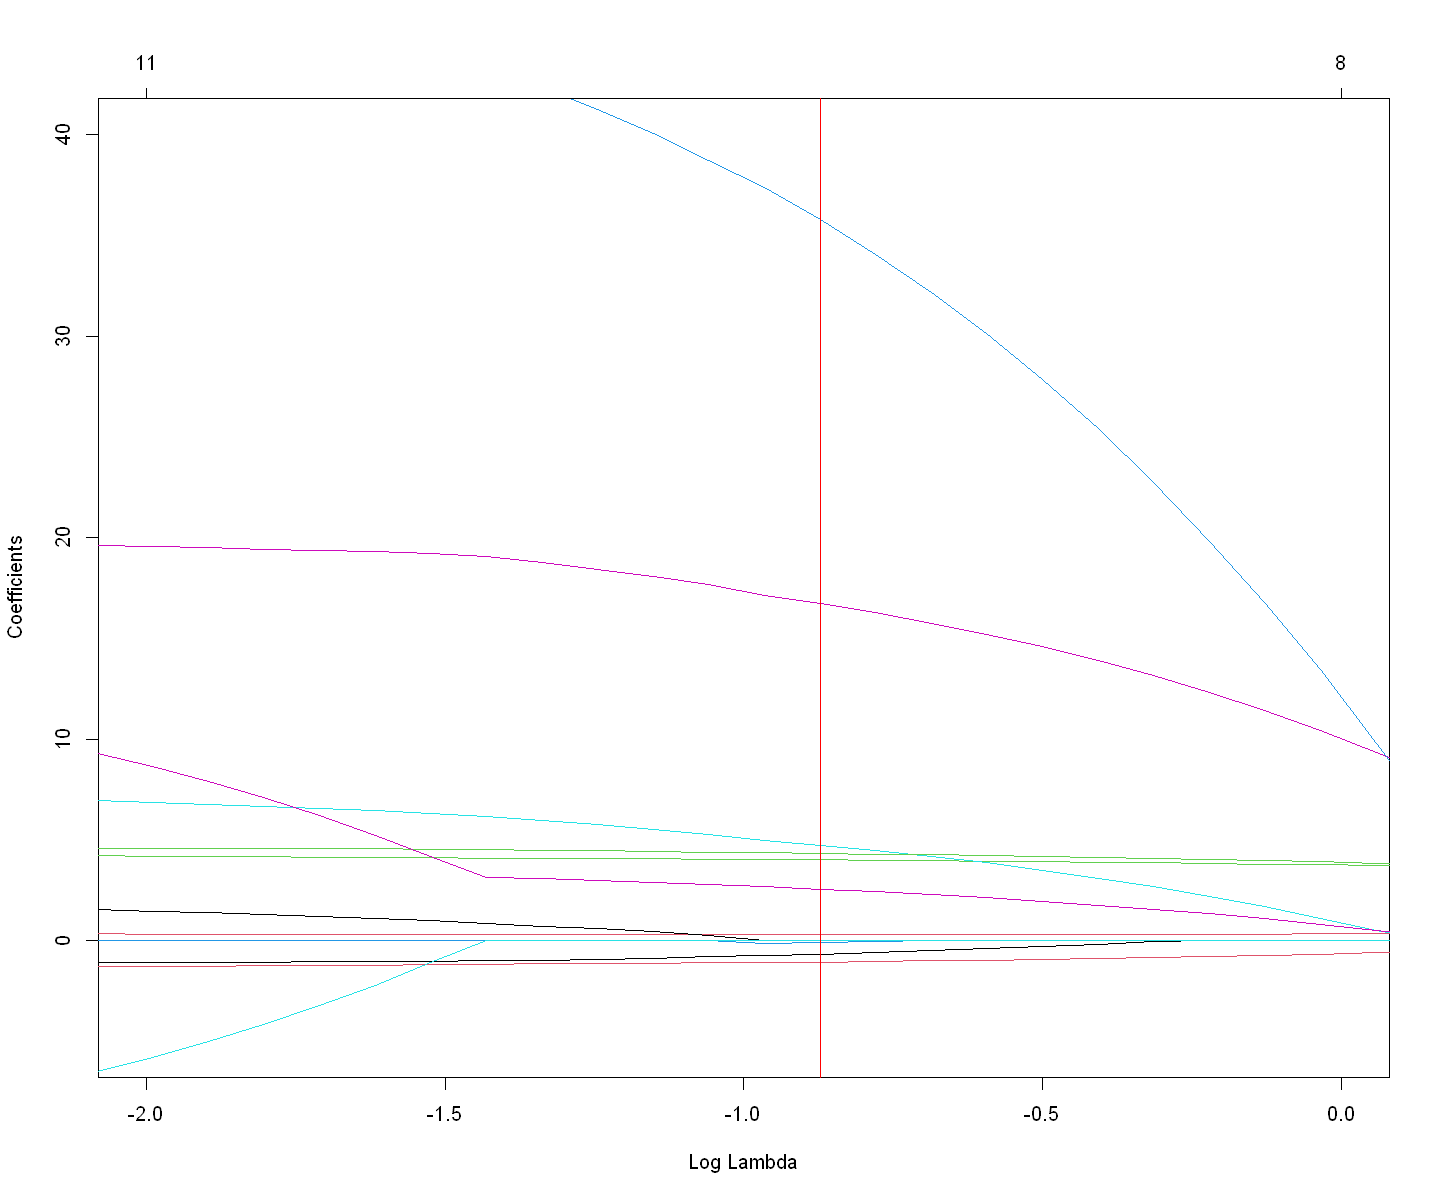

In [36]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.min")

plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-2,0),ylim=c(-5,40))
abline(v=log(reg.lasso.cv$lambda.min),col="red")

On trace ensuite les résidus en fonction des valeurs prédites. 

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


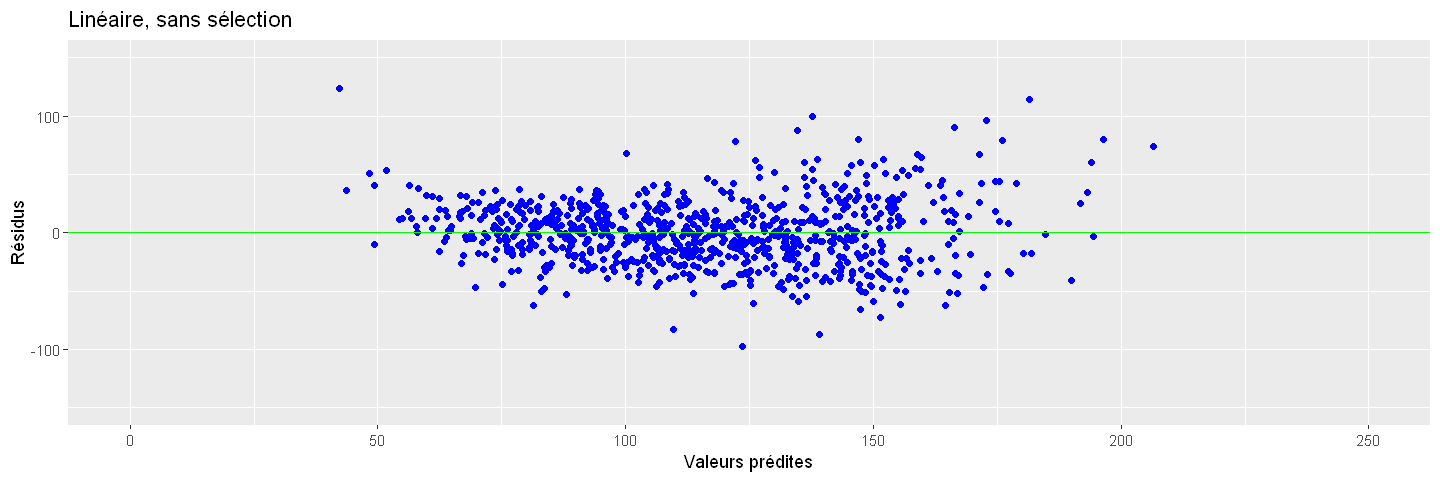

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


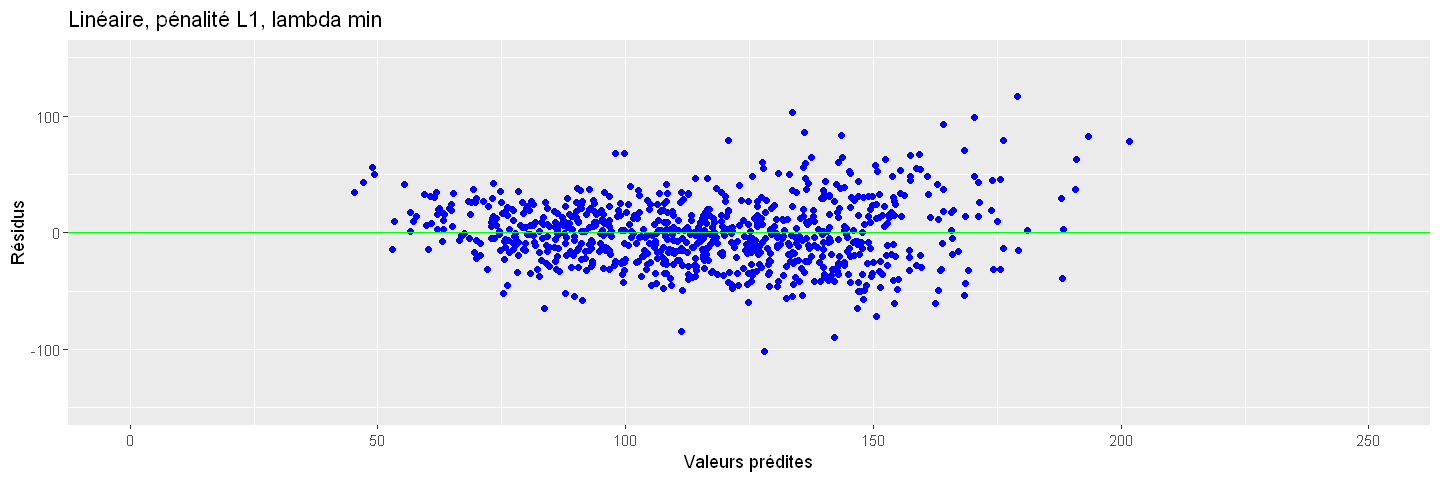

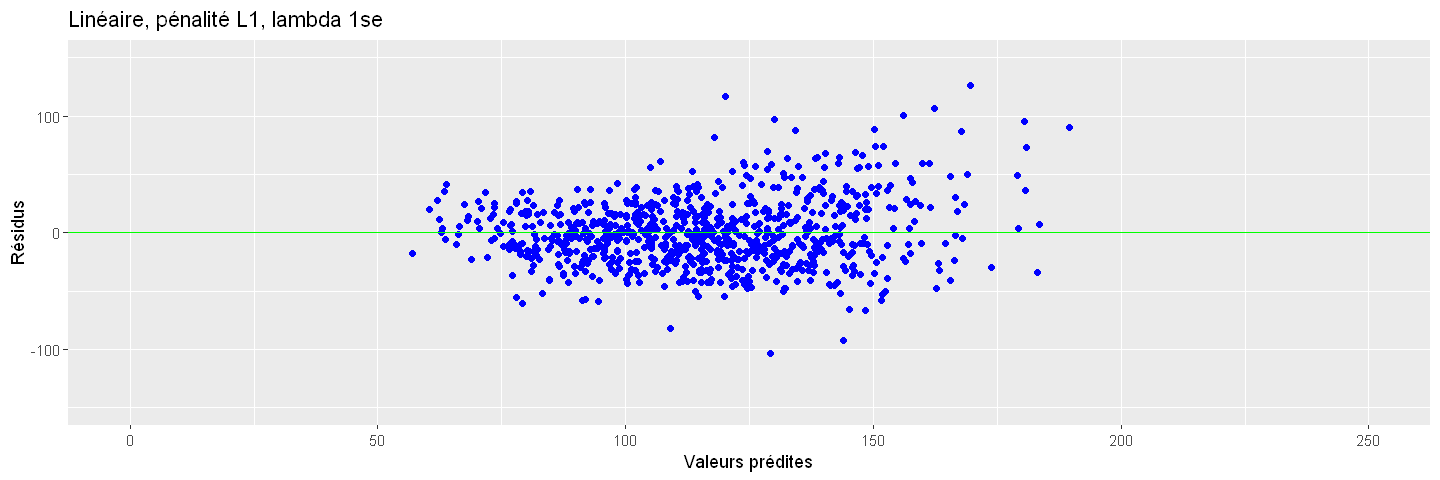

In [37]:
# Extraction des valeurs ajustées et des résidus

fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$O3obs - fit.lasso

fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- datappr$O3obs - fit.lasso.1se 

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 3))
gplot.res(fit.lm, res.lm, "Linéaire, sans sélection")
gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda min")
gplot.res(fit.lasso.1se, res.lasso.1se, "Linéaire, pénalité L1, lambda 1se") 

**Question** Commentez. 

**Réponse**

-Le modèle régularisé (avec L1) présente des résidus similaires par rapport au modèle linéaire de base, cela pourrait être un indicateur d'amélioration



**Question** Calculez le critère MSE (moyenne des carrés des résidus) pour les deux modèles. Pourquoi celui obtenu par LASSO est-il moins bon ? Quel critère LASSO minimise t-il ?

**Réponse**
Le modèle linéaire sans sélection semble avoir une meilleure performance en termes de MSE par rapport aux modèles LASSO avec différentes valeurs de lambda.
Il est important de noter que dans le contexte de la régularisation L1 (LASSO), le modèle minimise une fonction de perte modifiée qui comprend à la fois la somme des carrés des résidus (comme dans la régression linéaire classique) et une pénalité proportionnelle à la somme des valeurs absolues des coefficients

L'idée de la régularisation L1 est de pénaliser les coefficients des variables moins importantes en les poussant vers zéro. Cependant, cela peut conduire à une certaine quantité de biais dans les prédictions, en particulier si des variables importantes sont également pénalisées.

Donc, bien que LASSO puisse réduire la complexité du modèle en forçant certains coefficients à zéro, cela peut se faire au détriment de la précision globale du modèle (mesurée par le MSE) si certaines variables pénalisées étaient en fait importantes pour la prédiction.

In [38]:
paste("Modèle linéaire sans sélection:",mean(res.lm^2))
paste("LASSO avec lambda.min:",mean(res.lasso^2))
paste("LASSO avec lambda.1se:",mean(res.lasso.1se^2))

[1] "Modèle linéaire sans sélection: 783.549239590938"

[1] "LASSO avec lambda.min: 793.58476401389"

[1] "LASSO avec lambda.1se: 859.648320971249"

**Question** Estimez l'erreur du modèle linéaire simple sans sélection de variables par validation croisée. Comparez avec celle du LASSO. Qu'observez-vous?

**Réponse**

Modèle linéaire sans sélection de variables :
Erreur moyenne CV : 865.67

Modèle LASSO :
Lambda minimum (min) : Erreur moyenne CV : 815.9
Lambda 1se (1 standard error) : Erreur moyenne CV : 867.0

La comparaison vise à évaluer la performance des deux modèles en termes d'erreur moyenne lors de la validation croisée. On cherche à déterminer si l'inclusion de la régularisation L1 (LASSO) améliore la performance par rapport au modèle linéaire sans sélection de variables.


On observe que le modèle LASSO avec lambda minimum (min) a une erreur moyenne de validation croisée de 815.9, tandis que le modèle linéaire sans sélection de variables a une erreur moyenne de 865.67. Cela suggère que le modèle LASSO avec la régularisation L1 a une meilleure performance en termes d'erreur moyenne, ce qui signifie qu'il est capable de mieux généraliser aux données non vues lors de l'apprentissage.

Cependant, il est important de noter que le choix du paramètre de régularisation lambda peut influencer les performances du modèle LASSO. Dans ce cas, le lambda minimum semble donner de meilleurs résultats que le lambda 1se en termes d'erreur moyenne de validation croisée.



In [44]:
V=10 ; nV=floor(nrow(datappr)/V)
S=sample(1:nrow(datappr),replace=FALSE)
error.CV = c()
for(v in 1:V)
{ # Rq : les deux dernières obs sont tjs dans l'échantillon d'apprentissage...
    datappr.learn=datappr[-c(S[(nV*(v-1)):(nV*v)]),] 
    datappr.valid=datappr[c(S[(nV*(v-1)):(nV*v)]),]
    error.CV=c(error.CV,mean((datappr.valid$O3obs-predict(aov(O3obs ~ ., data=datappr.learn),newdata=datappr.valid))^2))
}
mean(error.CV)

print(reg.lasso.cv)



[1] 853.3596


Call:  cv.glmnet(x = x.mat, y = datappr[, 2]) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min  0.418    45   815.9 52.58      10
1se  3.896    21   867.0 64.04       3


### Modèle quadratique

L'étude suivante met en oeuvre toutes les interactions d'ordre 2 entre les variables. Il s'agit donc d'un modèle de régression quadratique. Il est estimé avec la fonction `glm()` qui permet une sélection automatique de modèle. La méthode descendante est utilisée mais celle pas-à-pas pourrait également l'être. Ce type de procédure n'est pas implémentée en python.

#### Sélection de variables par critère AIC

Sélection descendante: à chaque étape, chaque modèle est comparé à tous les sous-modèles possibles obtenus par suppression d'une des interactions ou une des variables, à condition qu'elle ne soit pas présente dans une interaction. La variable sélectionnée et supprimée est celle qui fait décroîre le critère considéré : AIC (*Akaïke Information Criterion*). 

**Question** Quel autre critère, équivalent à AIC dans le cas gaussien et de variance résiduelle connue, est utilisé en régression linéaire ? 

**Réponse**

En régression linéaire, un critère équivalent à l'AIC (Critère d'Information d'Akaike) dans le cas gaussien et de variance résiduelle connue est le BIC (Critère d'Information Bayésien). Le BIC est une mesure de la qualité d'un modèle statistique en termes de vraisemblance des données et de la complexité du modèle.

La sélection de variables par critère AIC (ou BIC) implique la recherche d'un équilibre entre la précision de l'ajustement du modèle aux données et la complexité du modèle. Un modèle avec un AIC (ou BIC) plus bas est considéré comme meilleur, car il parvient à ajuster les données tout en pénalisant la complexité excessive du modèle.

In [48]:
# Estimation du modèle avec toutes les interactions d'ordre 2
reg.glm <- glm(O3obs ~ .^2, data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step <- step(reg.glm, direction = "backward")

Start:  AIC=7783.44
O3obs ~ (JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO)^2

                  Df Deviance    AIC
- JOUR:STATION     4   471877 7776.5
- STATION:VentANG  4   471970 7776.7
- JOUR:TEMPE       1   471262 7781.4
- JOUR:LNO2        1   471262 7781.4
- LNO2:LNO         1   471263 7781.4
- JOUR:SRMH2O      1   471265 7781.4
- MOCAGE:TEMPE     1   471270 7781.5
- JOUR:LNO         1   471321 7781.5
- JOUR:MOCAGE      1   471324 7781.6
- VentMOD:VentANG  1   471374 7781.6
- JOUR:VentANG     1   471464 7781.8
- MOCAGE:VentANG   1   471510 7781.9
- MOCAGE:STATION   4   475115 7782.2
- JOUR:VentMOD     1   471774 7782.3
- VentANG:SRMH2O   1   471804 7782.4
- MOCAGE:SRMH2O    1   471846 7782.5
- VentMOD:LNO2     1   472012 7782.8
- TEMPE:VentMOD    1   472318 7783.3
<none>                 471261 7783.4
- VentMOD:LNO      1   472416 7783.5
- MOCAGE:VentMOD   1   472452 7783.5
- STATION:LNO      4   476488 7784.6
- VentANG:LNO2     1   473094 7784.7


In [49]:
# Coefficients du modèle
anova(reg.glm.step, test = "F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
NULL,NA,NA,831,1394332.0,NA,NA
MOCAGE,1,469071.2081,830,925260.8,763.8571548,3.647061e-118
TEMPE,1,225512.0241,829,699748.7,367.2341644,1.630666e-67
STATION,4,10252.6125,825,689496.1,4.1739566,2.371040e-03
VentMOD,1,14316.7164,824,675179.4,23.3140002,1.652264e-06
VentANG,1,10355.9415,823,664823.5,16.8640919,4.433664e-05
SRMH2O,1,244.5782,822,664578.9,0.3982825,5.281601e-01
LNO2,1,3273.0334,821,661305.9,5.3299583,2.121919e-02
LNO,1,9138.5263,820,652167.3,14.8815971,1.238032e-04


#### Sélection de variable par régularisation L1 (LASSO)

In [50]:
# Comparer avec un modèle quadratique avec pénalité L1
x.mat2 <- model.matrix(O3obs ~ .^2 - 1, data = datappr)
reg.lasso2.cv <- cv.glmnet(y = datappr[, "O3obs"], x = x.mat2)
coef(reg.lasso2.cv, s = "lambda.1se")

74 x 1 sparse Matrix of class "dgCMatrix"
                             s1
(Intercept)         29.78872737
JOUR0                .         
JOUR1                .         
MOCAGE               .         
TEMPE                1.26885748
STATIONAls           .         
STATIONCad           .         
STATIONPla           .         
STATIONRam           .         
VentMOD              .         
VentANG              .         
SRMH2O               .         
LNO2                 .         
LNO                  .         
JOUR1:MOCAGE         .         
JOUR1:TEMPE          .         
JOUR1:STATIONAls     .         
JOUR1:STATIONCad     .         
JOUR1:STATIONPla     .         
JOUR1:STATIONRam     .         
JOUR1:VentMOD        .         
JOUR1:VentANG        .         
JOUR1:SRMH2O         .         
JOUR1:LNO2           .         
JOUR1:LNO            .         
MOCAGE:TEMPE         0.01332892
MOCAGE:STATIONAls    .         
MOCAGE:STATIONCad    .         
MOCAGE:STATIONPla    .        

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


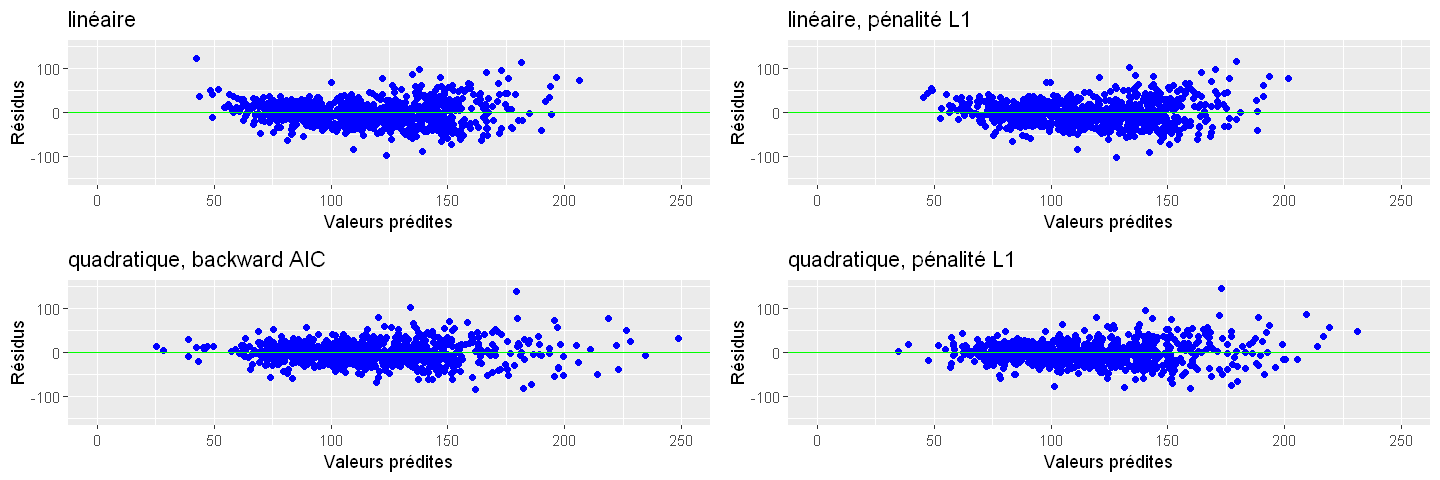

In [51]:
# Extraction des valeurs ajustées et des résidus
fit.glm <- reg.glm.step$fitted.values
res.glm <- reg.glm.step$residuals
fit.lasso2 <- predict(reg.lasso2.cv, s = "lambda.min", newx = x.mat2)
res.lasso2 <- datappr$O3obs - fit.lasso2

# Graphe des résidus
g1<-gplot.res(fit.lm, res.lm, "linéaire")
g2<-gplot.res(fit.lasso, res.lasso, "linéaire, pénalité L1")
g3<-gplot.res(fit.glm, res.glm, "quadratique, backward AIC")
g4<-gplot.res(fit.lasso2, res.lasso2, "quadratique, pénalité L1")
grid.arrange(g1,g2,g3,g4,ncol=2,nrow=2)

 On remarque que la présence de certaines interactions ou variables sont pertinentes au sens du critère d'Akaïke mais pas significative au sens du test de Fisher. Cette présence dans le modèle pourrait être plus finement analysée en considérant une estimation de l'erreur par validation croisée. L'idée serait de retirer une à une les variables ou interactions les moins significatives pour voir comment se comporte la validation croisée. D'autre part, si la procédure pas-à-pas conduit à un modèle différent, l'estimation de l'erreur par validation croisée permet également d'optimiser le choix.
 
Ces raffinements ne s'avèrent pas efficaces sur ces données. Le modèle obtenu par minimisaiton du critère AIC est conservé.

### Prévision de l'échantillon test

Le modèle "optimal" obtenu par la méthode descendante est utilisé pour prédire l'échantillon test et estimer ainsi, sans biais, une erreur de prévision. Deux erreurs sont estimées : la première est celle quadratique pour la régression tandis que la deuxième est issue de la matrice de confusion qui croise les dépassements de seuils prédits avec ceux effectivement observés. 

#### Erreur de régression

In [52]:
# Calcul des prévisions pour le modèle quadratique backward AIC
pred.glm <- predict(reg.glm.step, newdata = datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm - datestr[, "O3obs"])^2) / nrow(datestr)

[1] 601.5874

In [53]:
# Erreur quadratique par MOCAGE
sum((datestr[,"MOCAGE"] - datestr[,"O3obs"])^2) / nrow(datestr)

[1] 1384.503

#### Erreur de classification (matrice de confusion)

In [54]:
# Matrice de confusion pour la prévision du dépassement de seuil
table(pred.glm > 150, datestr[, "O3obs"] > 150)

       
        FALSE TRUE
  FALSE   161   19
  TRUE      5   24

In [55]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil par MOCAGE
table(datestr[, "MOCAGE"] > 150, datestr[, "O3obs"] > 150)

       
        FALSE TRUE
  FALSE   141   19
  TRUE     25   24

Noter ces erreurs pour les comparer avec celles obtenues par les autres méthodes. Noter l'asymétrie des erreurs.

# <FONT COLOR="Red">Partie 3: Prévision par modèle binomial  </font>

Plutôt que de prévoir la concentration puis le dépassement, on peut se poser la question de savoir s'il ne serait pas pertinent de prévoir directement la présence ou l'absence d'un dépassement. La variable à modéliser étant binaire, c'est la régression logistique qui va être employée. Comme pour la régression, différentes stratégies de choix de modèle peuvent être utilisées et comparées avant d'estimer l'erreur de prévision sur l'échantillon test.

### Régression logistique sans interaction

In [56]:
# estimation du modèle complet
log.lm <- glm(DepSeuil ~. , data = datappq, family = binomial)
# significativité des paramètres
anova(log.lm, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,831,737.8141,NA
JOUR,1,0.4443555,830,737.3698,5.050277e-01
MOCAGE,1,125.2166123,829,612.1532,4.563158e-29
TEMPE,1,136.8421803,828,475.3110,1.305601e-31
STATION,4,16.9891229,824,458.3219,1.942378e-03
VentMOD,1,11.7860664,823,446.5358,5.967570e-04
VentANG,1,0.8373860,822,445.6984,3.601454e-01
SRMH2O,1,6.4120067,821,439.2864,1.133512e-02
LNO2,1,0.1893011,820,439.0971,6.634989e-01


In [57]:
# Recherche d'un modèle optimal au sens d'Akaïke
log.lm.step <- step(log.lm, direction = "backward")

Start:  AIC=459.72
DepSeuil ~ JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO

          Df Deviance    AIC
- MOCAGE   1   434.25 458.25
- JOUR     1   434.36 458.36
- VentANG  1   434.60 458.60
<none>         433.72 459.72
- LNO      1   439.10 463.10
- LNO2     1   439.21 463.21
- SRMH2O   1   440.49 464.49
- VentMOD  1   440.90 464.90
- STATION  4   455.47 473.47
- TEMPE    1   550.99 574.99

Step:  AIC=458.25
DepSeuil ~ JOUR + TEMPE + STATION + VentMOD + VentANG + SRMH2O + 
    LNO2 + LNO

          Df Deviance    AIC
- JOUR     1   434.79 456.79
- VentANG  1   435.23 457.23
<none>         434.25 458.25
- SRMH2O   1   441.49 463.49
- VentMOD  1   442.86 464.86
- LNO      1   447.00 469.00
- LNO2     1   451.13 473.13
- STATION  4   471.33 487.33
- TEMPE    1   558.59 580.59

Step:  AIC=456.79
DepSeuil ~ TEMPE + STATION + VentMOD + VentANG + SRMH2O + LNO2 + 
    LNO

          Df Deviance    AIC
- VentANG  1   436.01 456.01
<none>         434.79 456.79

In [58]:
# Modèle obtenu
anova(log.lm.step, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,831,737.8141,NA
TEMPE,1,214.189011,830,523.6251,1.674882e-48
STATION,4,32.315989,826,491.3091,1.648689e-06
VentMOD,1,29.015384,825,462.2937,7.180577e-08
SRMH2O,1,9.116772,824,453.1770,2.532764e-03
LNO2,1,5.017192,823,448.1598,2.509684e-02
LNO,1,12.150777,822,436.0090,4.906743e-04


In [59]:
# matrice de confusion de l'échantillon d'apprentissage et erreur apparente
table(log.lm.step$fitted.values > 0.5, datappq[, "DepSeuil"])

       
        FALSE TRUE
  FALSE   673   70
  TRUE     24   65

### Régression logistique avec interactions

Avec autant de variables et d'interactions donc de paramètres, l'estimation du modèle complet de régression logistique  rencontre des soucis et affiche des *warnings* car certaines probabilité trop bien ajustés (0 ou 1) provoquent des divisions par 0. Ici une procédure *forward* ou  mieux *stepwise* de sélection des variables et interactions  conduit à des résultats raisonnables. Une méthode avec pénalisation L1 peut aussi être utilisée.

In [60]:
# régression avec le modèle minimum
log.qm <- glm(DepSeuil ~ 1, data = datappq,family = binomial)
# algorithme stepwise en précisant le plus grand 
# modèle possible
log.qm.step1 <- step(log.qm, direction = "both",
    scope = list(lower = ~1, upper = ~(JOUR + MOCAGE + TEMPE + 
            STATION + VentMOD + VentANG + LNO2 + LNO + SRMH2O)^2), 
    family=binomial)

Start:  AIC=739.81
DepSeuil ~ 1

          Df Deviance    AIC
+ TEMPE    1   523.63 527.63
+ MOCAGE   1   613.24 617.24
+ SRMH2O   1   683.87 687.87
+ VentANG  1   726.72 730.72
+ STATION  4   721.68 731.68
+ LNO2     1   727.76 731.76
+ VentMOD  1   733.38 737.38
<none>         737.81 739.81
+ LNO      1   736.47 740.47
+ JOUR     1   737.37 741.37

Step:  AIC=527.63
DepSeuil ~ TEMPE

          Df Deviance    AIC
+ MOCAGE   1   476.67 482.67
+ STATION  4   491.31 503.31
+ SRMH2O   1   503.12 509.12
+ VentMOD  1   515.31 521.31
+ VentANG  1   516.54 522.54
<none>         523.63 527.63
+ LNO      1   521.92 527.92
+ JOUR     1   522.78 528.78
+ LNO2     1   523.06 529.06
- TEMPE    1   737.81 739.81

Step:  AIC=482.67
DepSeuil ~ TEMPE + MOCAGE

               Df Deviance    AIC
+ SRMH2O        1   465.50 473.50
+ STATION       4   460.11 474.11
+ LNO           1   470.23 478.23
+ LNO2          1   471.61 479.61
+ VentMOD       1   473.42 481.42
+ VentANG       1   473.55 481.55
<none>  

In [62]:
anova(log.qm.step1, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,831,737.8141,NA
TEMPE,1,214.189011,830,523.6251,1.674882e-48
MOCAGE,1,46.956415,829,476.6687,7.258302e-12
SRMH2O,1,11.172483,828,465.4962,8.301945e-04
STATION,4,15.922320,824,449.5739,3.125190e-03
VentMOD,1,8.683311,823,440.8906,3.211370e-03
TEMPE:STATION,4,11.682335,819,429.2083,1.987666e-02
MOCAGE:VentMOD,1,5.702069,818,423.5062,1.694493e-02
SRMH2O:STATION,4,15.218744,814,408.2874,4.268380e-03


### Prévision de l'échantillon test

#### Matrice de confusion

In [63]:
# Prévision du modèle quadratique
pred.log <- predict(log.qm.step1, newdata = datestq, type = "response")
# Matrice de confusion pour la prévision du 
# dépassement de seuil
table(pred.log > 0.5, datestq[, "DepSeuil"])

       
        FALSE TRUE
  FALSE   164   20
  TRUE      2   23

Comparer avec l'approche précédente. Mémoriser les résultats obtenus pour comparer avec les autres méthodes.

**Réponse**

En analysant les résultats de la matrice de confusion. L'erreur de classification est plus faible pour le modèle avec interactions par rapport au modèle sans interactions, ce qui suggère que le modèle avec interactions a de meilleures performances sur l'échantillon de test.

#### Courbe ROC

Il est également possible de construire une courbe ROC en association de la prévision obtenue à partir d'un modèle gaussien. En effet, la variation du seuil théorique de dépassement (150) va faire varier les proportions respectives des taux de vrais et faux positifs. Cela revient encore à faire varier le seuil d'une "proba" pour les valeurs de prévisions divisées par 300.

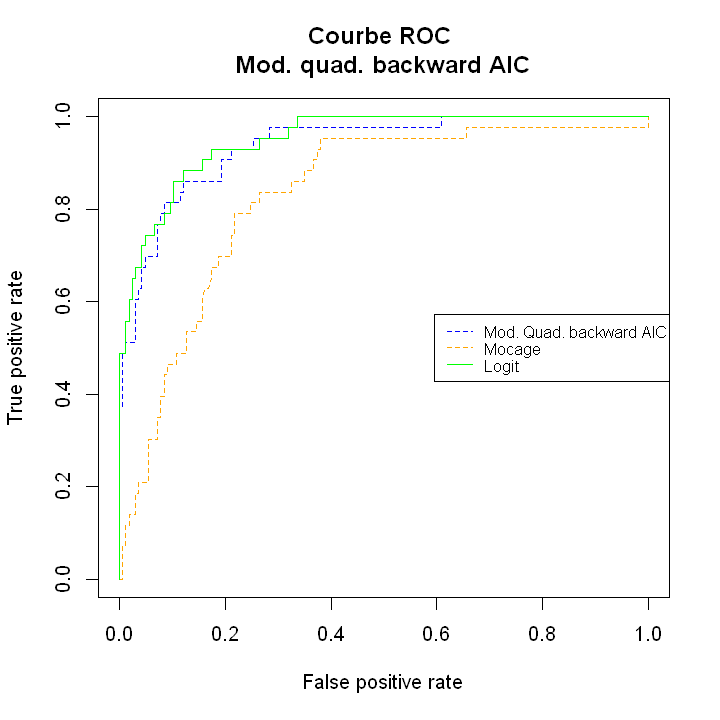

In [64]:
options(repr.plot.width = 6, repr.plot.height = 6)
par(mfrow = c(1, 1))
rocmocage <- datestr[,  "MOCAGE"] / 300 
DepSeuil=c(datestr[, "O3obs"] > 150)
predmocage <- prediction(rocmocage,DepSeuil)
perfmocage <- performance(predmocage, "tpr", "fpr")


rocglm <- pred.glm / 300    
predglm <- prediction(rocglm,DepSeuil)
perfglm <- performance(predglm, "tpr", "fpr")

roclogit <- predict(log.qm.step1, newdata = datestq, type="response")
predlogit <- prediction(roclogit, datestq[, "DepSeuil"])
perflogit <- performance(predlogit, "tpr", "fpr")

plot(perfglm, col = "blue",lty=2, main = "Courbe ROC \n Mod. quad. backward AIC ")
plot(perfmocage,col="orange",lty=2,add=TRUE)
plot(perflogit,col="green",lty=1,add=TRUE) 

legend("right", legend=c("Mod. Quad. backward AIC", "Mocage", "Logit"),
       col=c("blue","orange","green"), lty=c(2,2,1), text.font=1,    cex=0.8)


**Question** Que sont sensibilité et spécificité d'une courbe ROC?

**Réponse**

Les courbes ROC (Receiver Operating Characteristic) sont utilisées pour évaluer les performances d'un modèle de classification en visualisant la relation entre la sensibilité (taux de vrais positifs) et la spécificité (taux de vrais négatifs) à différents seuils de classification. Une courbe ROC représente ces deux mesures sur un graphique, où l'axe des x représente le taux de faux positifs (1 - spécificité) et l'axe des y représente le taux de vrais positifs (sensibilité).

Sensibilité et Spécificité d'une courbe ROC :

-Sensibilité : C'est le taux de vrais positifs, c'est-à-dire la capacité du modèle à identifier correctement les exemples positifs.

-Spécificité : C'est le taux de vrais négatifs, c'est-à-dire la capacité du modèle à identifier correctement les exemples négatifs.

Les résultats obtenus dépendent évidemment en plus de l'échantillonnage initial entre apprentissage et test. Dans le cas où les courbes se croisent, cela signifie qu'il n'y a pas de prévision uniformément meilleure de l'occurrence de dépassement. Cela dépend de la sensibilité ou de la spécificité retenue pour le modèle. Ceci souligne l'importance de la bonne définition du critère à utiliser pour le choix d'une "meilleure" méthode. Ce choix dépend directement de celui , "politique" ou "économique" de sensibilité et / ou spécificité du modèle retenu. En d'autres termes, quel taux de fausse alerte, avec des imputations économiques évidentes, est supportable au regard des dépassements non détectés et donc de la dégradation sanitaire de la population à risque ?
 
C'est une fois ce choix arrêté que le statisticien peut opérer une comparaison des méthodes en présence.

**Question** Les performances des deux approches gaussiennes et binomiales sont-elles très différentes ?

**Réponse**

Le modèle logistique (logit) et le modèle quadratique semblent être assez similaires,tous deux positionnés vers le coin supérieur gauche du graphique, cela suggère qu'ils ont une bonne performance en termes de sensibilité et de spécificité. Le fait qu'ils se croisent sur certains points indique que la performance relative des deux modèles dépend du seuil de classification choisi.

**Question** Sur le graphe ci-dessus, ajouter la courbe ROC pour le modèle déterministe MOCAGE. Qu'observez-vous?

**Réponse**

Quant au modèle MOCAGE, il est légèrement plus éloigné du coin supérieur gauche, cela pourrait indiquer une performance légèrement inférieure par rapport aux modèles logit et quadratique. Il pourrait être moins précis dans la distinction entre les vrais positifs et les faux positifs.

# <FONT COLOR="Red">Partie 4: Arbre de décision binaire  </font>

La librairie `rpart` est celle la plus couramment utilisée pour la construction d'arbres de décision. Deux types d'arbres peuvent être estimés selon que la variable à modéliser est la concentration d'ozone (arbre de régression) ou directement le dépassement du seuil (arbre de discrimination ou de décision). Différents paramètres contrôlent l'exécution de l'algorithme : la pénalisation minimale (cp) pour la construction de l'arbre maximal, le nombre minimal d'observations par noeud, le nombre de validations croisées (par défaut 10)... cf. l'aide en ligne (`?rpart.control`) pour plus de détails mais celle-ci n'est pas très explicite sur certains paramètres.

NB. Une séquence de valeurs de la pénalisation `cp` est associée à une séquence d'arbres emboîtés.


### Estimation et élagage de l'arbre de régression
**Question** Quel critère est optimisé lors de la création d'un noeud de l'arbre?

**Réponse**

Lors de la création d'un nœud pour l'arbre de régression, l'algorithme rpart optimise l'erreur quadratique moyenne (EQM) pour déterminer la meilleure division des données à ce nœud. L'erreur quadratique moyenne mesure la dispersion des valeurs de la variable dépendante (O3obs dans ce cas) autour de la moyenne de ces valeurs.

In [65]:
library(rpart) 
help(rpart)
help(rpart.control)

In [66]:
tree.reg=rpart(O3obs~.,data=datappr,control=rpart.control(cp=0.001))

La commande `summary(tree.reg)` fournit un descriptif de l'arbre obtenu mais un graphe est  préférable.

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


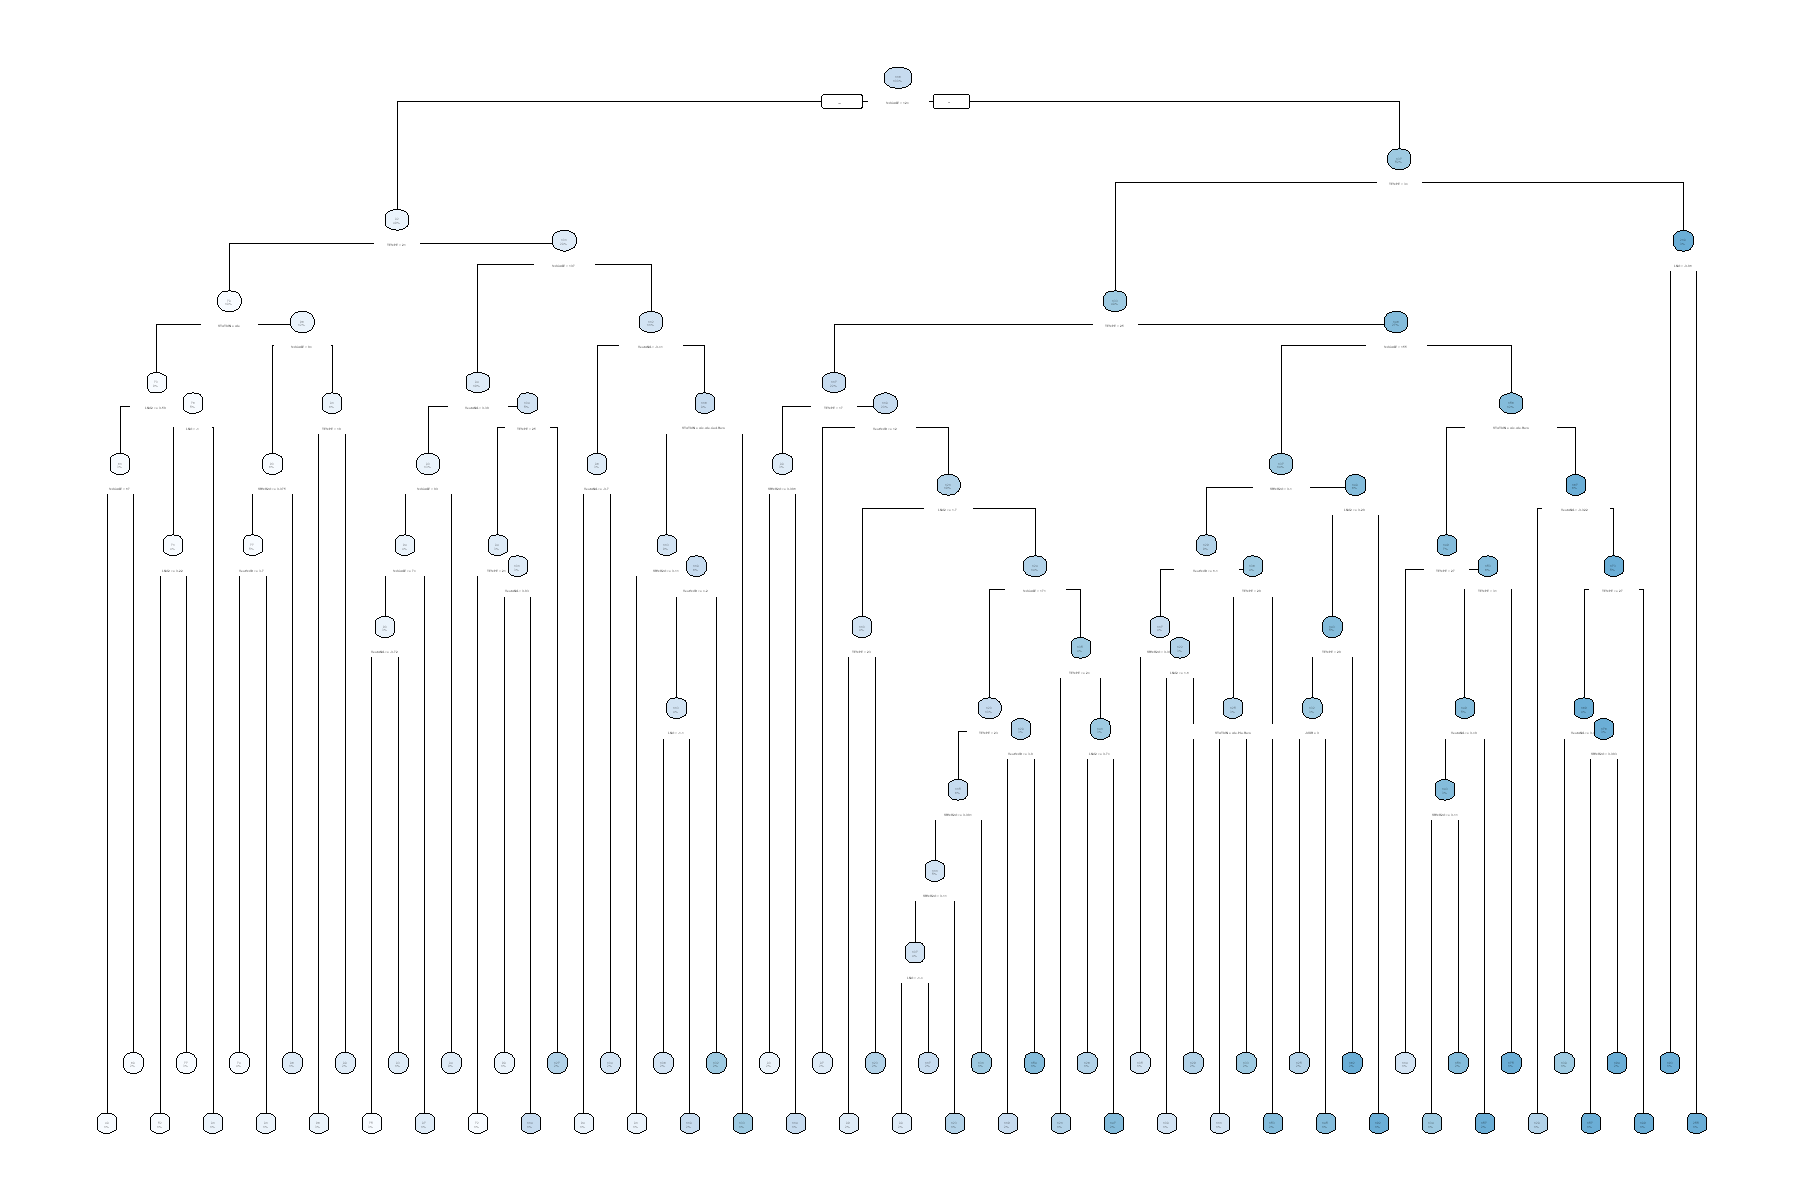

In [67]:
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
rpart.plot(tree.reg)

L'arbre est illisible et présente trop de feuilles pour une bonne prévision (sur-apprentissage), il est nécessaire d'en réduire le nombre par élagage. Les commandes suivantes calculent les prévisions obtenues par validation croisée 10-fold pour chaque arbre élagué suivant les valeurs successives du coefficient de complexité. La séquence de ces valeurs est implicitement celle fournit par `rpart`.

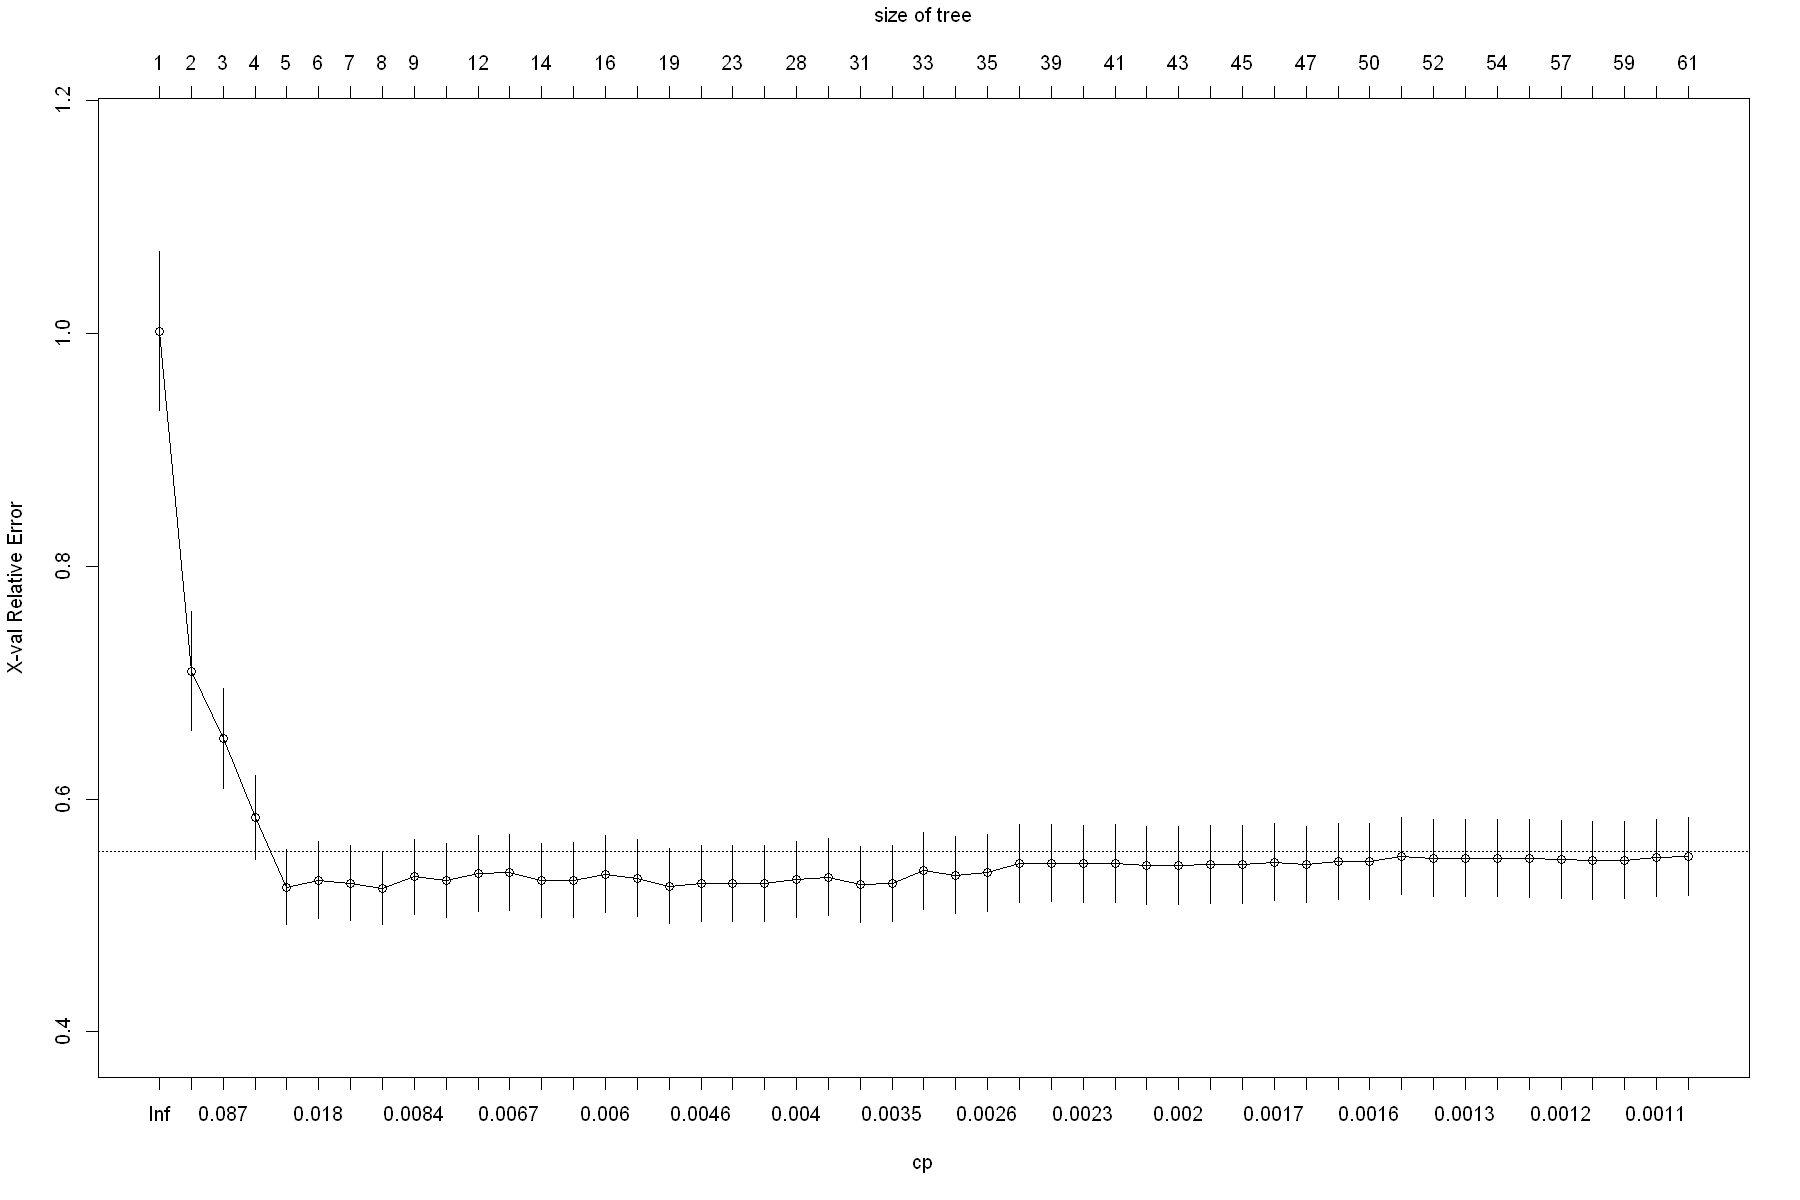

In [68]:
help(xpred.rpart)
xmat<-xpred.rpart(tree.reg,xval=10) 
# one row for each observation and one column for each complexity value

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"O3obs"])^2,2,sum)

plotcp(tree.reg)

Cherchez la valeur de `cp` correspondant à la plus petite erreur puis utilisez la pour la construction del'arbre.

0.007221621

[1] 0.007221621

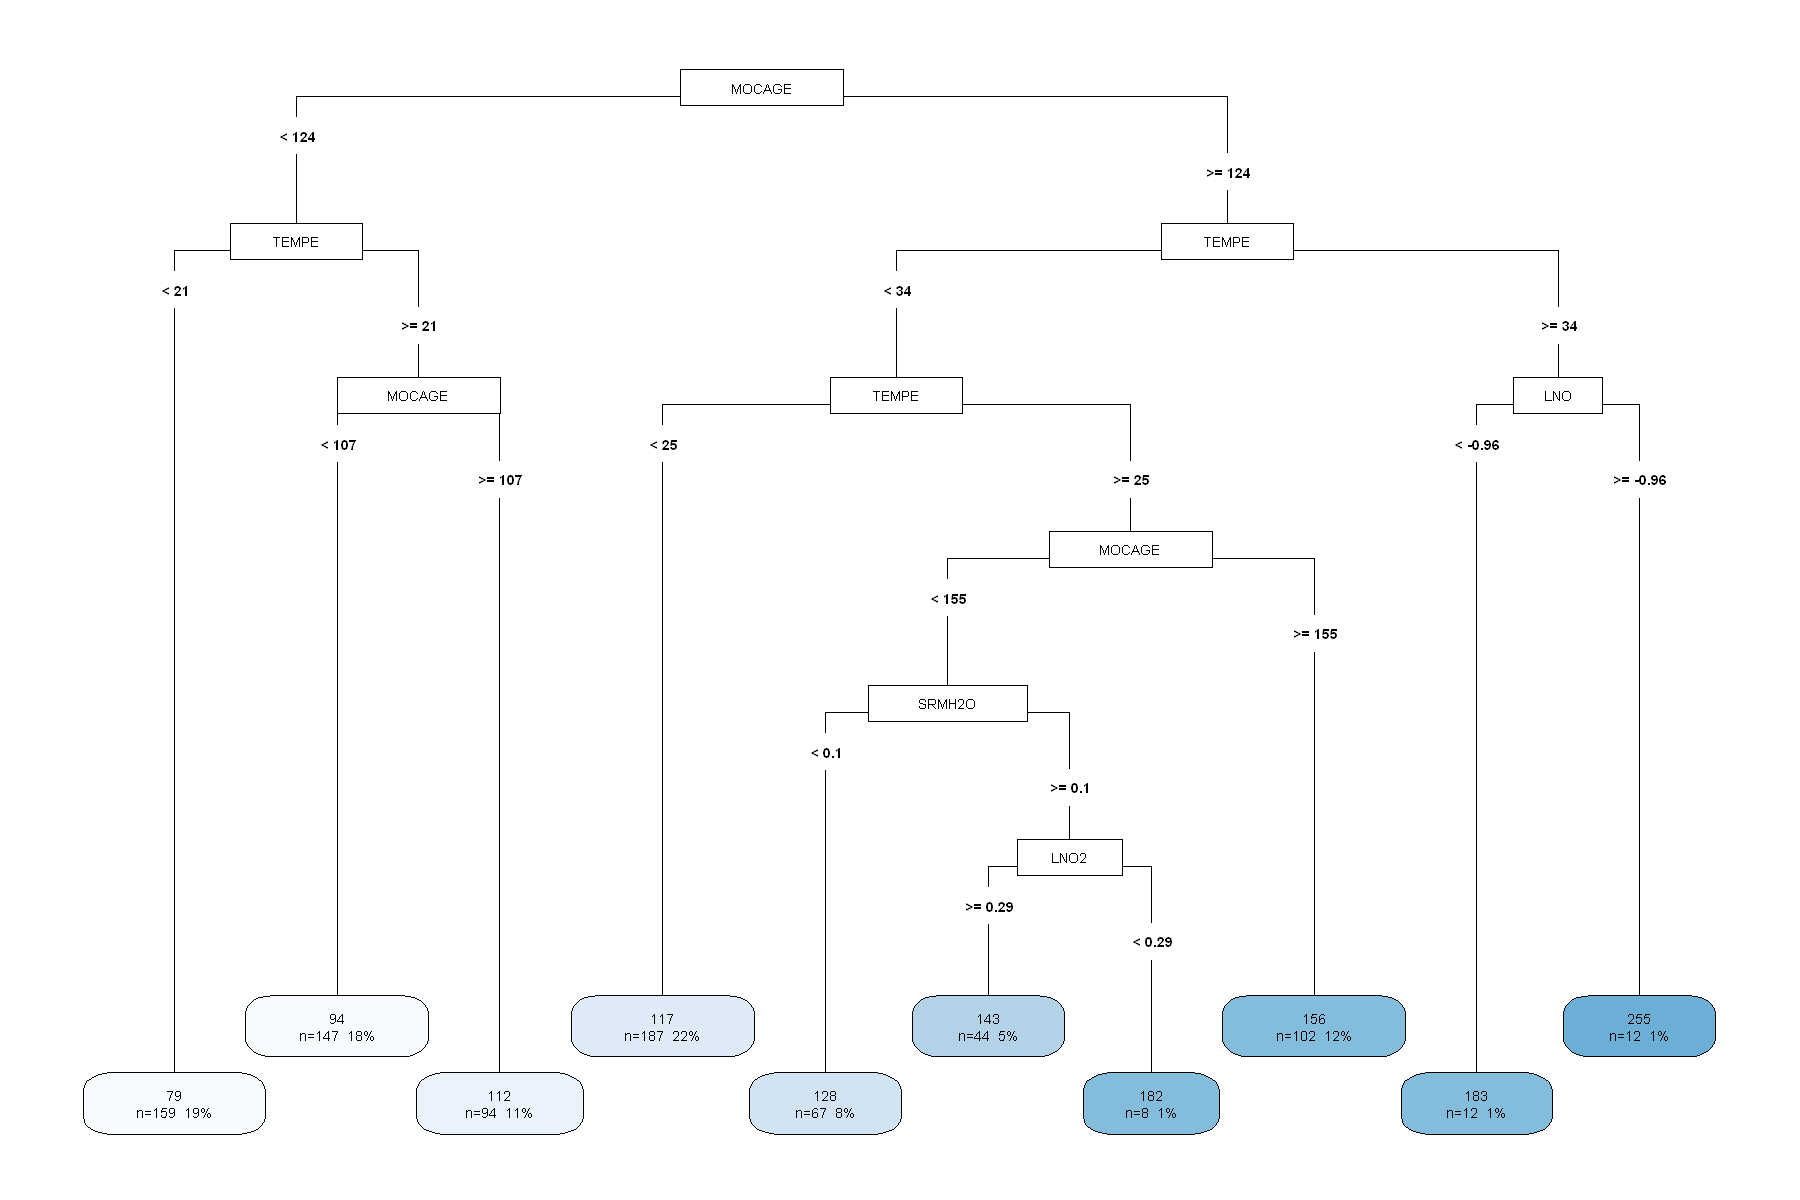

In [69]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(O3obs~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg,type=5,extra=101)

La librairie `partykit` propose une construction graphique de l'arbre:

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



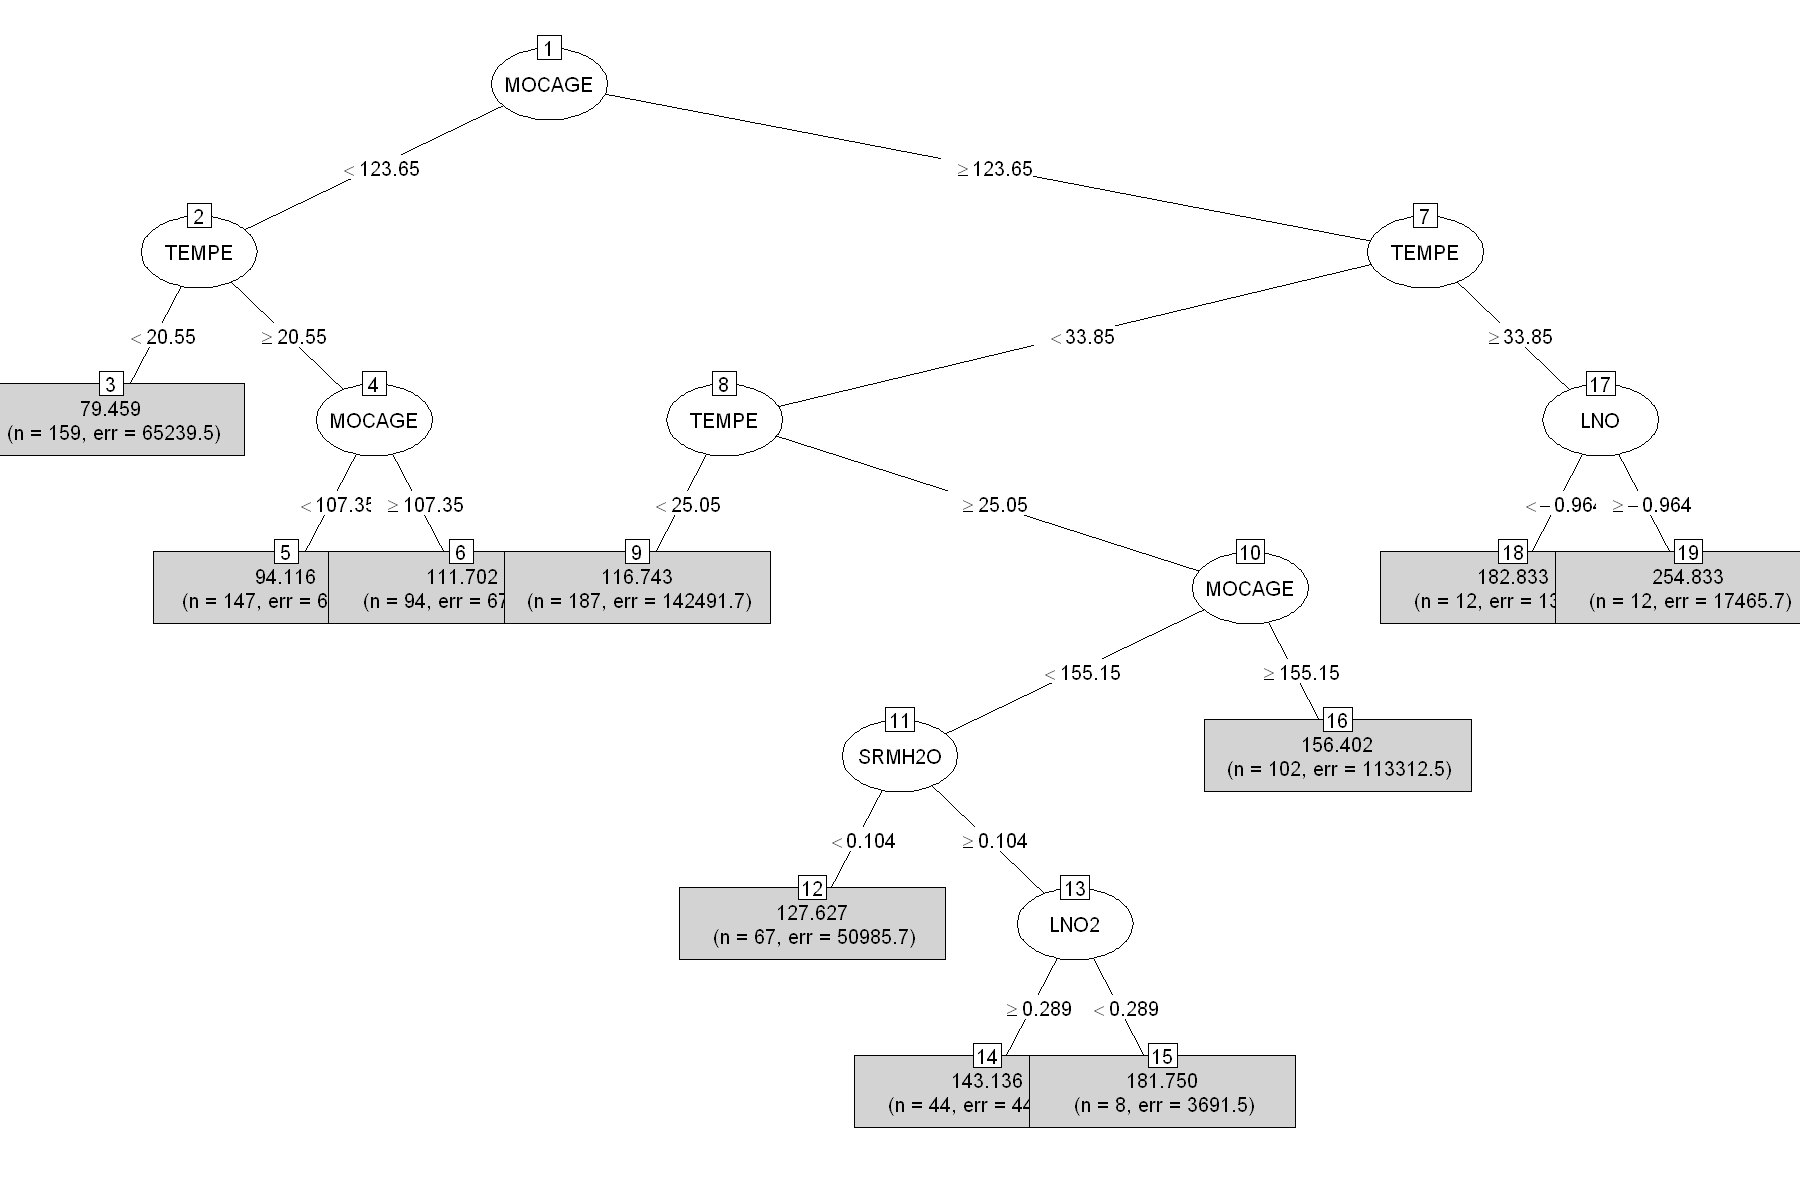

In [70]:
library(partykit)
plot(as.party(tree.reg), type="simple")

La fenêtre est trop petite pour représenter les distributions (histogramme) de la variable cible (concentration en ozone) dans chaque feuille. 

**Question** Quelle est la variable qui contribue le plus à l'interprétation ?

**Réponse**

TEMPE

Graphe des résidus

Warning message:
"Removed 12 rows containing missing values (`geom_point()`)."


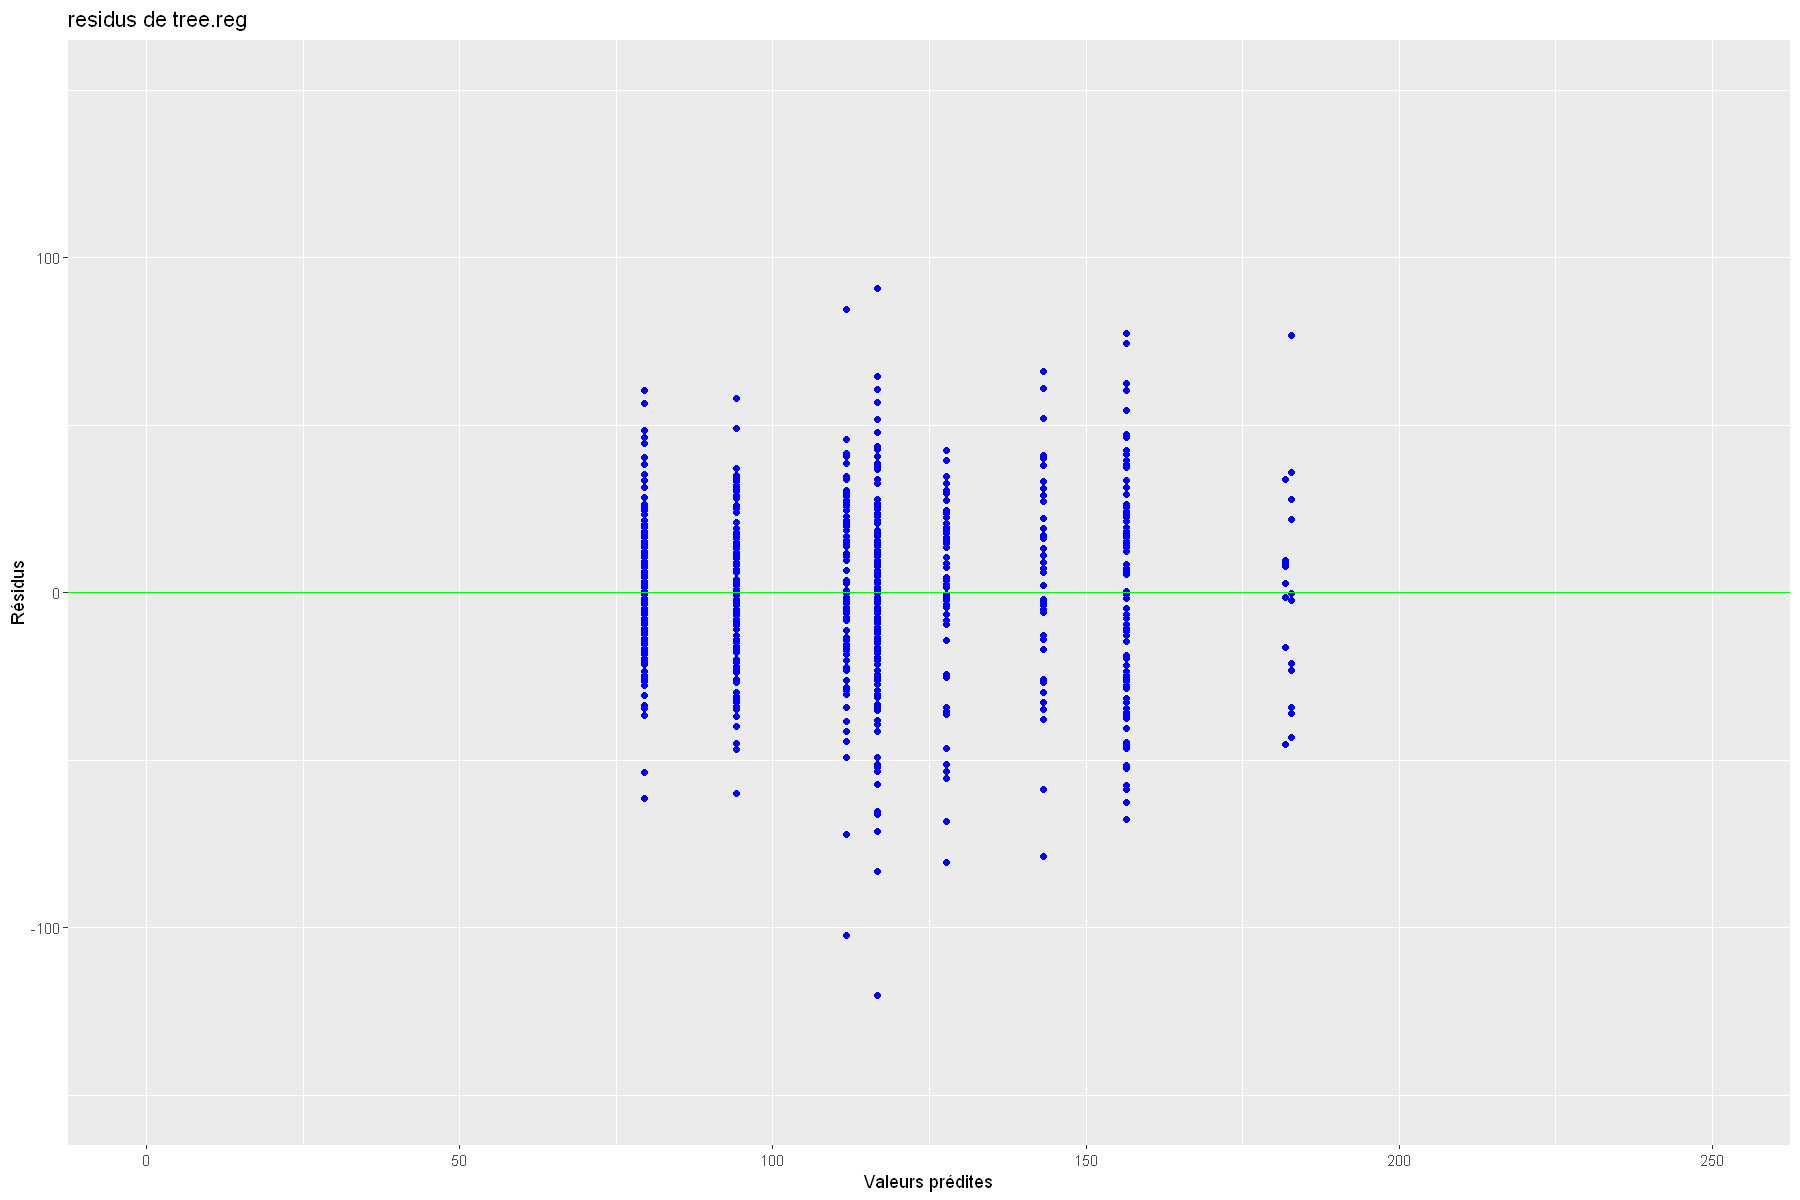

In [71]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"O3obs"]
gplot.res(fit.tree,res.tree,"residus de tree.reg")

**Question** A quoi est due la structure particulière de ce graphe ?

**Réponse**

La structure particulière du graphe des résidus, caractérisée par des lignes verticales, suggère que le modèle d'arbre de décision a des difficultés à capturer certaines variations dans les données. Cette structure peut être due à plusieurs raisons potentielles :

Sensibilité aux valeurs atypiques : Les arbres de décision peuvent être sensibles aux valeurs atypiques ou aux observations qui ont un impact disproportionné sur le modèle. Si certaines observations ont des caractéristiques particulières qui ne sont pas bien représentées par le modèle, cela peut entraîner des résidus systématiques.

Non-linéarités non capturées : Les arbres de décision sont des modèles non linéaires, mais ils peuvent encore avoir du mal à capturer des relations complexes ou non linéaires dans les données. Si les relations entre les variables et la variable cible sont complexes et non linéaires, un modèle plus sophistiqué pourrait être nécessaire.

Caractéristiques manquantes ou non incluses : Si des variables importantes sont absentes du modèle, cela peut conduire à des résidus systématiques. Il peut être utile d'examiner d'autres caractéristiques des données qui pourraient améliorer la performance du modèle.

Surajustement (Overfitting) : L'arbre de décision initial peut être surajusté aux données d'apprentissage, conduisant à une performance moindre sur de nouvelles données. L'élagage de l'arbre peut aider à remédier à cela en simplifiant la structure de l'arbre.

Voici un exemple de code pour faire cet élagage avec la librairie `caret`

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


[1] "Valeur de cp retenue = 0.00615856567394948"


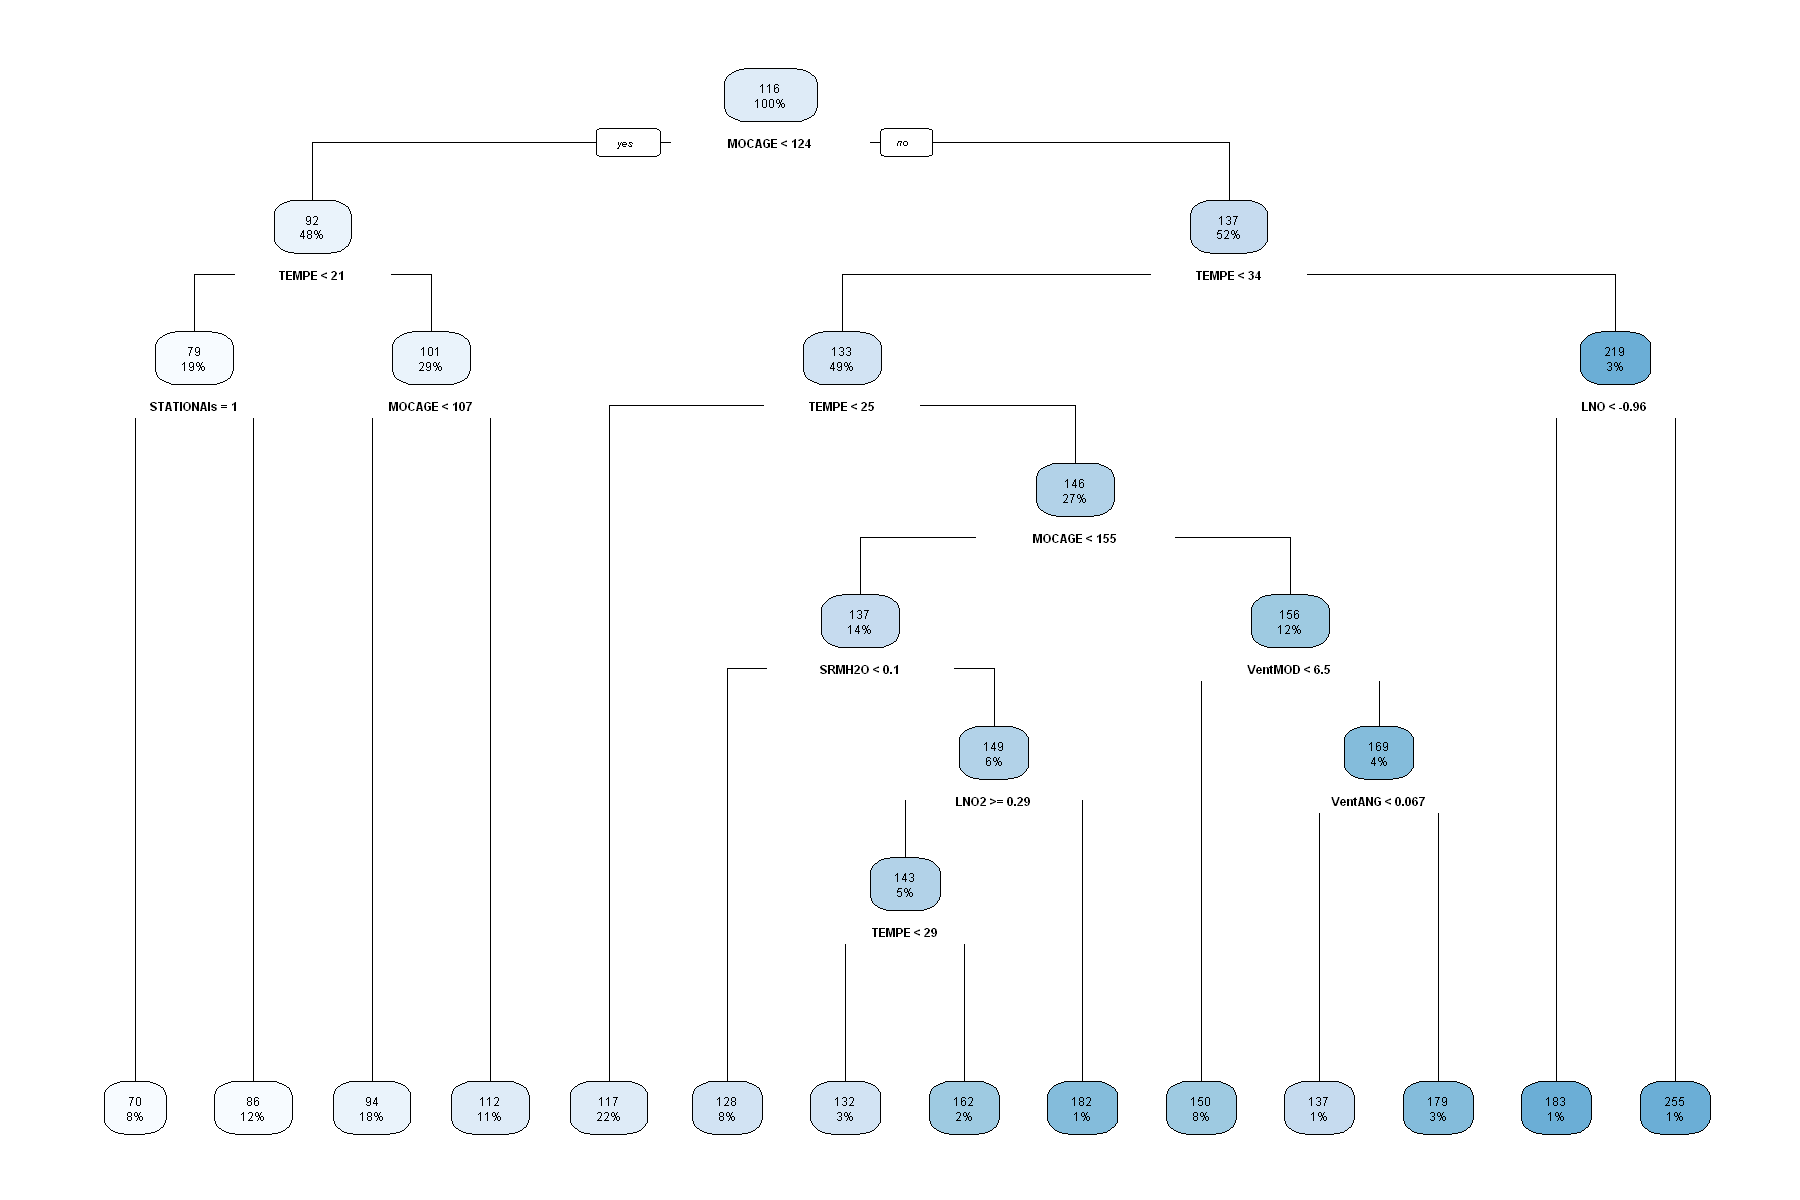

In [74]:
ctrl <- trainControl(method = "cv",number = 10)
treecaret <- train(O3obs~.,data=datappr,method = "rpart",trControl = ctrl,tuneLength =20)
print(paste("Valeur de cp retenue = ",treecaret$bestTune,sep=""))
rpart.plot(treecaret$finalModel)

### Estimation et élagage d'un arbre de discrimination

Dans le cas d'une discrimination, le critère par défaut est l'indice de concentration de Gini ; il est possible de préciser un autre critère (split="information") ainsi que des poids sur les observations, une matrice de coûts de mauvais classement ainsi que des probabilités a priori (`?rpart` pour plus de détails).

**Question** Quel autre critère d'hétérogénéité est utilisé ?

**Réponse**

Le critère d'hétérogénéité utilisé dans cet exemple est l'entropie, spécifié à l'aide du paramètre parms=list(split="information") lors de la construction de l'arbre de discrimination.

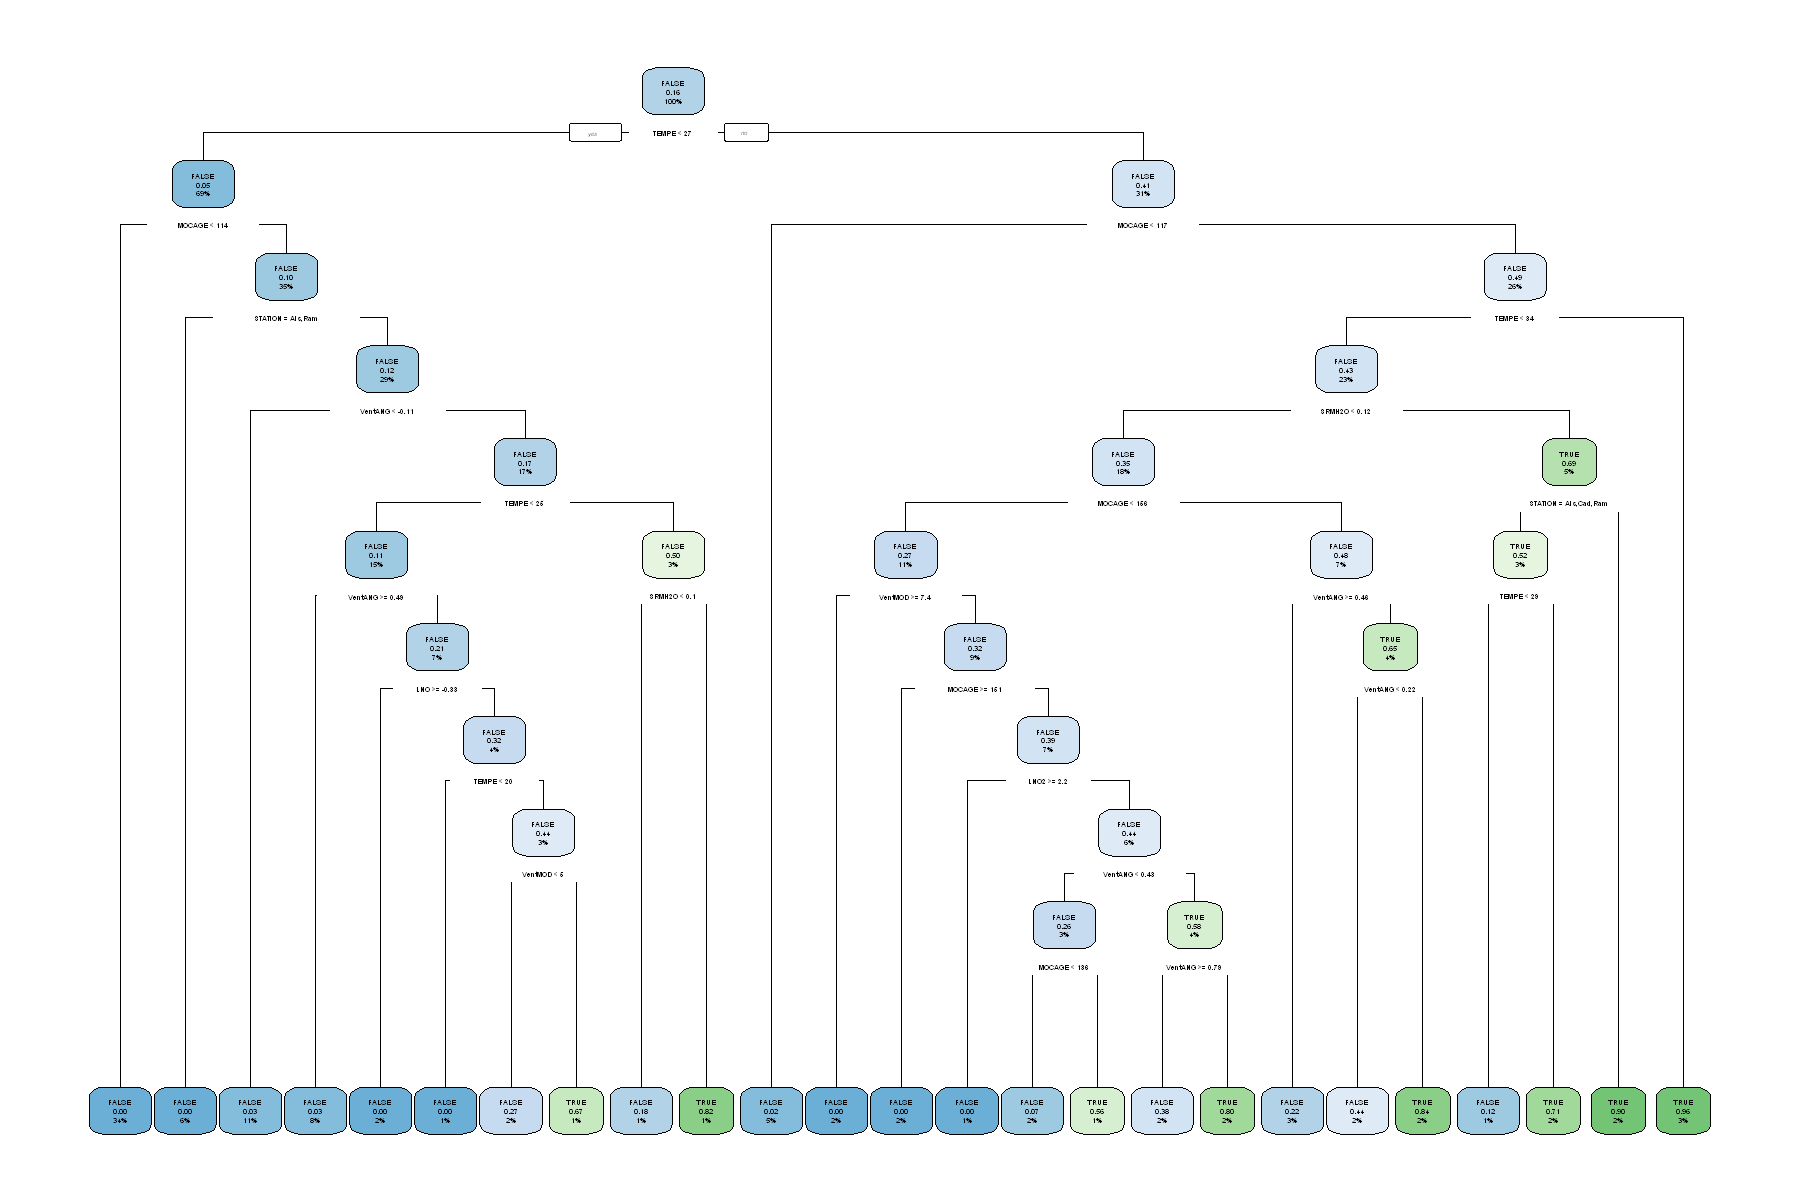

In [75]:
tree.dis=rpart(DepSeuil~.,data=datappq,parms=list(split="information"),cp=0.001)
rpart.plot(tree.dis) 

La même procédure d'élagage par validation croisée est mise en place mais avec une expression différente de l'erreur de prévision: taux de mal classés plutôt qu'erreur quadratique.

In [76]:
xmat = xpred.rpart(tree.dis)
# Comparaison des valeurs prédite et observée
xerr=datappq$DepSeuil!= (xmat>1.5) 
# Calcul  des estimations des taux d'erreur
CVerr=apply(xerr, 2, sum)/nrow(xerr)
CVerr

0.525925926 0.045961754 0.030089031 0.018144368 0.012394963 0.009799079 
  0.1622596   0.1394231   0.1406250   0.1574519   0.1550481   0.1586538 
0.008281733 0.002721655 
  0.1586538   0.1562500

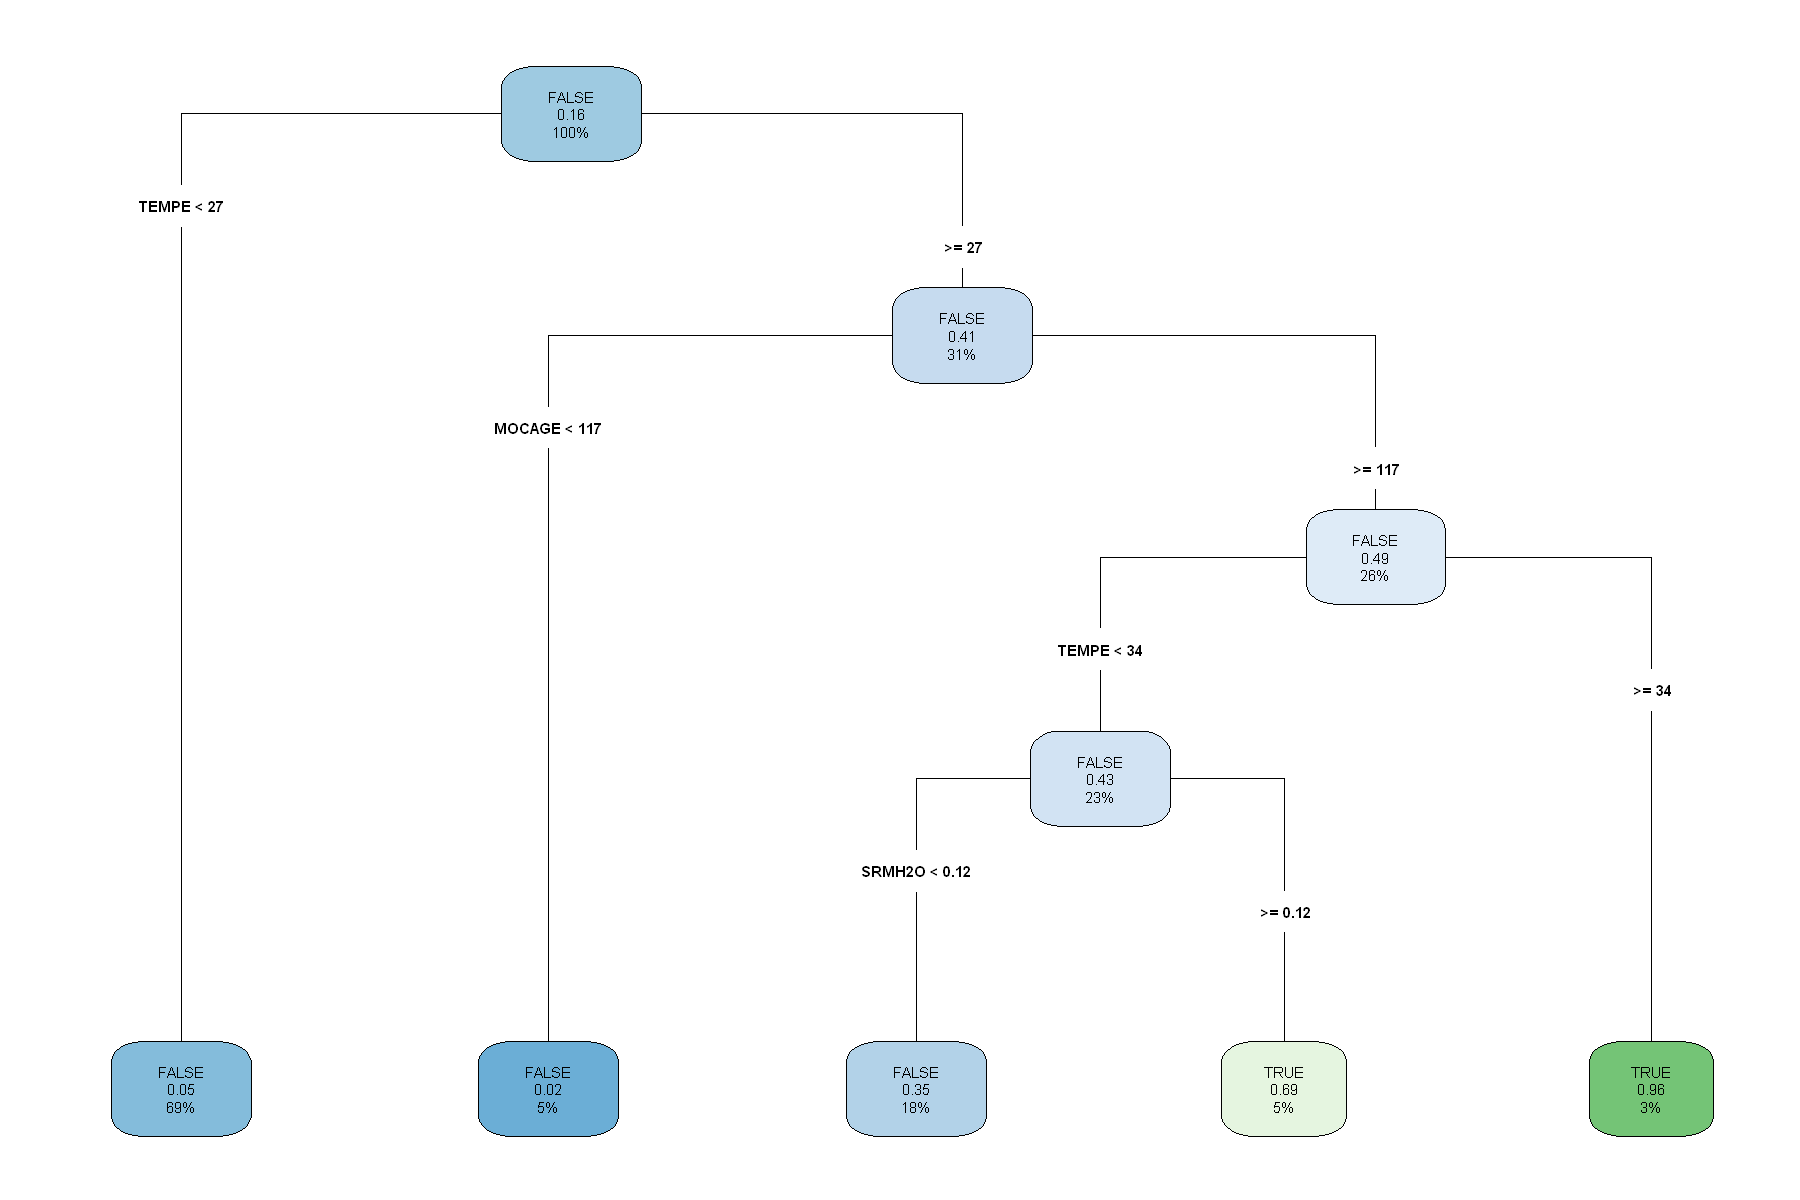

In [77]:
tree.dis=rpart(DepSeuil~.,data=datappq,parms=list(split="information"),cp=as.numeric(attributes(which.min(CVerr))$names))
rpart.plot(tree.dis,type=4)

Avec la librairie `caret`:

[1] "Valeur de cp retenue = 0.0257309941520468"


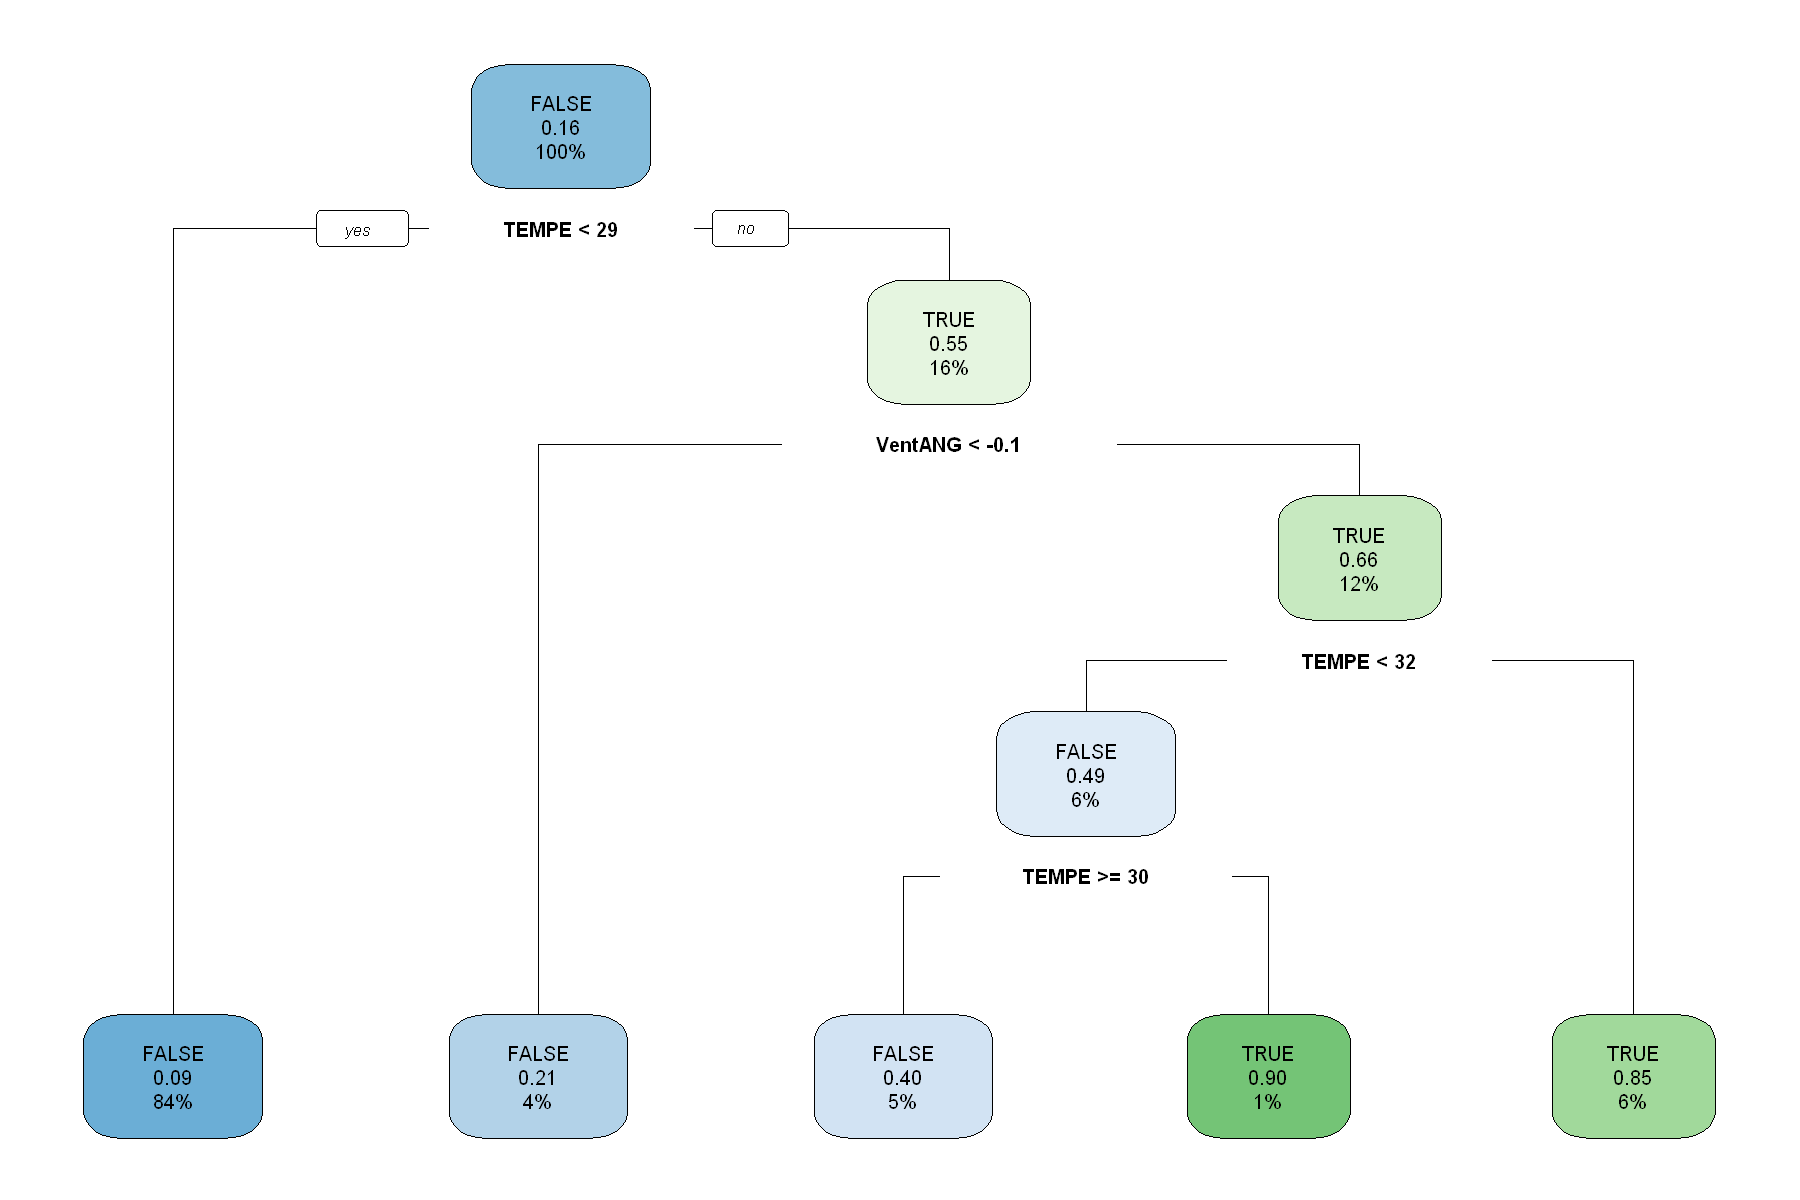

In [78]:
ctrl <- trainControl(method = "cv",number = 10)
treecaret <- train(DepSeuil~.,data=datappq,method = "rpart",trControl = ctrl,tuneLength =20,metric="Accuracy")
print(paste("Valeur de cp retenue = ",treecaret$bestTune,sep=""))
rpart.plot(treecaret$finalModel)

### Prévision de l'échantillon test

Différentes prévisions sont considérées assorties des erreurs estimées sur l'échantillon test. Prévision quantitative de la concentration, prévision de dépassement à partir de la prévision quantitative et directement la prévision de dépassement à partir de l'arbre de décision.

#### Erreur de régression

In [79]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision en régression
sum((pred.treer-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 823.7185

#### Erreur de classification (matrice de confusion)

In [80]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil (régression)
  #table(pred.treer>150,datestr[,"O3obs"]>150)
confusionMatrix(as.factor(pred.treer>150),as.factor(datestr[,"O3obs"]>150))$table

          Reference
Prediction FALSE TRUE
     FALSE   157   23
     TRUE      9   20

In [81]:
# Même chose pour l'arbre de discrimination
pred.treeq=predict(tree.dis,newdata=datestq,type="class")
  #table(pred.treeq,datestq[,"DepSeuil"])
confusionMatrix(pred.treeq,datestq[,"DepSeuil"])$table

          Reference
Prediction FALSE TRUE
     FALSE   165   28
     TRUE      1   15

**Question** Quelle stratégie semble meilleure à ce niveau ?

**Réponse**

Erreur de régression : L'erreur quadratique moyenne de prévision pour le modèle de régression est relativement élevée (749.02). Cela indique une certaine divergence entre les valeurs prédites et les observations réelles, suggérant une performance modérée en termes de prévision quantitative.

Matrice de confusion :
Pour le modèle de régression, la matrice de confusion montre qu'il prédit correctement la classe "TRUE" (dépassement du seuil) dans une majorité des cas, mais il y a également un nombre significatif de faux positifs (17).
Pour le modèle de discrimination, la matrice de confusion semble montrer une performance légèrement meilleure avec moins de faux positifs (4) mais un nombre similaire de vrais positifs.

Conclusion provisoire :
En termes de dépassement du seuil, le modèle de discrimination semble avoir une performance légèrement meilleure, avec une réduction du nombre de faux positifs.

#### Courbes ROC

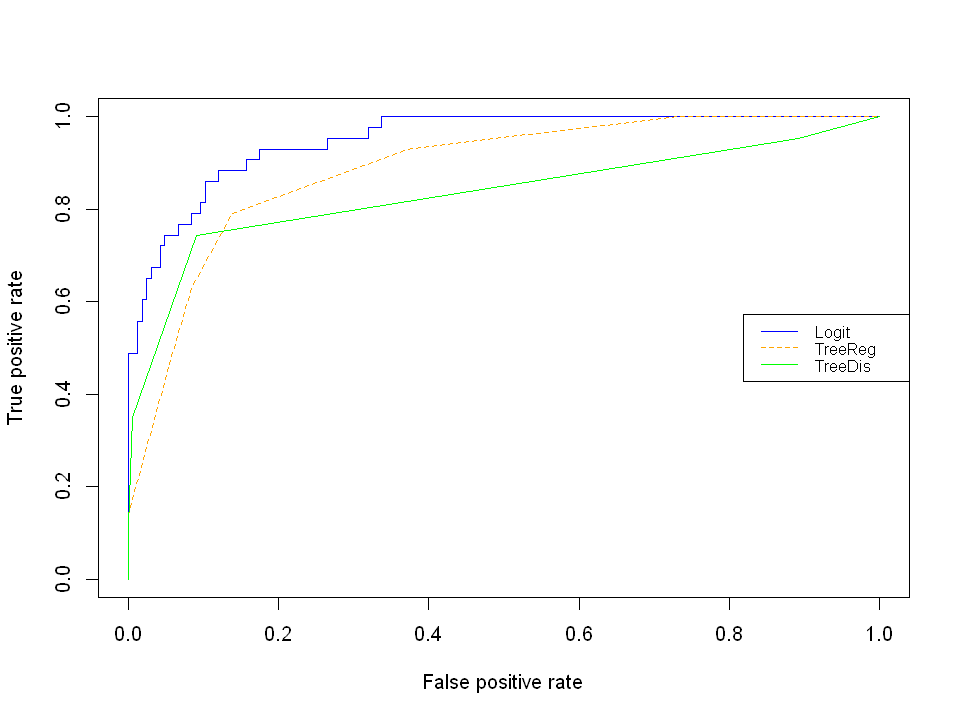

In [82]:
ROCregtree=pred.treer/300
predregtree=prediction(ROCregtree,datestq$DepSeuil)
perfregtree=performance(predregtree,"tpr","fpr")
ROCdistree=predict(tree.dis,newdata=datestq,type="prob")[,2]
preddistree=prediction(ROCdistree,datestq$DepSeuil)
perfdistree=performance(preddistree,"tpr","fpr")
# tracer les courbes ROC en les superposant 
# pour mieux comparer

options(repr.plot.width = 8, repr.plot.height = 6)
plot(perflogit,col="blue")
plot(perfregtree,col="orange",lty=2,add=TRUE) 
plot(perfdistree,col="green",add=TRUE)  

legend("right", legend=c("Logit", "TreeReg", "TreeDis"),
       col=c("blue","orange","green"), lty=c(1,2,1), text.font=1,    cex=0.8)


**Question** Comparez les qualités de prévision. Une meilleure méthode se dégage-t-elle ?

**Réponse**

En évaluant les deux modèles, TreeReg et TreeDis, et en considérant différentes métriques, il n'est pas possible de dégager clairement une méthode supérieure. Chacun des modèles présente des avantages et des inconvénients, et le choix entre les deux dépend des priorités spécifiques de l'application.

TreeReg (Régression) :

Avantages :
Performances décentes en termes de matrice de confusion.
Zones où la courbe ROC est au-dessus de celle de TreeDis.
Inconvénients :
Erreur de régression relativement élevée.

TreeDis (Discrimination) :

Avantages :
Taux de mal classés relativement bas.
Performances équilibrées en termes de matrice de confusion.
Zones où la courbe ROC est au-dessus de celle de TreeReg.
Inconvénients :
AUC variable sur la courbe ROC.
Le choix entre les deux modèles doit être guidé par les objectifs spécifiques de l'application. Si la précision de la régression est cruciale, TreeReg peut être préférable malgré l'erreur élevée. Si la classification précise des dépassements de seuil est prioritaire, TreeDis semble être une option équilibrée. Il pourrait également être bénéfique d'explorer des approches combinées ou d'autres modèles pour optimiser les performances en fonction des critères définis par l'application.

====> Logit reste plus performant!


# <FONT COLOR="Red">Partie 5: Réseaux de neurones </font>

### Introduction

Il s'agit d'estimer un modèle de type *perceptron* avec en entrée les variables qualitatives ou quantitatives et en sortie la variable à prévoir. Des fonctions R pour l'apprentissage d'un perceptron élémentaire ont été réalisées par différents auteurs et sont accessibles sur le réseau. La librairie `nnet` de (Ripley, 1999), est limitée au perceptron à une couche. Ce n'est pas de l'*apprentissage profond* ! mais suffisant dans bien des cas. Une librairie R associée au logiciel éponyme H2O propose des réseaux à plusieurs couches et "convolutionnels".

Comme pour les arbres, la variable à expliquer est soit quantitative soit qualitative ; la fonction de transfert du neurone de sortie d'un réseau doit être adaptée en conséquence. 

**Question** Quelle fonction de transfert est utilisée pour le dernier neurone en régression ? en classification  binaire? en classification multiclasse ? 

**Réponse**

Régression : Dans le cas de la régression, la fonction de transfert du dernier neurone est souvent l'identité. Cela signifie que la sortie du réseau est une combinaison linéaire des entrées sans transformation non linéaire supplémentaire.

Classification binaire : Pour la classification binaire, la fonction de transfert utilisée pour le dernier neurone est généralement la fonction sigmoïde. La sigmoïde comprime la sortie entre 0 et 1, ce qui peut être interprété comme une probabilité.

Classification multiclasse : Pour la classification multiclasse, la fonction de transfert utilisée pour le dernier neurone est généralement la fonction softmax. La fonction softmax attribue des probabilités à chaque classe, et la classe avec la probabilité la plus élevée est choisie comme prédiction finale.


**Question** Quel est le choix par défaut pour les neurones de la couche cachée?

**Réponse**

Le choix par défaut est généralement une fonction d'activation rectifiée linéaire (ReLU) pour les neurones de la couche cachée.


Différentes stratégies sont proposées pour éviter le sur-apprentissage. La première consiste à optimiser le nombre de neurones sur la couche cachée. Très approximativement il est d'usage de considérer, qu'en moyenne, il faut une taille d'échantillon d'apprentissage 10 fois supérieure au nombre de poids c'est-à-dire au nombre de paramètres à estimer. On remarque qu'ici la taille de l'échantillon d'apprentissage (832) est modeste pour une application raisonnable du perceptron. Seuls des nombres restreints de neurones peuvent être considérés et sur une seule couche cachée. 

**Question** Quel est le paramètre `decay` de la fonction `nnet`?

**Réponse**

Le paramètre decay dans la fonction nnet est un hyperparamètre qui contrôle la régularisation du réseau de neurones. La régularisation est utilisée pour prévenir le sur-apprentissage en ajoutant une pénalité aux poids du modèle. Le paramètre decay ajuste l'intensité de cette pénalité.

**Question** Indiquez une autre façon d'éviter le sur-apprentissage.

**Réponse**

Outre la régularisation, une autre façon d'éviter le sur-apprentissage est l'utilisation de la validation croisée. La division des données en ensembles d'apprentissage et de validation permet d'évaluer la performance du modèle sur des données non utilisées pendant l'apprentissage. Cela permet de détecter si le modèle s'ajuste trop aux données d'apprentissage spécifiques et ne généralise pas bien à de nouvelles données. La validation croisée peut aider à sélectionner le modèle le plus performant tout en évitant le sur-apprentissage.

### Cas de la régression

In [83]:
library(MASS)
library(nnet)
# apprentissage
# attention au paramètre linout dans le cas de la régression
nnet.reg=nnet(O3obs~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

# weights:  71
initial  value 12564103.041142 
iter  10 value 1497097.262556
iter  20 value 1356348.549129
iter  30 value 1292803.302288
iter  40 value 1226400.581272
iter  50 value 897044.949702
iter  60 value 845125.170298
iter  70 value 706402.615429
iter  80 value 666681.752574
iter  90 value 651802.152614
iter 100 value 599629.742356
iter 110 value 590147.219226
iter 120 value 582050.609656
iter 130 value 565380.915762
iter 140 value 557277.520730
iter 150 value 532584.520503
iter 160 value 525446.757089
iter 170 value 517933.809523
iter 180 value 512935.537812
iter 190 value 506134.879411
iter 200 value 497891.119198
iter 210 value 491732.871981
iter 220 value 489113.364298
iter 230 value 488588.231806
iter 240 value 488478.880281
iter 250 value 488473.207344
final  value 488473.181071 
converged


a 12-5-1 network with 71 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   4.16    7.95    0.39    1.00  -24.19   11.70   16.23   -4.27  -12.65    1.18 
i10->h1 i11->h1 i12->h1 
  -7.82   -3.44  -10.71 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   5.12    2.17    0.72   -2.73  -19.51   -5.85   -1.73   -1.12   -3.93    4.69 
i10->h2 i11->h2 i12->h2 
 -10.33   11.45   -8.62 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
   1.01   -0.85    0.01   -0.35    5.25    0.91    2.02   -1.15   -0.11   -0.48 
i10->h3 i11->h3 i12->h3 
  43.19    4.82   -1.90 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4  i7->h4  i8->h4  i9->h4 
  -2.56    0.02    0.03    0.27   -0.11    0.74    0.25    0.33    0.05    0.18 
i10->h4 i11->h4 i12->h4 
 -10.55   -4.35    4.00 
  b->h5  i1->h5  i2->h5  i3->h5  i4->h5  i5->h5  i6->h5  i7->h5  i8->h5  i9

La commande donne la "trace" de l'exécution avec le comportement de la convergence mais le détail des poids de chaque entrée de chaque neurone ne constitue pas un résultats très explicite ! 

**Question** Contrôlez le nombre de poids estimés.

L'optimisation des paramètres nécessite encore le passage par la validation croisée. Il n'y a pas de fonction dans la librairie `nnet` permettant de le faire mais la fonction ` tune.nnet` de la librairie `e1071` est adaptée à cette démarche.

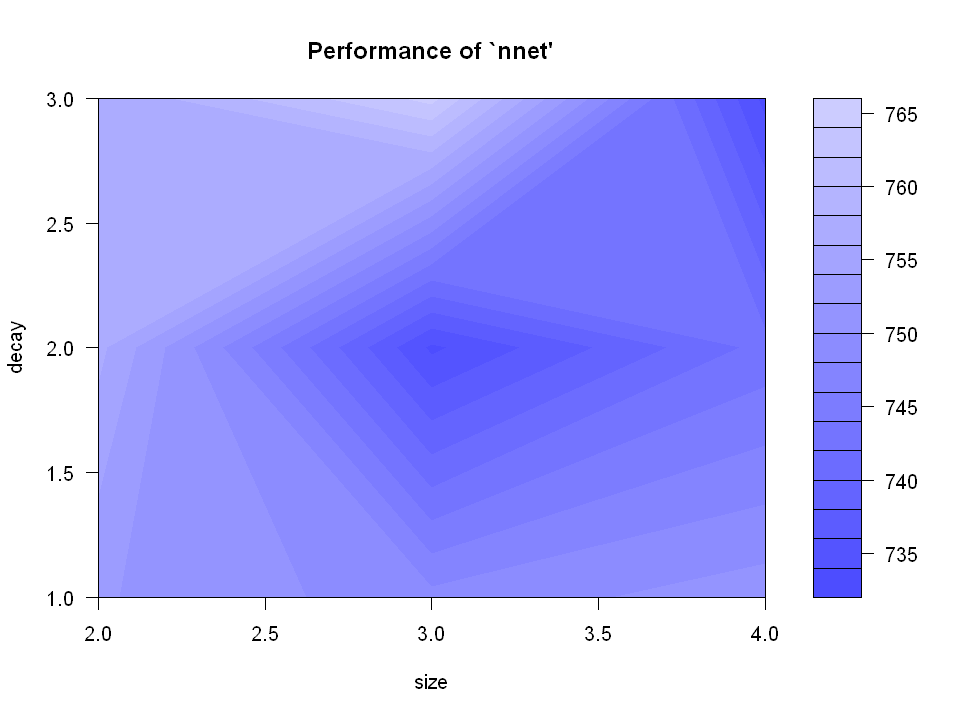

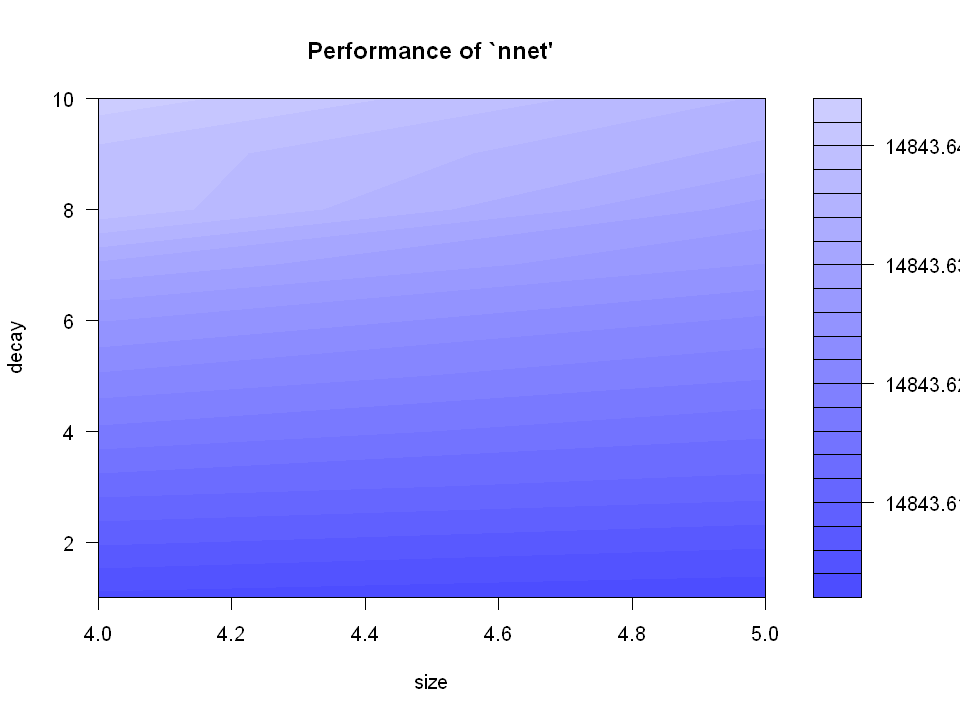

In [84]:
library(e1071)
plot(tune.nnet(O3obs~.,data=datappr,size=c(2,3,4),decay=c(1,2,3),maxit=200,linout=TRUE))
plot(tune.nnet(O3obs~.,data=datappr,size=4:5,decay=1:10))

Faire éventuellement varier la grille des paramètres (zoom), notez la taille et le `decay` optimaux. Il faudrait aussi  faire varier le nombre total d'itérations. Cela risque de prendre un peu de temps ! Notez également que chaque exécution donne des résultats différents... il n'est donc pas très utile d'y passer beaucoup de temps !

**Question** Ré-estimez le modèle supposé optimal avant de tracer le graphe des résidus.

**Réponse**

nouveaux paramètres pour optimiser le modèle : size = 3, declay =2

# weights:  43
initial  value 12620366.269795 
iter  10 value 1426310.069281
iter  20 value 1410387.754765
iter  30 value 1357614.466225
iter  40 value 1085346.388936
iter  50 value 1026657.299629
iter  60 value 998914.787187
iter  70 value 978789.362211
iter  80 value 956630.716657
iter  90 value 876635.847401
iter 100 value 819839.383398
iter 110 value 798754.730040
iter 120 value 767397.487122
iter 130 value 739481.689036
iter 140 value 675266.749663
iter 150 value 666365.953239
iter 160 value 638002.763085
iter 170 value 589030.747011
iter 180 value 562894.554971
iter 190 value 552778.080120
iter 200 value 549990.754859
final  value 549990.754859 
stopped after 200 iterations


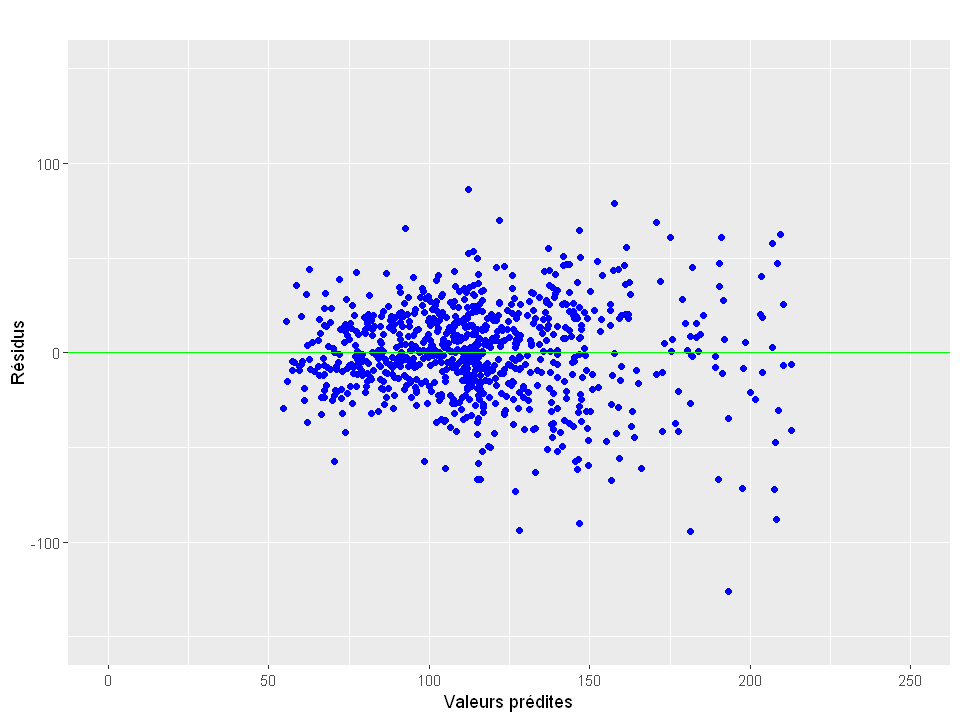

In [85]:
nnet.reg=nnet(O3obs~.,data=datappr,size=3,decay=2,linout=TRUE,maxit=200)
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"O3obs"]
gplot.res(fit.nnetr,res.nnetr,titre="")

### Cas de la discrimination

In [86]:
# apprentissage
nnet.dis=nnet(DepSeuil~.,data=datappq,size=5,decay=0) 
summary(nnet.reg)

# weights:  71
initial  value 381.796401 
iter  10 value 368.907142
final  value 368.907068 
converged


a 12-3-1 network with 43 weights
options were - linear output units  decay=2
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -5.05    0.10    0.05    0.09    0.74   -0.08    2.35    1.81   -0.12    0.37 
i10->h1 i11->h1 i12->h1 
 -14.28   -0.72    0.65 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -1.76    0.16    0.05    1.04   -3.03    6.57   -3.01  -10.41   -0.22    0.40 
i10->h2 i11->h2 i12->h2 
  11.57  -16.55   16.32 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
 -35.95   -0.01    0.02    1.06    1.25    0.50    7.37    2.98   -0.32   -0.16 
i10->h3 i11->h3 i12->h3 
  17.51   -0.72    1.70 
  b->o  h1->o  h2->o  h3->o 
 52.31  63.24  33.91  64.89 

La validation croisée est toujours nécessaire afin de tenter d'optimiser les choix en présence : nombre de neurones, `decay` et éventuellement le nombre maximal d'itérations. 

L'initialisation de l'apprentissage d'un réseau de neurone comme celle de l'estimation de l'erreur par validation croisée sont aléatoires. Chaque exécution donne donc des résultats différents. À ce niveau, il serait intéressant de construire un plan d'expérience à deux facteurs (ici, les paramètres de taille et `decay`) de chacun trois niveaux. Plusieurs réalisations pour chaque combinaison des niveaux suivies d'un test classique d'anova permettraient de se faire une idée plus juste de l'influence de ces facteurs sur l'erreur. 

**Question** Notez la taille et le `decay` optimaux et ré-estimez le modèle pour ces valeurs.

**Réponse**

taille =5, decay = 1

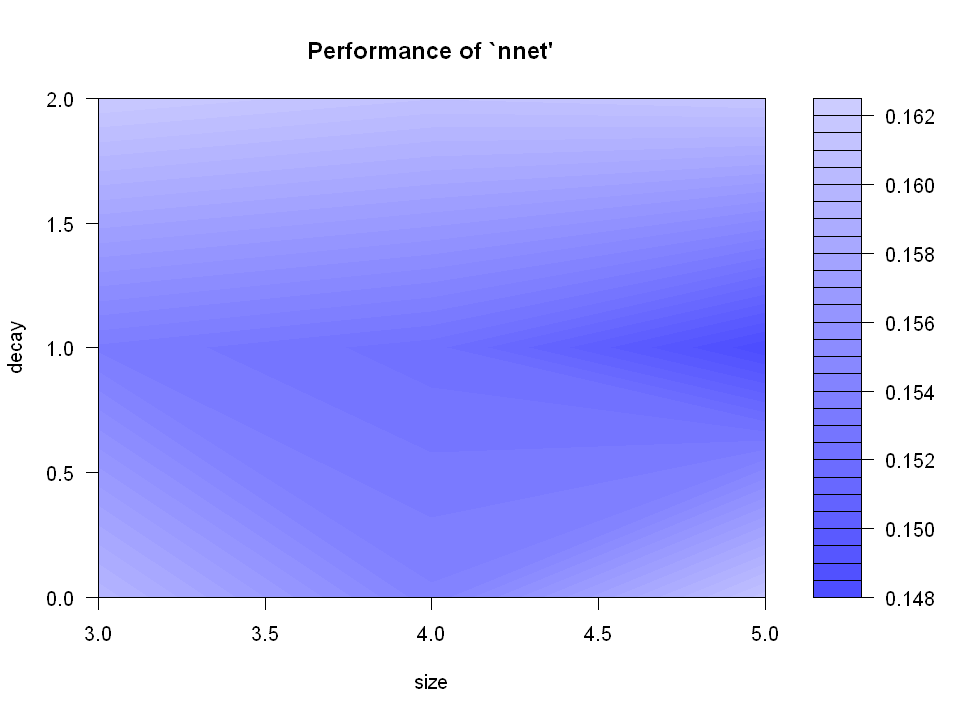

In [87]:
plot(tune.nnet(DepSeuil~.,data=datappq,size=c(3,4,5),decay=c(0,1,2),maxit=200,linout=FALSE))

In [88]:
nnet.dis=nnet(DepSeuil~.,data=datappq,size=5,decay=1) 

# weights:  71
initial  value 437.195171 
iter  10 value 368.357650
iter  20 value 358.699452
iter  30 value 315.775961
iter  40 value 283.932789
iter  50 value 280.955270
iter  60 value 278.829319
iter  70 value 275.083829
iter  80 value 272.802670
iter  90 value 271.225637
iter 100 value 270.914345
final  value 270.914345 
stopped after 100 iterations


### Prévisions de l'échantillon test

Différentes prévisions sont considérées assorties des erreurs estimées sur l'échantillon test. Prévision quantitative de la concentration, prévision de dépassement à partir de la prévision quantitative et directement la prévision de dépassement à partir de l'arbre de décision. 


#### Erreur de régression

In [89]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
pred.nnetq=predict(nnet.dis,newdata=datestq) 
# Erreur quadratique moyenne de prévision
sum((pred.nnetr-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 637.4758

#### Erreur de classification (matrice de confusion)

In [90]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil (régression)
table(pred.nnetr>150,datestr[,"O3obs"]>150)


       
        FALSE TRUE
  FALSE   162   19
  TRUE      4   24

In [91]:

confusionMatrix(as.factor(pred.nnetr>150),as.factor(datestr[,"O3obs"]>150))$table

          Reference
Prediction FALSE TRUE
     FALSE   162   19
     TRUE      4   24

In [92]:
# Même chose pour la discrimination
table(pred.nnetq>0.5,datestq[,"DepSeuil"])


       
        FALSE TRUE
  FALSE   165   32
  TRUE      1   11

#### Courbes ROC

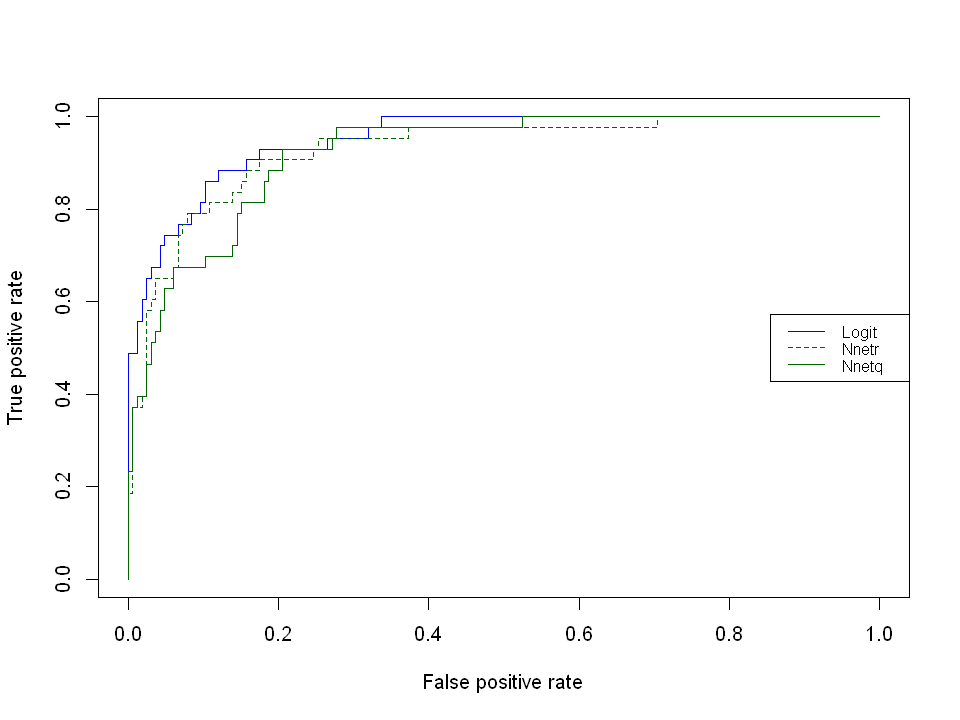

In [93]:
library(ROCR)


roclogit <- predict(log.qm.step1, newdata = datestq, type="response")
predlogit <- prediction(roclogit, datestq[, "DepSeuil"])
perflogit <- performance(predlogit, "tpr", "fpr")


rocnnetr=pred.nnetr/300
prednnetr=prediction(rocnnetr,datestq$DepSeuil)
perfnnetr=performance(prednnetr,"tpr","fpr")

rocnnetq=pred.nnetq
prednnetq=prediction(rocnnetq,datestq$DepSeuil)
perfnnetq=performance(prednnetq,"tpr","fpr")

# tracer les courbes ROC en les superposant pour mieux comparer
plot(perflogit,col="blue")
plot(perfnnetr,col="darkgreen",lty=2,add=TRUE) 
plot(perfnnetq,col="darkgreen",add=TRUE)  
legend("right", legend=c("Logit", "Nnetr", "Nnetq"),
       col=c("blue","darkgreen", "darkgreen"), lty=c(1,2,1), text.font=1,    cex=0.8)


**Question** Une méthode semble-t-elle significativement meilleure?

**Réponse**
la régression (Nnetr) selon la ROC et la matrice de confusion semble légérement plus performante que la descrimination

Certaines méthodes sont sensibles à des effets de variance ou d'unité des variables. Il est préférable d'introduire une normalisation.